## 0. Import stuff

#### Libraries

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
import os
from ena import text_preprocessing as tp, ena_processing as ep, ena_viz as ev
import numpy as np
from nltk.corpus import stopwords
import matplotlib
import matplotlib.pyplot as plt, mpld3
mpld3.enable_notebook()
import matplotlib.pylab as pylab
import pickle
import pandas as pd

#### Paths

In [2]:
root_path = 'C:\Users\CATALINA ESPINOZA\Documents\clusters ciae'
data_path = os.path.join(root_path,'data')
output_path = os.path.join(root_path,'output')
pickle_path = os.path.join(output_path,'pickles')
by_grade_path = os.path.join(output_path,'textos_ulloa_by_curso')
by_grade_and_content = os.path.join(data_path,'textos_ulloa_by_grade_content')
by_content_path = os.path.join(output_path,'textos_ulloa_by_contenido')
all_files_path = os.path.join(data_path,'textos_ulloa')
all_classes = os.path.join(data_path,'clases_ulloa.txt')

## 1. Preprocessing

### Defining preprocessing variables

In [4]:
FILTER_BY_LENGTH = True
MIN_LENGTH = 20 # minutes

COPY_WITH_LOSS = False
LOST_WORDS = 10 # percentage

SPLIT_DOCUMENTS_IN_PERIODS = True
PERIOD_LENGTH = 5 # minutss
OVERLAP_LENGTH = 1 # minutes

USE_DIAGONAL = False

In [5]:
stop_words_spanish = stopwords.words('spanish')

### Get sesions and info related

In [6]:
all_documents_dict = tp.read_documents(all_files_path)

In [7]:
with open(os.path.join(output_path,'pickles','document_length_dict.pickle'),'rb') as f:
    document_length = pickle.load(f)

In [8]:
with open(os.path.join(output_path,'pickles','label_per_audio.pickle'),'rb') as f:
    labels_per_audio = pickle.load(f)

In [9]:
names_docs = all_documents_dict.keys()

In [10]:
labels_english = pd.read_csv(os.path.join(data_path,'labels_english.csv'),sep=';')

In [11]:
labels_english.head()

key_doc                                         label  \
0  1497445733276          12th-A - Condensadores y Magnetismo    
1  1496173972733                  8th-B - energÃ­a elÃ©ctrica    
2  1493128754967                          10th-B - mrua y mrur   
3  1498049709650  12th-A - campo magnÃ©tico y transformadores    
4  1493294143503              9th-B - FenÃ³menos ondulatorios    

                                label_english  
0           12th-A - Capacitors and Magnetism  
1                    8th-B - Electric energy   
2       10th-B - Uniformly accelerated motion  
3  12th-A - Magnetic fields and transformers   
4                      9th-B - Wave phenomena

In [12]:
dict_labels_english = {}
for i,k in enumerate(labels_english.key_doc):
    dict_labels_english[str(k)] = labels_english.label_english.values[i]

### Filter session documents

In [13]:
if FILTER_BY_LENGTH:
    filtered_documents = tp.filter_by_duration(document_length,all_documents_dict,MIN_LENGTH)
else:
    filtered_documents = all_documents_dict

### Split documents

In [14]:
reload(tp)

<module 'ena.text_preprocessing' from 'ena\text_preprocessing.pyc'>

In [15]:
reload(tp)

<module 'ena.text_preprocessing' from 'ena\text_preprocessing.pyc'>

In [16]:
if SPLIT_DOCUMENTS_IN_PERIODS:
    splitted_documents,splitted_labels = tp.split_documents(filtered_documents,labels_per_audio,PERIOD_LENGTH,OVERLAP_LENGTH)
    splitted_by_session,labels_by_session = tp.get_labels_and_splitted_documents_by_session(filtered_documents,dict_labels_english,PERIOD_LENGTH,OVERLAP_LENGTH)
else: 
    splitted_documents = filtered_documents
    splitted_labels = labels_per_audio
    splitted_by_session,labels_by_session = tp.get_labels_and_splitted_documents_by_session(filtered_documents,dict_labels_english,1000000,0)

In [17]:
n_sessions = len(splitted_documents)
print n_sessions

632


### Filter parts of documents

In [18]:
if COPY_WITH_LOSS:
    pass
else:
    pass

### Summary

In [19]:
documents = splitted_documents
labels = splitted_labels

In [20]:
labels_by_session.values()

[{'1493128754967_period_0': 'period_0_10th-B - Uniformly accelerated motion',
  '1493128754967_period_1': 'period_1_10th-B - Uniformly accelerated motion',
  '1493128754967_period_2': 'period_2_10th-B - Uniformly accelerated motion',
  '1493128754967_period_3': 'period_3_10th-B - Uniformly accelerated motion',
  '1493128754967_period_4': 'period_4_10th-B - Uniformly accelerated motion',
  '1493128754967_period_5': 'period_5_10th-B - Uniformly accelerated motion',
  '1493128754967_period_6': 'period_6_10th-B - Uniformly accelerated motion',
  '1493128754967_period_7': 'end_10th-B - Uniformly accelerated motion'},
 {'1497445733276_period_0': 'period_0_12th-A - Capacitors and Magnetism',
  '1497445733276_period_1': 'period_1_12th-A - Capacitors and Magnetism',
  '1497445733276_period_10': 'period_10_12th-A - Capacitors and Magnetism',
  '1497445733276_period_11': 'period_11_12th-A - Capacitors and Magnetism',
  '1497445733276_period_12': 'period_12_12th-A - Capacitors and Magnetism',
  '1

In [21]:
len(documents)

632

## 2. Get topics

In [22]:
with open(os.path.join(pickle_path,'clean_topics_english.pickle'),'rb') as f:
    topic_names = pickle.load(f)
    topic_score = pickle.load(f)
    topic_words = pickle.load(f)

In [23]:
for i in range(len(topic_score)):
    assert len(topic_score[i])==len(topic_words[i])

In [24]:
with open(os.path.join(pickle_path,'topics_heber_sessions.pickle'),'rb') as f:
    dict_words_topics_index = pickle.load(f)
    topic_vectors = pickle.load(f)
    sorted_index = pickle.load(f)

In [25]:
selected_topics = map(lambda x: topic_names[x],sorted_index[-16:]) # top 16 topics
selected_t_words = map(lambda x: topic_words[x],sorted_index[-16:]) # top 16 topics
selected_t_scores = map(lambda x: topic_score[x],sorted_index[-16:]) # top 16 topics
selected_t_scores = map(lambda l: map(lambda x: float(x.replace('.','').replace(',','.')),l),selected_t_scores)

In [26]:
len(sorted_index)

200

In [27]:
# clean_words,clean_scores = clean_selected_words(selected_t_words,selected_t_scores)
# Build a dictionary with the scores per topic per word
topic_score_word_dict = {}
for i in range(len(selected_topics)):
    for s,w in enumerate(selected_t_words[i]):
        score = selected_t_scores[i][s]
        a_vector = np.array([score if i==j else 0 for j in range(len(selected_topics))])
        if w in topic_score_word_dict:
            topic_score_word_dict[w] += a_vector
        else:
            topic_score_word_dict[w] = a_vector

In [28]:
selected_topics

['Kinematics',
 'Observe',
 'Time units',
 'Gas laws',
 'Electric-circuits',
 'Explain',
 'Solar system',
 'Electrostatics',
 'Compute',
 'Excercise',
 'Forms of energy',
 'Numbers',
 'Enquire',
 'Water resources',
 'Order',
 'Dynamics']

In [29]:
for i in zip(selected_topics,selected_t_words):
    print " "
    print i[0]+": "+", ".join(i[1])
    #print i
    print " "
    print "------------------------------------------------------------------------------------ "

 
Kinematics: rapidez, automóvi, velocida, direcció, roce, rueda, tiempo, mismo, puede, recorre, misma, máquinas, hace, depende, mueve, objeto, cae, asientos, pasajero
 
------------------------------------------------------------------------------------ 
 
Observe: ver, ventana, máxima, laborato, sombra, linterna, observar, salió, pastel, mínimos, rea, hilo, eclipse, oah, oaa, apoyo, observan, pequeños, revisar
 
------------------------------------------------------------------------------------ 
 
Time units: horas, hora, media, circular, tiempo, camino, coincide, día, mañana, contando, planilla, decir, tarde, muestra, DIGITide, conectad, duración, comienza, quiere, conecta
 
------------------------------------------------------------------------------------ 
 
Gas laws: presión, gas, atm, gases, temperat, contened, recipien, relación, DIGITtem, boyle, cerrado, comas, experime, presione, lussac, gay, prendas, introduj
 
--------------------------------------------------------------

In [30]:
len(selected_topics)
np.zeros((len(selected_topics),1)).shape

(16L, 1L)

#### Functions

## 3. Get ENA's edges

#### Get co-occurrence matrices per document

In [31]:
co_ocurrence_matrices_all_corpus,labels_corpus = ep.get_co_occurrence_matrices(all_documents_dict,selected_t_words,selected_t_scores,topic_score_word_dict,5)

In [35]:
len(co_ocurrence_matrices_all_corpus)

56

In [33]:
co_ocurrence_matrices,labels_array_matrices = ep.get_co_occurrence_matrices(documents,selected_t_words,selected_t_scores,topic_score_word_dict,5)

In [34]:
len(co_ocurrence_matrices)

632

In [36]:
with open(os.path.join(pickle_path,'co_occurrence_matrices'+str(PERIOD_LENGTH)+'_minutes_'+str(OVERLAP_LENGTH)+'overlap_complete_sample.pickle'),'wb') as f:
    pickle.dump(co_ocurrence_matrices,f)
    pickle.dump(labels_array_matrices,f)
    pickle.dump(co_ocurrence_matrices_all_corpus,f)  
    pickle.dump(labels_corpus,f)

In [32]:
with open(os.path.join(pickle_path,'co_occurrence_matrices'+str(PERIOD_LENGTH)+'_minutes_'+str(OVERLAP_LENGTH)+'overlap_complete_sample.pickle'),'rb') as f:
    co_ocurrence_matrices = pickle.load(f)
    labels_array_matrices = pickle.load(f)
    co_ocurrence_matrices_all_corpus = pickle.load(f)
    labels_corpus = pickle.load(f)

### Get all co occurrences in the corpus

In [37]:
co_occurrence_matrix = ep.get_total_co_occurrence(co_ocurrence_matrices_all_corpus)

### Get super matrices

In [38]:
content_topics = [0,15,3,6,13,10,4,7]
science_skills_topics = [1,12,5,9]
science_tools_topics = [2,8,11,14]
groups_of_topics = [content_topics,science_skills_topics,science_tools_topics]

In [39]:
np.array(selected_topics)[content_topics]

array(['Kinematics', 'Dynamics', 'Gas laws', 'Solar system',
       'Water resources', 'Forms of energy', 'Electric-circuits',
       'Electrostatics'], dtype='|S17')

In [40]:
np.array(selected_topics)[science_skills_topics]

array(['Observe', 'Enquire', 'Explain', 'Excercise'], dtype='|S17')

In [41]:
np.array(selected_topics)[science_tools_topics]

array(['Time units', 'Compute', 'Numbers', 'Order'], dtype='|S17')

In [42]:
super_matrices_corpus = {}
for key in co_ocurrence_matrices_all_corpus.keys():
    super_matrices_corpus[key] = ep.get_aggregated_matrix(co_ocurrence_matrices_all_corpus[key],groups_of_topics)

In [43]:
df = pd.DataFrame(co_ocurrence_matrices_all_corpus.values()[0])
#df.columns = ['content','science skills','math skills']
#df.index = ['content','science skills','math skills']
df

0          1         2         3         4         5          6   \
0   10.056900   6.124497  3.533817  0.592918  0.401430  3.619515   8.235618   
1    6.124497  23.165000  4.128479  2.265694  0.855262  4.637986   9.962119   
2    3.533817   4.128479  8.931000  0.370063  0.207431  1.908018   5.332167   
3    0.592918   2.265694  0.370063  5.164500  0.000000  1.054186   3.334202   
4    0.401430   0.855262  0.207431  0.000000  1.564000  0.262693   0.977259   
5    3.619515   4.637986  1.908018  1.054186  0.262693  9.611500   5.769995   
6    8.235618   9.962119  5.332167  3.334202  0.977259  5.769995  28.845300   
7    2.122534   1.495845  1.391002  0.272355  0.710473  1.026652   2.213549   
8    8.570582   9.292879  3.784948  1.165363  0.874227  6.463625  11.224673   
9    6.774704   8.138630  2.531565  0.570829  0.410845  6.715273   8.281707   
10   7.149728   9.344630  3.630648  2.763326  0.876861  4.625765  16.000095   
11   7.021502   6.167640  5.143754  0.780548  0.295360  4.941881  10.109124   
12   2.996822   5.170943  3.023399  2.639650  0.477373  9.231945   4.330112   
13   1.865441   1.250533  0.327210  0.503402  0.000000  0.857162   4.351131   
14   5.618109   9.541066  2.170110  6.301852  0.066656  6.698917   7.094879   
15   1.672394   1.473236  0.925496  0.362209  0.084954  0.462084   1.876286   

          7          8          9          10         11         12  \
0   2.122534   8.570582   6.774704   7.149728   7.021502   2.996822   
1   1.495845   9.292879   8.138630   9.344630   6.167640   5.170943   
2   1.391002   3.784948   2.531565   3.630648   5.143754   3.023399   
3   0.272355   1.165363   0.570829   2.763326   0.780548   2.639650   
4   0.710473   0.874227   0.410845   0.876861   0.295360   0.477373   
5   1.026652   6.463625   6.715273   4.625765   4.941881   9.231945   
6   2.213549  11.224673   8.281707  16.000095  10.109124   4.330112   
7   3.097000   2.069579   1.581943   2.055693   3.459238   0.814346   
8   2.069579  16.445200  12.054760  10.570279   9.282106   7.366172   
9   1.581943  12.054760  17.618000   7.946945   5.675108   4.476971   
10  2.055693  10.570279   7.946945  14.635200   7.221552   5.098759   
11  3.459238   9.282106   5.675108   7.221552  16.945000   3.110688   
12  0.814346   7.366172   4.476971   5.098759   3.110688  23.253700   
13  0.237899   2.420588   1.825455   3.635223   1.156209   1.033131   
14  1.557579   9.124492   8.078140   7.281042   6.321092   9.704966   
15  1.132729   2.003010   1.386795   1.610255   1.778343   0.765058   

           13         14        15  
0    1.865441   5.618109  1.672394  
1    1.250533   9.541066  1.473236  
2    0.327210   2.170110  0.925496  
3    0.503402   6.301852  0.362209  
4    0.000000   0.066656  0.084954  
5    0.857162   6.698917  0.462084  
6    4.351131   7.094879  1.876286  
7    0.237899   1.557579  1.132729  
8    2.420588   9.124492  2.003010  
9    1.825455   8.078140  1.386795  
10   3.635223   7.281042  1.610255  
11   1.156209   6.321092  1.778343  
12   1.033131   9.704966  0.765058  
13  15.196000   8.116338  0.191519  
14   8.116338  54.019500  1.515236  
15   0.191519   1.515236  2.408000

In [44]:
super_vectors_corpus = {}
for key in super_matrices_corpus.keys():
    super_vectors_corpus[key] = np.array([super_matrices_corpus[key][0,1],super_matrices_corpus[key][0,2],super_matrices_corpus[key][1,2]])

In [70]:
plotly.tools.set_credentials_file(username='ceinaipil', api_key='VuZw9IO8oY2oOZVjR9UO')

In [68]:
import plotly
plotly.tools.set_credentials_file(username='catta.ugs', api_key='BGbZD5URMqON8tOnEmcK')
import plotly.plotly as py
import plotly.graph_objs as go

In [48]:
x_3d = []
y_3d = []
z_3d = []
las_labels = []
dict_by_level = {}
for key in  super_vectors_corpus.keys():
    l = labels_per_audio[key]
    a_level = str(l.split('th')[0])
    x_3d.append(super_vectors_corpus[key][0])
    y_3d.append(super_vectors_corpus[key][1])
    z_3d.append(super_vectors_corpus[key][2]) 
    las_labels.append(l)
    if not a_level in dict_by_level:
        dict_by_level[a_level] = {}
        dict_by_level[a_level]['label'] = []
        dict_by_level[a_level]['x'] = []
        dict_by_level[a_level]['y'] = []
        dict_by_level[a_level]['z'] = []
        dict_by_level[a_level]['color'] = []
    dict_by_level[a_level]['label'].append(l)
    dict_by_level[a_level]['x'].append(super_vectors_corpus[key][0])
    dict_by_level[a_level]['y'].append(super_vectors_corpus[key][1])
    dict_by_level[a_level]['z'].append(super_vectors_corpus[key][2])
    dict_by_level[a_level]['color'].append(colors_level[a_level])        


In [49]:
levels = []
colors_level = {'12':'#DD2C00','11':'#FFD600','10':'#00C853','9':'#0091EA','8':'#6200EA','7':'#455A64'}
c_levels = []
for l in las_labels:
    a_level = l.split('th')[0]
    levels.append(a_level)
    c_levels.append(colors_level[str(a_level)])

In [50]:
x_3d = []
y_3d = []
z_3d = []
las_labels = []
dict_by_level = {}
for key in  super_vectors_corpus.keys():
    l = dict_labels_english[key]
    a_level = str(l.split('th')[0])
    x_3d.append(super_vectors_corpus[key][0])
    y_3d.append(super_vectors_corpus[key][1])
    z_3d.append(super_vectors_corpus[key][2]) 
    las_labels.append(l)
    if not a_level in dict_by_level:
        dict_by_level[a_level] = {}
        dict_by_level[a_level]['label'] = []
        dict_by_level[a_level]['x'] = []
        dict_by_level[a_level]['y'] = []
        dict_by_level[a_level]['z'] = []
        dict_by_level[a_level]['color'] = []
    dict_by_level[a_level]['label'].append(l)
    dict_by_level[a_level]['x'].append(round(super_vectors_corpus[key][0],2))
    dict_by_level[a_level]['y'].append(round(super_vectors_corpus[key][1],2))
    dict_by_level[a_level]['z'].append(round(super_vectors_corpus[key][2],2))
    dict_by_level[a_level]['color'].append(colors_level[a_level])        

In [311]:
data = []
for i in range(6):
    a_trace = go.Scatter3d(
    x = dict_by_level[str(i+7)]['x'],
    y = dict_by_level[str(i+7)]['y'],
    z = dict_by_level[str(i+7)]['z'],
    text = dict_by_level[str(i+7)]['label'],
    name = str(i+7)+'th grade',
    mode='markers',
    marker=dict(
        size=12,
        color= dict_by_level[str(i+7)]['color'],                # set color to an array/list of desired values
        opacity=0.8
        )
    )
    data.append(a_trace)
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        xaxis = dict(title = "Content - Science Skills",backgroundcolor="#f5f5e9",
                        gridcolor="#8a8a78",showbackground=True),
        yaxis = dict(title = "Content - Math Skills",backgroundcolor="#ededd8",
                        gridcolor="#8a8a78",showbackground=True),
        zaxis = dict(title = "Science Skills - Math Skills",backgroundcolor="rgb(230, 230,200)",
                        gridcolor="#8a8a78",showbackground=True)
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')


### Normalized by number of stanzas

In [51]:
n_stanzas_by_doc = {}
for key in  super_vectors_corpus.keys():
    nlines = len(all_documents_dict[key].splitlines())
    n_stanzas_by_doc[key] = nlines-(5-1)

In [52]:
labels_per_audio_spanish = {}
for k,v in labels_per_audio.items():
    new_v = v.split('-')
    labels_per_audio_spanish[k] = new_vv +'-'+new_v[1]+'-'+new_v[2]

NameError: name 'new_vv' is not defined

In [315]:
x_3d = []
y_3d = []
z_3d = []
las_labels = []
dict_by_level = {}
for key in  super_vectors_corpus.keys():
    l = labels_per_audio[key]
    l2 = dict_labels_english[str(key)]
    a_level = str(l.split('th')[0])
    x_3d.append(12*super_vectors_corpus[key][0]/n_stanzas_by_doc[key])
    y_3d.append(12*super_vectors_corpus[key][1]/n_stanzas_by_doc[key])
    z_3d.append(12*super_vectors_corpus[key][2]/n_stanzas_by_doc[key]) 
    las_labels.append(l)
    if not a_level in dict_by_level:
        dict_by_level[a_level] = {}
        dict_by_level[a_level]['label'] = []
        dict_by_level[a_level]['x'] = []
        dict_by_level[a_level]['y'] = []
        dict_by_level[a_level]['z'] = []
        dict_by_level[a_level]['color'] = []
    dict_by_level[a_level]['label'].append(l2)
    dict_by_level[a_level]['x'].append(12*round(super_vectors_corpus[key][0]/n_stanzas_by_doc[key],2))
    dict_by_level[a_level]['y'].append(12*round(super_vectors_corpus[key][1]/n_stanzas_by_doc[key],2))
    dict_by_level[a_level]['z'].append(12*round(super_vectors_corpus[key][2]/n_stanzas_by_doc[key],2))
    dict_by_level[a_level]['color'].append(colors_level[a_level])        

In [316]:
import plotly
#plotly.tools.set_credentials_file(username='ceinaipil', api_key='VuZw9IO8oY2oOZVjR9UO')
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x=x_3d,
    y=y_3d,
    z=z_3d,
    text = las_labels,
    mode='markers',
    marker=dict(
        size=12,
        color=c_levels,                # set color to an array/list of desired values
        opacity=0.8
    )
)
data = []
for i in range(6):
    a_trace = go.Scatter3d(
    x = dict_by_level[str(i+7)]['x'],
    y = dict_by_level[str(i+7)]['y'],
    z = dict_by_level[str(i+7)]['z'],
    text = dict_by_level[str(i+7)]['label'],
    name = str(i+7)+'th grade',
    mode='markers',
    marker=dict(
        size=12,
        color= dict_by_level[str(i+7)]['color'],                # set color to an array/list of desired values
        opacity=0.8
        )
    )
    data.append(a_trace)
trace_dummy = go.Scatter3d(
                x= [0],
                y=[0],
                z = [0],
                line = dict(color = axes_colors[0]),
                opacity = 0.0,
                showlegend=False)
data.append(trace_dummy)
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        xaxis = dict(title = "Content - Science Skills",backgroundcolor="#f5f5e9",
                        gridcolor="#8a8a78",showbackground=True),
        yaxis = dict(title = "Content - Math Skills",backgroundcolor="#ededd8",
                        gridcolor="#8a8a78",showbackground=True),
        zaxis = dict(title = "Science Skills - Math Skills",backgroundcolor="rgb(230, 230,200)",
                        gridcolor="#8a8a78",showbackground=True)
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')


<br>
<br><br>
<br>
<br>
<br>

## Get co-occurrence trajectory

In [395]:
reload(ep)

<module 'ena.ena_processing' from 'ena\ena_processing.py'>

In [53]:
super_matrices = {}
for key in co_ocurrence_matrices.keys():
    super_matrices[key] = ep.get_aggregated_matrix(co_ocurrence_matrices[key],groups_of_topics)

In [54]:
super_vectors = {}
for key in super_matrices.keys():
    super_vectors[key] = np.array([round(super_matrices[key][0,1],2),round(super_matrices[key][0,2],2),round(super_matrices[key][1,2],2)])

In [55]:
a_vector = super_vectors.values()[0]
axes_text = ["Physics with Science skills","Physics with Math skills","Science skills with Math skills"]
axes_colors = ['#2fd32f','#D32F2F','#2f2fd3']

axes_text = ['Contenido con '+'<br>'+'habilidades cientificas','Contenido con '+'<br>'+'habilidades matematicas','Habilidades matematicas con '+'<br>'+'habilidades cientificas']
axes_text = ['Contenido con habilidades cientificas','Contenido con habilidades matematicas','Habilidades matematicas con habilidades cientificas']
axes_text = ['Content - Science Skills','Content - Math Skills','Science skills - Math skills']
axes_colors = ['#2fd32f','#D32F2F','#2f2fd3']


In [56]:
doc = labels_by_session.keys()[0]
dict_labels_english[doc]

'10th-B - Uniformly accelerated motion'

In [57]:
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 8)

Populating the interactive namespace from numpy and matplotlib


C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy



In [328]:
doc = labels_by_session.keys()[0]
x_3d = []
y_3d = []
z_3d = []
las_labels = []
for i in range(len(labels_by_session[doc].keys())):
    # construir label_i
    label_i = doc+'_period_'+str(i)
    #value_i = labels_array_matrices.index(label_i)
    a_label = labels[label_i]
    x_3d.append(round(super_vectors[label_i][0]/56,2)*12)
    y_3d.append(round(super_vectors[label_i][1]/56,2)*12)
    z_3d.append(round(super_vectors[label_i][2]/56,2)*12)
    le_str = axes_text[0]+': '+str(round(super_vectors[label_i][0]/56,2)*12)+'<br>'+\
    axes_text[1]+': '+str(round(super_vectors[label_i][1]/56,2)*12)+'<br>'+\
    axes_text[2]+': '+str((round(super_vectors[label_i][2]/56,2)*12))+'<br>'+labels_by_session[doc][label_i]
    las_labels.append(le_str)

trace1 = go.Scatter3d(
    x=x_3d,
    y=y_3d,
    z=z_3d,
    line=dict(
        #color='#D32F2F',
        width=2.8
    ),
    text = las_labels,
    hoverinfo = 'text',
    marker=dict(
        color=range(len(labels_by_session[doc].keys())),   
        colorscale='RdBu',# set color to an array/list of desired values
        opacity=0
    )
)
#title="Trajectory "+ str(dict_labels_english[doc]),
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        xaxis = dict(title = "Content - Science Skills",backgroundcolor="#f5f5e9",
                        gridcolor="#8a8a78",showbackground=True),
        yaxis = dict(title = "Content - Math Skills",backgroundcolor="#ededd8",
                        gridcolor="#8a8a78",showbackground=True),
        zaxis = dict(title = "Science Skills - Math Skills",backgroundcolor="rgb(230, 230,200)",
                        gridcolor="#8a8a78",showbackground=True)
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale-'+str(doc))

In [329]:
doc = labels_by_session.keys()[1]
x_3d = []
y_3d = []
z_3d = []
las_labels = []
for i in range(len(labels_by_session[doc].keys())):
    # construir label_i
    label_i = doc+'_period_'+str(i)
    #value_i = labels_array_matrices.index(label_i)
    a_label = labels[label_i]
    x_3d.append(round(super_vectors[label_i][0]/56,2)*12)
    y_3d.append(round(super_vectors[label_i][1]/56,2)*12)
    z_3d.append(round(super_vectors[label_i][2]/56,2)*12)
    le_str = axes_text[0]+': '+str(round(super_vectors[label_i][0]/56,2)*12)+'<br>'+\
    axes_text[1]+': '+str(round(super_vectors[label_i][1]/56,2)*12)+'<br>'+\
    axes_text[2]+': '+str((round(super_vectors[label_i][2]/56,2)*12))+'<br>'+labels_by_session[doc][label_i]
    las_labels.append(le_str)

trace1 = go.Scatter3d(
    x=x_3d,
    y=y_3d,
    z=z_3d,
    line=dict(
        #color='#D32F2F',
        width=2.8
    ),
    text = las_labels,
    hoverinfo = 'text',
    marker=dict(
        color=range(len(labels_by_session[doc].keys())),   
        colorscale='RdBu',# set color to an array/list of desired values
        opacity=0
    )
)
#title="Trajectory "+ str(dict_labels_english[doc]),
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        xaxis = dict(title = "Content - Science Skills",backgroundcolor="#f5f5e9",
                        gridcolor="#8a8a78",showbackground=True),
        yaxis = dict(title = "Content - Math Skills",backgroundcolor="#ededd8",
                        gridcolor="#8a8a78",showbackground=True),
        zaxis = dict(title = "Science Skills - Math Skills",backgroundcolor="rgb(230, 230,200)",
                        gridcolor="#8a8a78",showbackground=True)
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale-'+str(doc))

<br>
<br>
<br>
<br>

In [49]:
doc = labels_by_session.keys()[1]
dict_labels_english[doc]

'12th-A - Capacitors and Magnetism'

In [50]:
doc = labels_by_session.keys()[2]
x_3d = []
y_3d = []
z_3d = []
las_labels = []
for i in range(len(labels_by_session[doc].keys())):
    # construir label_i
    label_i = doc+'_period_'+str(i)
    #value_i = labels_array_matrices.index(label_i)
    a_label = labels[label_i]
    x_3d.append(round(super_vectors[label_i][0]/56,2)*12)
    y_3d.append(round(super_vectors[label_i][1]/56,2)*12)
    z_3d.append(round(super_vectors[label_i][2]/56,2)*12)
    le_str = axes_text[0]+': '+str(round(super_vectors[label_i][0]/56,2)*12)+'<br>'+\
    axes_text[1]+': '+str(round(super_vectors[label_i][1]/56,2)*12)+'<br>'+\
    axes_text[2]+': '+str((round(super_vectors[label_i][2]/56,2)*12))+'<br>'+labels_by_session[doc][label_i]
    las_labels.append(le_str)

trace1 = go.Scatter3d(
    x=x_3d,
    y=y_3d,
    z=z_3d,
    line=dict(
        #color='#D32F2F',
        width=2.8
    ),
    text = las_labels,
    hoverinfo = 'text',
    marker=dict(
        color=range(len(labels_by_session[doc].keys())),   
        colorscale='RdBu',# set color to an array/list of desired values
        opacity=0
    )
)
#title="Trajectory "+ str(dict_labels_english[doc]),
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        xaxis = dict(title = "Content - Science Skills",backgroundcolor="#f5f5e9",
                        gridcolor="#8a8a78",showbackground=True),
        yaxis = dict(title = "Content - Math Skills",backgroundcolor="#ededd8",
                        gridcolor="#8a8a78",showbackground=True),
        zaxis = dict(title = "Science Skills - Math Skills",backgroundcolor="rgb(230, 230,200)",
                        gridcolor="#8a8a78",showbackground=True)
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale-'+str(doc))

NameError: name 'go' is not defined

In [334]:
doc = labels_by_session.keys()[2]
dict_labels_english[doc]

'10th-A - Torsion and levers'

In [142]:
labels.values()

[u'period_16_7th-B - Presi\xf3n ',
 u'period_17_7th-B - Presi\xf3n ',
 u'period_14_7th-B - Presi\xf3n ',
 u'period_15_7th-B - Presi\xf3n ',
 u'period_12_7th-B - Presi\xf3n ',
 u'end_12th-B - Aplicaciones Campo El\xe9ctrico',
 u'period_10_7th-B - Presi\xf3n ',
 u'period_11_7th-B - Presi\xf3n ',
 u'period_31_7th-B - Presi\xf3n ',
 u'period_18_7th-B - Presi\xf3n ',
 u'period_19_7th-B - Presi\xf3n ',
 u'period_28_8th-B - Voltaje',
 u'end_8th-B - Voltaje',
 u'period_22_8th-B - Voltaje',
 u'period_23_8th-B - Voltaje',
 u'period_20_8th-B - Voltaje',
 u'period_21_8th-B - Voltaje',
 u'period_26_8th-B - Voltaje',
 u'period_27_8th-B - Voltaje',
 u'period_24_8th-B - Voltaje',
 u'period_25_8th-B - Voltaje',
 u'period_32_7th-B - Presi\xf3n ',
 u'period_8_12th-B - Fuerza Electrost\xe1tica ',
 u'period_9_12th-B - Fuerza Electrost\xe1tica ',
 u'period_2_12th-B - Fuerza Electrost\xe1tica ',
 u'period_3_12th-B - Fuerza Electrost\xe1tica ',
 u'period_0_12th-B - Fuerza Electrost\xe1tica ',
 u'period_1_12th

In [331]:
doc = labels_by_session.keys()[3]
x_3d = []
y_3d = []
z_3d = []
las_labels = []
for i in range(len(labels_by_session[doc].keys())):
    # construir label_i
    label_i = doc+'_period_'+str(i)
    #value_i = labels_array_matrices.index(label_i)
    a_label = labels[label_i]
    x_3d.append(round(super_vectors[label_i][0]/56,2)*12)
    y_3d.append(round(super_vectors[label_i][1]/56,2)*12)
    z_3d.append(round(super_vectors[label_i][2]/56,2)*12)
    le_str = axes_text[0]+': '+str(round(super_vectors[label_i][0]/56,2)*12)+'<br>'+\
    axes_text[1]+': '+str(round(super_vectors[label_i][1]/56,2)*12)+'<br>'+\
    axes_text[2]+': '+str((round(super_vectors[label_i][2]/56,2)*12))+'<br>'+labels_by_session[doc][label_i]
    las_labels.append(le_str)

trace1 = go.Scatter3d(
    x=x_3d,
    y=y_3d,
    z=z_3d,
    line=dict(
        #color='#D32F2F',
        width=2.8
    ),
    text = las_labels,
    hoverinfo = 'text',
    marker=dict(
        color=range(len(labels_by_session[doc].keys())),   
        colorscale='RdBu',# set color to an array/list of desired values
        opacity=0
    )
)
#title="Trajectory "+ str(dict_labels_english[doc]),
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        xaxis = dict(title = "Content - Science Skills",backgroundcolor="#f5f5e9",
                        gridcolor="#8a8a78",showbackground=True),
        yaxis = dict(title = "Content - Math Skills",backgroundcolor="#ededd8",
                        gridcolor="#8a8a78",showbackground=True),
        zaxis = dict(title = "Science Skills - Math Skills",backgroundcolor="rgb(230, 230,200)",
                        gridcolor="#8a8a78",showbackground=True)
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale-'+str(doc))

In [337]:
for doc in labels_by_session.keys():
    if doc =='1496173972733' or doc == labels_by_session.keys()[2] or doc == labels_by_session.keys()[1] or doc == labels_by_session.keys()[0]:
        continue
    x_3d = []
    y_3d = []
    z_3d = []
    las_labels = []
    for i in range(len(labels_by_session[doc].keys())):
        # construir label_i
        label_i = doc+'_period_'+str(i)
        #value_i = labels_array_matrices.index(label_i)
        a_label = labels[label_i]
        x_3d.append(round(super_vectors[label_i][0]/56,2)*12)
        y_3d.append(round(super_vectors[label_i][1]/56,2)*12)
        z_3d.append(round(super_vectors[label_i][2]/56,2)*12)
        le_str = axes_text[0]+': '+str(round(super_vectors[label_i][0]/56,2)*12)+'<br>'+\
        axes_text[1]+': '+str(round(super_vectors[label_i][1]/56,2)*12)+'<br>'+\
        axes_text[2]+': '+str((round(super_vectors[label_i][2]/56,2)*12))+'<br>'+labels_by_session[doc][label_i]
        las_labels.append(le_str)

    trace1 = go.Scatter3d(
        x=x_3d,
        y=y_3d,
        z=z_3d,
        line=dict(
            #color='#D32F2F',
            width=2.8
        ),
        text = las_labels,
        hoverinfo = 'text',
        marker=dict(
            color=range(len(labels_by_session[doc].keys())),   
            colorscale='RdBu',# set color to an array/list of desired values
            opacity=0
        )
    )
    #title="Trajectory "+ str(dict_labels_english[doc]),
    data = [trace1]
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        ),
        scene = dict(
            xaxis = dict(title = "Content - Science Skills",backgroundcolor="#f5f5e9",
                            gridcolor="#8a8a78",showbackground=True),
            yaxis = dict(title = "Content - Math Skills",backgroundcolor="#ededd8",
                            gridcolor="#8a8a78",showbackground=True),
            zaxis = dict(title = "Science Skills - Math Skills",backgroundcolor="rgb(230, 230,200)",
                            gridcolor="#8a8a78",showbackground=True)
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='3d-scatter-colorscale-'+str(doc))


PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [336]:
doc = labels_by_session.keys()[3]
dict_labels_english[doc]
doc

'1496173972733'

In [341]:
for doc in labels_by_session.keys():
    print doc+ " "+dict_labels_english[doc]

1493128754967 10th-B - Uniformly accelerated motion
1497445733276 12th-A - Capacitors and Magnetism
1497375275374 10th-A - Torsion and levers
1496173972733 8th-B - Electric energy 
1498049709650 12th-A - Magnetic fields and transformers 
1493294143503 9th-B - Wave phenomena
1498071546419 7th-A - Geographical factors
1492699582441 12th-A - Light (Psu)
1496757212783 9th-A - Light phenomena
1493224464511 12th-B - Electrodynamics
1496152377843 9th-A - Light
1499344297896 9th-B - Optics
1493742945363 10th-A - Applications uniformly accelerated motion
1497531745155 9th-B - Light phenomena
1497380434533 7th-B - Weather factors
1497466959651 7th-A - Weather factors
1496252136109 12th-B - Electrostatic force
1497288168474 11th-A - Pascal's principle
1493051693677 11th-A - Torsion
1497297308108 8th-A - Electric power and energy
1492455191238 8th-A - Circuits 
1497360047056 9th-A - Light interference
1493208800123 12th-A - Electrodynamics 
1496841006880 12th-A - Electric field and force
149736643

### Plot ONE three lines chart

In [60]:
#normalize by number of stanzas
def n_s(value):
    return round(value/56,2)*12

In [61]:
doc = labels_by_session.keys()[0]

In [357]:
doc = labels_by_session.keys()[0]
x_3d = []
y_3d = []
z_3d = []
las_labels = []
for i in range(len(labels_by_session[doc].keys())):
    # construir label_i
    label_i = doc+'_period_'+str(i)
    #value_i = labels_array_matrices.index(label_i)
    a_label = labels[label_i]
    x_3d.append(n_s(super_vectors[label_i][0]))
    y_3d.append(n_s(super_vectors[label_i][1]))
    z_3d.append(n_s(super_vectors[label_i][2])) 
    las_labels.append(labels_by_session[doc][label_i])

rangel = range(len(x_3d))
trace_high = go.Scatter(
    x= rangel,
    y=x_3d,
    name = axes_text[0],
    line = dict(color = axes_colors[0]),
    opacity = 0.8)

trace_low = go.Scatter(
    x= rangel,
    y=y_3d,
    name = axes_text[1],
    line = dict(color = axes_colors[1]),
    opacity = 0.8)

trace_medium = go.Scatter(
    x= rangel,
    y=z_3d,
    name = axes_text[2],
    line = dict(color = axes_colors[2]),
    opacity = 0.8)

data = [trace_high,trace_medium,trace_low]

layout = dict(
    title="Time Series "+ dict_labels_english[doc],
    legend = dict(traceorder='normal')
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Time Series "+ dict_labels_english[doc])

In [181]:
len(labels_by_session.values()[0])

29

In [188]:
document_length.values()[3]

30.07

In [198]:
len(filtered_documents['1496173972733'].splitlines())

361

In [213]:
len(labels_by_session['1496173972733'])

27

In [210]:
(361-60)/12

25

In [212]:
reload(tp)

<module 'ena.text_preprocessing' from 'ena\text_preprocessing.py'>

## Plot several three line charts

In [358]:
len(labels_per_audio)

60

In [359]:
len(filtered_documents.keys())

54

In [62]:
#labels_by_session.keys()[3]
labels_per_audio.values()
#for doc in labels_by_session.keys()[1:3]:
#labels_by_session.keys()
levels = [[] for i in range(6)]
for k,v in labels_per_audio.items():
    for i in range(6):
        if k in filtered_documents.keys():
            if v.startswith(str(7+i)):
                levels[i].append(k)
        levels[i] = list(sort(levels[i]))

In [63]:
levels[0]

[u'1493143252906',
 u'1493229522466',
 u'1496256935677',
 u'1496862159802',
 u'1497380434533',
 u'1497466959651',
 u'1497985258834',
 u'1498071546419']

In [165]:
len(levels)

6

In [64]:
sum([len(a) for a in levels])

54

### Primerios 18

In [78]:
from plotly import tools
les_titles = []
counter_1 = 1
counter_2 = 0
for i,a_level in enumerate(levels):
    for j,session in enumerate(a_level):
        if counter_1<10:
            doc = a_level[j]
            les_titles.append(dict_labels_english[doc])
        counter_2 = (counter_2 + 1)%2
        if counter_2 == 0:
            counter_1 += 1

fig = tools.make_subplots(rows=9, cols=2, shared_xaxes=True,subplot_titles=les_titles)
#fig = tools.make_subplots(rows=9, cols=2,subplot_titles=les_titles)

counter_1 = 1
counter_2 = 0
for i,a_level in enumerate(levels):
    for j,session in enumerate(a_level):
        if counter_1<10:
            doc = a_level[j]
            x_3d = []
            y_3d = []
            z_3d = []
            las_labels = []
            for i in range(len(labels_by_session[doc].keys())):
                # construir label_i
                label_i = doc+'_period_'+str(i)
                #value_i = labels_array_matrices.index(label_i)
                a_label = labels[label_i]
                x_3d.append(n_s(super_vectors[label_i][0]))
                y_3d.append(n_s(super_vectors[label_i][1]))
                z_3d.append(n_s(super_vectors[label_i][2]) )
                las_labels.append(labels_by_session[doc][label_i])
            if counter_1 == 1 and counter_2 == 0:
                sl = True
            else:
                sl = False
            rangel = range(len(x_3d))
            trace_high = go.Scatter(
                x= rangel,
                y=x_3d,
                name = axes_text[0],
                line = dict(color = axes_colors[0]),
                opacity = 0.8,
                showlegend=sl)
            
            trace_dummy = go.Scatter(
                x= [rangel[0],20],
                y=[0,10],
                line = dict(color = axes_colors[0]),
                opacity = 0.0,
                showlegend=False)

            trace_low = go.Scatter(
                x= rangel,
                y=y_3d,
                name = axes_text[1],
                line = dict(color = axes_colors[1]),
                opacity = 0.8,
                showlegend=sl)

            trace_medium = go.Scatter(
                x= rangel,
                y=z_3d,
                name = axes_text[2],
                line = dict(color = axes_colors[2]),
                opacity = 0.8,
                showlegend=sl)

            data = [trace_high,trace_medium,trace_low]

            fig.append_trace(trace_high, counter_1, counter_2+1)
            fig.append_trace(trace_low, counter_1, counter_2+1)
            fig.append_trace(trace_medium, counter_1, counter_2+1)
            fig.append_trace(trace_dummy, counter_1, counter_2+1)

        counter_2 = (counter_2 + 1)%2
        if counter_2 == 0:
            counter_1 += 1
#fig['layout'].update(height=600, width=600, title='Multiple Subplots' +
#                                                  ' with Titles')
fig['layout'].update(height=1200, width=1200,font=dict(family='Courier New, monospace', size=8),
    legend=dict(
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=15,
            color='#212121'
        ),
        bgcolor='#FAFAFA',
        bordercolor='#FFFFFF',
        borderwidth=2
    ))
py.iplot(fig, filename=str('make-subplots-multiple-with-titles1'+'_'+str(OVERLAP_LENGTH)+'m'))

This is the format of your plot grid:
[ (1,1) x1,y1 ]   [ (1,2) x2,y2 ] 
[ (2,1) x1,y3 ]   [ (2,2) x2,y4 ] 
[ (3,1) x1,y5 ]   [ (3,2) x2,y6 ] 
[ (4,1) x1,y7 ]   [ (4,2) x2,y8 ] 
[ (5,1) x1,y9 ]   [ (5,2) x2,y10 ]
[ (6,1) x1,y11 ]  [ (6,2) x2,y12 ]
[ (7,1) x1,y13 ]  [ (7,2) x2,y14 ]
[ (8,1) x1,y15 ]  [ (8,2) x2,y16 ]
[ (9,1) x1,y17 ]  [ (9,2) x2,y18 ]



### Segundos 18

In [168]:
counter_1 = 10

In [77]:
from plotly import tools
les_titles = []
counter_1 = 1
counter_2 = 0
for i,a_level in enumerate(levels):
    for j,session in enumerate(a_level):
        if counter_1>=10 and counter_1<19:
            doc = a_level[j]
            les_titles.append(dict_labels_english[str(doc)])
        counter_2 = (counter_2 + 1)%2
        if counter_2 == 0:
            counter_1 += 1

fig = tools.make_subplots(rows=9, cols=2, shared_xaxes=True,subplot_titles=les_titles)
#fig = tools.make_subplots(rows=9, cols=2,subplot_titles=les_titles)

counter_1 = 1
counter_2 = 0
for i,a_level in enumerate(levels):
    for j,session in enumerate(a_level):
        if counter_1>=10 and counter_1<19:
            doc = a_level[j]
            x_3d = []
            y_3d = []
            z_3d = []
            las_labels = []
            for i in range(len(labels_by_session[doc].keys())):
                # construir label_i
                label_i = doc+'_period_'+str(i)
                #value_i = labels_array_matrices.index(label_i)
                a_label = labels[label_i]
                x_3d.append(n_s(super_vectors[label_i][0]))
                y_3d.append(n_s(super_vectors[label_i][1]))
                z_3d.append(n_s(super_vectors[label_i][2])) 
                las_labels.append(labels_by_session[doc][label_i])
            if counter_1 == 10 and counter_2 == 0:
                sl = True
            else:
                sl = False
            rangel = range(len(x_3d))
            trace_high = go.Scatter(
                x= rangel,
                y=x_3d,
                name = axes_text[0],
                line = dict(color = axes_colors[0]),
                opacity = 0.8,
                showlegend=sl)
            
            trace_dummy = go.Scatter(
                x= [rangel[0],20],
                y=[0,10],
                line = dict(color = axes_colors[0]),
                opacity = 0.0,
                showlegend=False)

            trace_low = go.Scatter(
                x= rangel,
                y=y_3d,
                name = axes_text[1],
                line = dict(color = axes_colors[1]),
                opacity = 0.8,
                showlegend=sl)

            trace_medium = go.Scatter(
                x= rangel,
                y=z_3d,
                name = axes_text[2],
                line = dict(color = axes_colors[2]),
                opacity = 0.8,
                showlegend=sl)

            data = [trace_high,trace_medium,trace_low]

            fig.append_trace(trace_high, counter_1-9, counter_2+1)
            fig.append_trace(trace_low, counter_1-9, counter_2+1)
            fig.append_trace(trace_medium, counter_1-9, counter_2+1)
            fig.append_trace(trace_dummy, counter_1-9, counter_2+1)

        counter_2 = (counter_2 + 1)%2
        if counter_2 == 0:
            counter_1 += 1
#fig['layout'].update(height=600, width=600, title='Multiple Subplots' +
#                                                  ' with Titles')
fig['layout'].update(height=1200, width=1200,font=dict(family='Courier New, monospace', size=8),
    legend=dict(
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=15,
            color='#212121'
        ),
        bgcolor='#FAFAFA',
        bordercolor='#FFFFFF',
        borderwidth=2
    ))
py.iplot(fig, filename=str('make-subplots-multiple-with-titles2'+'_'+str(OVERLAP_LENGTH)+'m'))

This is the format of your plot grid:
[ (1,1) x1,y1 ]   [ (1,2) x2,y2 ] 
[ (2,1) x1,y3 ]   [ (2,2) x2,y4 ] 
[ (3,1) x1,y5 ]   [ (3,2) x2,y6 ] 
[ (4,1) x1,y7 ]   [ (4,2) x2,y8 ] 
[ (5,1) x1,y9 ]   [ (5,2) x2,y10 ]
[ (6,1) x1,y11 ]  [ (6,2) x2,y12 ]
[ (7,1) x1,y13 ]  [ (7,2) x2,y14 ]
[ (8,1) x1,y15 ]  [ (8,2) x2,y16 ]
[ (9,1) x1,y17 ]  [ (9,2) x2,y18 ]



In [452]:
from plotly import tools
les_titles = []
counter = 0
for i,a_level in enumerate(levels):
    for j,session in enumerate(a_level):
        doc = a_level[j]
        print labels_per_audio[doc] + ' ' + str(doc) + ' '+ str(counter)
        counter += 1

7th-A - Factores Geográficos  1498071546419 0
7th-B - Factores del Clima  1497380434533 1
7th-B - Factores Geográficos 1497985258834 2
7th-A - Elementos del clima  1496862159802 3
7th-A - el clima  1496256935677 4
7th-A - Factores del Clima  1497466959651 5
7th-A - Presión  1493229522466 6
7th-B - Presión  1493143252906 7
8th-B - energía eléctrica  1496173972733 8
8th-A - circuitos  1492455191238 9
8th-B - centrales eléctricas  1496778845217 10
8th-A - Potencia y energía eléctrica  1497297308108 11
8th-A - ley de ohm  1493060220051 12
8th-B - Voltaje 1493146503303 13
8th-A - energía eléctrica  1496087655106 14
8th-B - potencia y energía eléctrica  1497383504424 15
9th-B - Fenómenos ondulatorios  1493294143503 16
9th-A - Fenómenos de la Luz 1496757212783 17
9th-B - Óptica de la luz  1499344297896 18
9th-A - Luz 1496152377843 19
9th-A - Interferencia de la luz  1497360047056 20
9th-B - Sonido 1492690427598 21
9th-B - Fenómenos de la Luz  1496927347422 22
9th-A - fenómenos del sonido  149

In [172]:
labels_english.keys()

Index([u'key_doc', u'label', u'label_english'], dtype='object')

### Terceros 18

In [76]:
from plotly import tools
les_titles = []
counter_1 = 1
counter_2 = 0
for i,a_level in enumerate(levels):
    for j,session in enumerate(a_level):
        if counter_1>=19 and counter_1<28:
            doc = a_level[j]
            les_titles.append(dict_labels_english[doc])
        counter_2 = (counter_2 + 1)%2
        if counter_2 == 0:
            counter_1 += 1

fig = tools.make_subplots(rows=9, cols=2, shared_xaxes=True,subplot_titles=les_titles)
#fig = tools.make_subplots(rows=9, cols=2,subplot_titles=les_titles)

counter_1 = 1
counter_2 = 0
for i,a_level in enumerate(levels):
    for j,session in enumerate(a_level):
        if counter_1>=19 and counter_1<28:
            doc = a_level[j]
            x_3d = []
            y_3d = []
            z_3d = []
            las_labels = []
            for i in range(len(labels_by_session[doc].keys())):
                # construir label_i
                label_i = doc+'_period_'+str(i)
                #value_i = labels_array_matrices.index(label_i)
                a_label = labels[label_i]
                x_3d.append(n_s(super_vectors[label_i][0]))
                y_3d.append(n_s(super_vectors[label_i][1]))
                z_3d.append(n_s(super_vectors[label_i][2])) 
                las_labels.append(labels_by_session[doc][label_i])
            if counter_1 == 19 and counter_2 == 0:
                sl = True
            else:
                sl = False
            rangel = range(len(x_3d))
            trace_high = go.Scatter(
                x= rangel,
                y=x_3d,
                name = axes_text[0],
                line = dict(color = axes_colors[0]),
                opacity = 0.8,
                showlegend=sl)
            
            trace_dummy = go.Scatter(
                x= [rangel[0],20],
                y=[0,10],
                line = dict(color = axes_colors[0]),
                opacity = 0.0,
                showlegend=False)

            trace_low = go.Scatter(
                x= rangel,
                y=y_3d,
                name = axes_text[1],
                line = dict(color = axes_colors[1]),
                opacity = 0.8,
                showlegend=sl)

            trace_medium = go.Scatter(
                x= rangel,
                y=z_3d,
                name = axes_text[2],
                line = dict(color = axes_colors[2]),
                opacity = 0.8,
                showlegend=sl)

            data = [trace_high,trace_medium,trace_low]

            fig.append_trace(trace_high, counter_1-18, counter_2+1)
            fig.append_trace(trace_low, counter_1-18, counter_2+1)
            fig.append_trace(trace_medium, counter_1-18, counter_2+1)
            fig.append_trace(trace_dummy, counter_1-18, counter_2+1)

        counter_2 = (counter_2 + 1)%2
        if counter_2 == 0:
            counter_1 += 1
#fig['layout'].update(height=600, width=600, title='Multiple Subplots' +
#                                                  ' with Titles')
fig['layout'].update(height=1200, width=1200,font=dict(family='Courier New, monospace', size=8),
    legend=dict(
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=15,
            color='#212121'
        ),
        bgcolor='#FAFAFA',
        bordercolor='#FFFFFF',
        borderwidth=2
    ))
py.iplot(fig, filename=str('make-subplots-multiple-with-titles3'+'_'+str(OVERLAP_LENGTH)+'m'))

This is the format of your plot grid:
[ (1,1) x1,y1 ]   [ (1,2) x2,y2 ] 
[ (2,1) x1,y3 ]   [ (2,2) x2,y4 ] 
[ (3,1) x1,y5 ]   [ (3,2) x2,y6 ] 
[ (4,1) x1,y7 ]   [ (4,2) x2,y8 ] 
[ (5,1) x1,y9 ]   [ (5,2) x2,y10 ]
[ (6,1) x1,y11 ]  [ (6,2) x2,y12 ]
[ (7,1) x1,y13 ]  [ (7,2) x2,y14 ]
[ (8,1) x1,y15 ]  [ (8,2) x2,y16 ]
[ (9,1) x1,y17 ]  [ (9,2) x2,y18 ]



## Plot heatmap animation

In [555]:
doc

'1493128754967'

In [577]:
les_z_3d = []
for i in range(len(labels_by_session[doc].keys())):
    # construir label_i
    label_i =  doc+'_period_'+str(i)
    les_z_3d.append([super_vectors[label_i][0],super_vectors[label_i][1],super_vectors[label_i][2]]) 

In [564]:

import plotly.plotly as py
from plotly.grid_objs import Grid, Column

import time
import numpy as np


In [565]:
a = [1,2,3]
a.append(4)

In [591]:

#correls=[-0.95, -0.85, -0.75, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.75, 0.85, 0.95]

#m=[0., 0.]
#stdev=[1., 1.]
#V=bivariate_N()
#x, y=pdf_bivariate_N(m, stdev,  V)[:2]
my_columns=[Column([2,2,1,1], 'x'), Column([1,2,2,1], 'y')]
zvmax=[]
for i,z in enumerate(les_z_3d):
    zvmax.append(np.max(z))
    z.append(0)
    my_columns.append(Column(z, 'z{}'.format(i + 1)))
grid = Grid(my_columns)
py.grid_ops.upload(grid, 'norm-bivariate1'+str(time.time()), auto_open=False)

u'https://plot.ly/~ceinaipil/0/'

In [595]:
data=[dict(type='heatmap',
           xsrc=grid.get_column_reference('x'),
           ysrc=grid.get_column_reference('y'), 
           zsrc=grid.get_column_reference('z1'), 
           zmin=0,
           zmax=20,
           colorscale='RdBu', 
           colorbar=dict(thickness=20, ticklen=4))]

title='Variacion de la co-ocurrencia de super topicos '+'<br>'+'durante la sesion '+ labels_per_audio[doc]

layout = dict(title=title,
              autosize=False,
              height=600,
              width=600,
              hovermode='closest',
              showlegend=False,
              updatemenus=[dict(type='buttons', showactive=False,
                                y=1, x=-0.05, xanchor='right',
                                yanchor='top', pad=dict(t=0, r=10),
                                buttons=[dict(label='Play',
                                              method='animate',
                                              args=[None,
                                                    dict(frame=dict(duration=200, 
                                                                    redraw=True),
                                                    transition=dict(duration=10),
                                                    fromcurrent=True,
                                                    mode='immediate')])])])

frames=[dict(data=[dict(zsrc=grid.get_column_reference('z{}'.format(i + 1)),
                        zmax=20)],
                        name='frame{}'.format(i),
                        ) for i in range(len(les_z_3d))]
          
          
fig=dict(data=data, layout=layout, frames=frames)  
py.icreate_animations(fig, filename='animheatmap'+str(time.time()))

In [108]:
import seaborn as sns; sns.set()
import os

In [53]:
pd.DataFrame(a_matrix)

0         1         2
0  2.810403  1.427052  2.216846
1  1.427052  0.932599  1.292932
2  2.216846  1.292932  2.287153

In [54]:
np.sqrt(2.04)*np.sqrt(0.5)

1.0099504938362078

In [60]:
a_matrix

array([[ 2.4994495 ,  4.24042179,  3.82597399],
       [ 4.24042179, 10.32626407,  9.0623654 ],
       [ 3.82597399,  9.0623654 ,  5.82694433]])

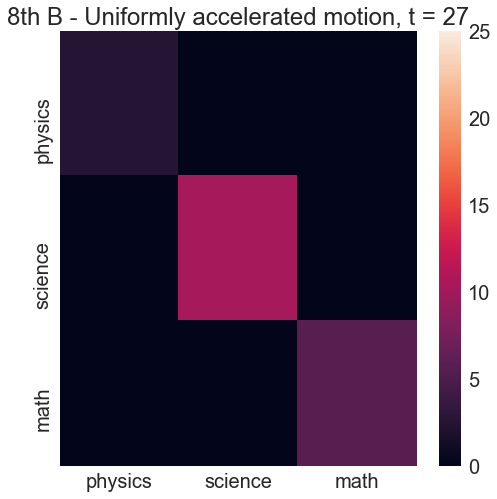

In [70]:
les_df = []
doc = labels_by_session.keys()[0]
a_label = dict_labels_english[doc]
directory = os.path.join('heatmap',a_label)
if not os.path.exists(directory):
    os.makedirs(directory)
filesnames = []
for i in range(len(labels_by_session[doc].keys())):
    # construir label_i
    label_i =  doc+'_period_'+str(i)
    a_matrix = super_matrices[label_i]
    for k in range(len(a_matrix)):
        for j in range(len(a_matrix)):
            if k>j:
                a_matrix[j,k] = n_s(a_matrix[j,k])
                a_matrix[k,j] = a_matrix[j,k]
    df = pd.DataFrame(a_matrix)
    df.columns = ['physics','science','math']
    df.index = ['physics','science','math']
    les_df.append(df)
    if i ==0:
        cbar =True
    else:
        cbar = False
    sns.set(font_scale=2.0)
    ax_sn = sns.heatmap(df,cbar=cbar,vmin=0,vmax=25) 
    ax_sn.set_title('8th '+a_label.split('-')[1]+'-'+a_label.split('-')[2]+", t = "+str(i))
    figure = ax_sn.get_figure()  
    figure.savefig(os.path.join(directory,label_i+".png"))
    filesnames.append(os.path.join(directory,label_i+".png"))
    del ax_sn
    del figure
    del df

In [71]:
a_label

'10th-B - Uniformly accelerated motion'

In [72]:
import imageio
images = []
for filename in filesnames:
    images.append(imageio.imread(filename))

kargs = { 'duration': 0.5 }
imageio.mimsave('heatmap/'+a_label+'.gif', images,**kargs)
print 'heatmap/'+a_label+'.gif'

heatmap/10th-B - Uniformly accelerated motion.gif


<img src="heatmap/10th-B - mrua y mrur.gif?controls=true" alt="Flowers in Chania">

## Heatmap all topics

In [349]:
super_topics_colors = ['#64DD17','#6200EA','#FFD600'] #science, #physics, #math

colors_by_topic = {}
for i in range(len(content_topics)):
    colors_by_topic[selected_topics[content_topics[i]]] = super_topics_colors[1]
for i in range(len(science_skills_topics)):
    colors_by_topic[selected_topics[science_skills_topics[i]]] = super_topics_colors[0]
for i in range(len(science_tools_topics)):
    colors_by_topic[selected_topics[science_tools_topics[i]]] = super_topics_colors[2]

In [350]:
for tick_label in ax_sn.axes.get_yticklabels():
    tick_text = tick_label.get_text()
    tick_label.set_color(colors_by_topic[tick_text])

NameError: name 'ax_sn' is not defined

In [351]:
def sort_a_matrix(a_matrix,sorted_index):
    new_matrix = np.zeros((len(sorted_index),len(sorted_index)))
    for i in range(len(sorted_index)):
        for j in range(len(sorted_index)):
            new_matrix[i,j] = a_matrix[sorted_index[i],sorted_index[j]]
    return new_matrix

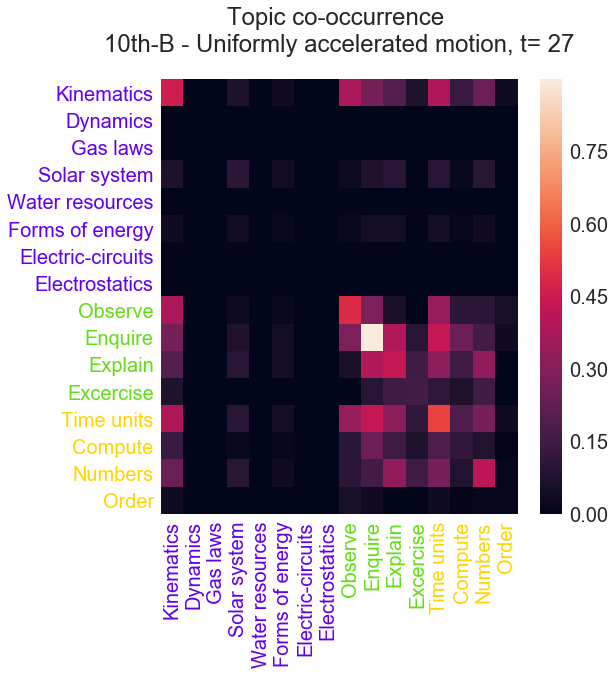

In [354]:
les_df = []
a_label = dict_labels_english[doc]
directory = os.path.join('heatmap',a_label+'_test')
if not os.path.exists(directory):
    os.makedirs(directory)
filesnames = []
sorted_topics = content_topics + science_skills_topics + science_tools_topics
sorted_names_topics = np.array(selected_topics)[sorted_topics]
for i in range(len(labels_by_session[doc].keys())):
    # construir label_i
    label_i =  doc+'_period_'+str(i)
    a_matrix = co_ocurrence_matrices[label_i]
    for k in range(len(a_matrix)):
        for j in range(len(a_matrix)):
            if k>j:
                a_matrix[k,j] = a_matrix[j,k]
    df = pd.DataFrame(sort_a_matrix(a_matrix,sorted_topics))
    df.columns = sorted_names_topics#['physics','science','math']
    df.index =  sorted_names_topics#['physics','science','math']
    # df = 
    les_df.append(df)
    if i ==0:
        cbar =True
    else:
        cbar = False
    sns.set(font_scale=2.0)
    ax_sn = sns.heatmap(df,vmin=0,cbar=cbar,) 
    ax_sn.set_title(u"Topic co-occurrence \n"+a_label+", t= "+str(i),y=1.05)    
    for tick_label in ax_sn.axes.get_yticklabels():
        tick_text = tick_label.get_text()
        tick_label.set_color(colors_by_topic[tick_text])
    for tick_label in ax_sn.axes.get_xticklabels():
        tick_text = tick_label.get_text()
        tick_label.set_color(colors_by_topic[tick_text])
    figure = ax_sn.get_figure()  
    figure.savefig(os.path.join(directory,label_i+".png"), bbox_inches='tight')
    filesnames.append(os.path.join(directory,label_i+".png"))


In [355]:
images = []
for filename in filesnames:
    images.append(imageio.imread(filename))
kargs = { 'duration': 0.5 }
imageio.mimsave('heatmap_test/'+a_label+'.gif', images,**kargs)
print 'heatmap_test/'+a_label+'_by_topic.gif'

heatmap_test/10th-B - Uniformly accelerated motion_by_topic.gif


In [406]:
pd.DataFrame(co_ocurrence_matrices.values()[0])

0         1         2         3    4         5         6         7   \
0   0.808400  0.394127  0.407637  0.892475  0.0  0.410029  0.406194  0.291360   
1   0.394127  1.646000  0.459041  1.691642  0.0  0.421195  0.000000  0.096351   
2   0.407637  0.459041  1.428500  2.270892  0.0  0.438638  0.357825  0.048563   
3   0.892475  1.691642  2.270892  8.760000  0.0  1.857946  1.559117  0.698294   
4   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
5   0.410029  0.421195  0.438638  1.857946  0.0  0.871500  0.406522  0.151318   
6   0.406194  0.000000  0.357825  1.559117  0.0  0.406522  1.320000  0.365902   
7   0.291360  0.096351  0.048563  0.698294  0.0  0.151318  0.365902  0.603000   
8   0.569804  0.509177  0.580913  1.716848  0.0  0.491037  0.672957  0.219438   
9   0.321045  0.287381  0.552640  2.248020  0.0  0.515213  0.709948  0.449068   
10  0.269146  0.000000  0.249662  0.762248  0.0  0.185715  0.550561  0.183407   
11  0.593950  0.168007  0.361254  0.770337  0.0  0.428966  0.401424  0.118659   
12  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
13  1.331484  0.880324  1.194978  2.575891  0.0  0.329497  2.126894  0.377326   
14  0.256254  0.947531  0.532166  1.819427  0.0  0.641841  0.054222  0.000000   
15  1.350077  0.377250  1.907713  6.173149  0.0  1.382553  1.891197  1.178875   

          8         9         10        11   12         13        14        15  
0   0.569804  0.321045  0.269146  0.593950  0.0   1.331484  0.256254  1.350077  
1   0.509177  0.287381  0.000000  0.168007  0.0   0.880324  0.947531  0.377250  
2   0.580913  0.552640  0.249662  0.361254  0.0   1.194978  0.532166  1.907713  
3   1.716848  2.248020  0.762248  0.770337  0.0   2.575891  1.819427  6.173149  
4   0.000000  0.000000  0.000000  0.000000  0.0   0.000000  0.000000  0.000000  
5   0.491037  0.515213  0.185715  0.428966  0.0   0.329497  0.641841  1.382553  
6   0.672957  0.709948  0.550561  0.401424  0.0   2.126894  0.054222  1.891197  
7   0.219438  0.449068  0.183407  0.118659  0.0   0.377326  0.000000  1.178875  
8   0.860300  0.772481  0.430581  0.462788  0.0   2.031846  0.511710  1.265976  
9   0.772481  1.377000  0.451192  0.223956  0.0   1.447564  0.495417  1.656522  
10  0.430581  0.451192  0.337400  0.243527  0.0   1.104844  0.020647  0.854630  
11  0.462788  0.223956  0.243527  0.566300  0.0   0.840102  0.254971  1.123529  
12  0.000000  0.000000  0.000000  0.000000  0.0   0.000000  0.000000  0.000000  
13  2.031846  1.447564  1.104844  0.840102  0.0  10.937700  0.577460  2.297210  
14  0.511710  0.495417  0.020647  0.254971  0.0   0.577460  1.399500  0.614723  
15  1.265976  1.656522  0.854630  1.123529  0.0   2.297210  0.614723  7.891600

### Get co-occurrence vectors

In [79]:
co_occurrence_vectors_corpus = {}
for key in co_ocurrence_matrices_all_corpus.keys():
    matrix = co_ocurrence_matrices_all_corpus[key]
    co_occurrence_vectors_corpus[key] = ep.co_occurrence_matrix_to_vector(matrix,USE_DIAGONAL)

In [80]:
len(co_occurrence_vectors_corpus)

56

In [81]:
co_occurrence_vectors = {}
for key in co_ocurrence_matrices.keys():
    matrix = co_ocurrence_matrices[key]
    co_occurrence_vectors[key] = ep.co_occurrence_matrix_to_vector(matrix,USE_DIAGONAL)

In [82]:
len(co_occurrence_vectors)

632

In [83]:
co_occurrence_vectors.values()[0].shape

(120L,)

#### Normalize vectors

In [84]:
reload(ep)

<module 'ena.ena_processing' from 'ena\ena_processing.pyc'>

In [85]:
# normalized to unit vectors
norm_vectors_corpus = ep.norm_vectors(co_occurrence_vectors_corpus)

In [86]:
norm_vectors = ep.norm_vectors(co_occurrence_vectors)

ena\ena_processing.py:75: RuntimeWarning:

invalid value encountered in divide



In [87]:
values = []
for i in range(len(co_occurrence_vectors.values())):
    values.append(np.linalg.norm(co_occurrence_vectors.values()[i]))
    if values[i] == 0 and i>300:
        print i

In [88]:
co_occurrence_vectors.keys()[300]

'1498071546419_period_1'

In [89]:
sum_vectors = np.nansum(norm_vectors.values(),0)
n_sessions_corpus = len(norm_vectors_corpus)
mean_vector = [x/n_sessions_corpus for x in sum_vectors]

In [90]:
norm_vectors_corpus = ep.sub_vectors(norm_vectors_corpus,mean_vector)

In [91]:
norm_vectors = ep.sub_vectors(norm_vectors,mean_vector)

In [92]:
matrix_vectors = np.matrix(norm_vectors_corpus.values())
matrix_vectors.shape

(56L, 120L)

In [93]:
vectors_by_session = {}
for k in labels_by_session.keys():
    aux_list = labels_by_session[k].keys()
    vectors_by_session[k] = np.sum(map(lambda x: norm_vectors[x],aux_list),0)/len(aux_list)

In [94]:
np.array(selected_topics)[content_topics]

array(['Kinematics', 'Dynamics', 'Gas laws', 'Solar system',
       'Water resources', 'Forms of energy', 'Electric-circuits',
       'Electrostatics'], dtype='|S17')

### Get axes to project each session

In [95]:
n_pairs_coocurrence = len(norm_vectors.values()[0])
n_pairs_coocurrence

120

In [96]:
with open(os.path.join(pickle_path,'plane_1.pickle'),'rb') as f:
    axis_X = pickle.load(f)
    axis_Y = pickle.load(f)
    label_x = pickle.load(f)
    label_y = pickle.load(f)
    T_x = pickle.load(f)        
    T_y = pickle.load(f)

### Get projections

In [97]:
x_values = {}
y_values = {}
for k,vector in norm_vectors.items():
    x_values[k] = np.dot(vector,axis_X)
    y_values[k] = np.dot(vector,axis_Y)

In [98]:
session_x = {}
session_y = {}
for k,vector in norm_vectors_corpus.items():
    session_x[k] = np.dot(vector,axis_X)
    session_y[k] = np.dot(vector,axis_Y)

In [99]:
session_x_check = {}
session_y_check = {}
for k,vector in vectors_by_session.items():
    session_x_check[k] = np.dot(vector,axis_X)
    session_y_check[k] = np.dot(vector,axis_Y)

### Get Ideal topics

In [100]:
ideal_topics_vectors = [np.zeros((len(selected_topics),len(selected_topics))) for i in range(len(selected_topics))]
for i in range(len(ideal_topics_vectors)):
    ideal_topics_vectors[i][i,:] = [1 for j in range(len(selected_topics))]
    ideal_topics_vectors[i][:,i] = [1 for j in range(len(selected_topics))]
len(selected_topics)
ideal_topics_vectors = [ep.co_occurrence_matrix_to_vector(x,USE_DIAGONAL) for x in ideal_topics_vectors]

In [101]:
#topics_vectors
x_values_ideal_topics = []
y_values_ideal_topics = []
for vector in ideal_topics_vectors:
    x_values_ideal_topics.append(np.dot(vector,axis_X))
    y_values_ideal_topics.append(np.dot(vector,axis_Y))

### Save data

In [102]:
with open(os.path.join(pickle_path,'trajectories_'+str(PERIOD_LENGTH)+'_minutes_'+str(OVERLAP_LENGTH)+'overlap_complete_sample_fixed_trajectories.pickle'),'wb') as f:
    pickle.dump(x_values,f)
    pickle.dump(y_values,f)
    pickle.dump(labels,f)
    pickle.dump(labels_by_session,f)
    pickle.dump(session_x,f)
    pickle.dump(session_y,f)
    pickle.dump(session_x_check,f)
    pickle.dump(session_y_check,f)

## Plot all pieces

In [103]:
reload(ev)

<module 'ena.ena_viz' from 'ena\ena_viz.pyc'>

In [104]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['f', 'matrix']
`%matplotlib` prevents importing * from pylab and numpy



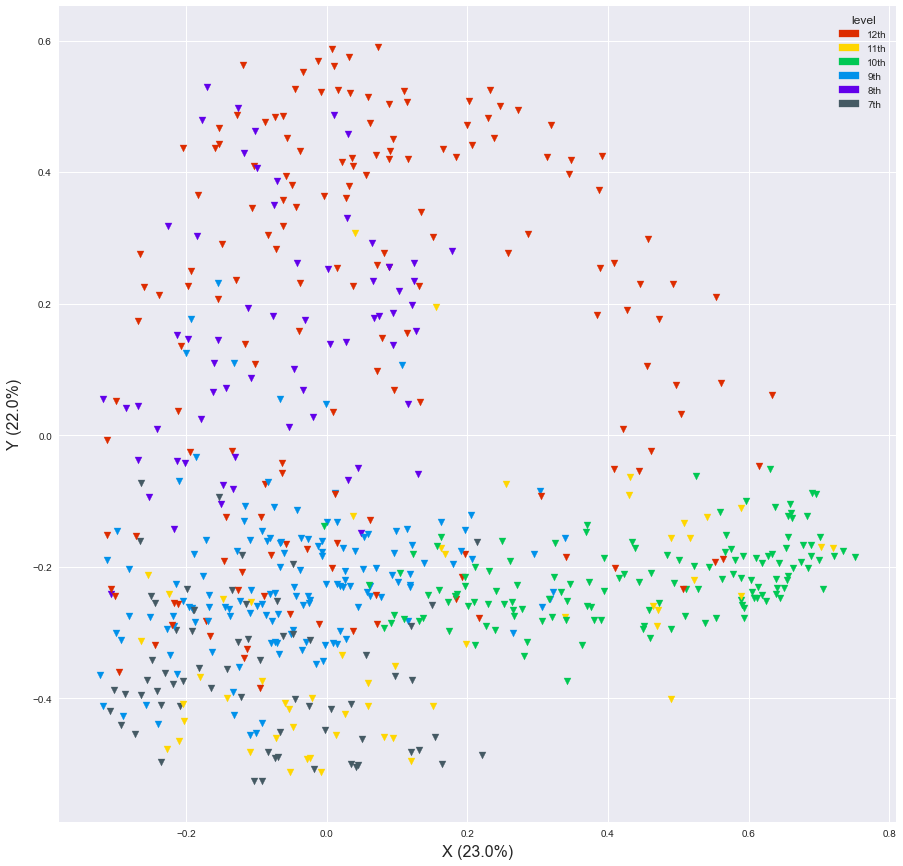

In [109]:
ev.scatter_plot_by_grade(x_values,y_values,label_x,label_y,labels,'upper right')

## Plot one trajectory

In [106]:
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
from mpld3 import fig_to_d3

C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\mpld3\utils.py:50: DeprecationWarning:

mpld3.fig_to_d3 is deprecated and will be removed.  Use mpld3.fig_to_html instead



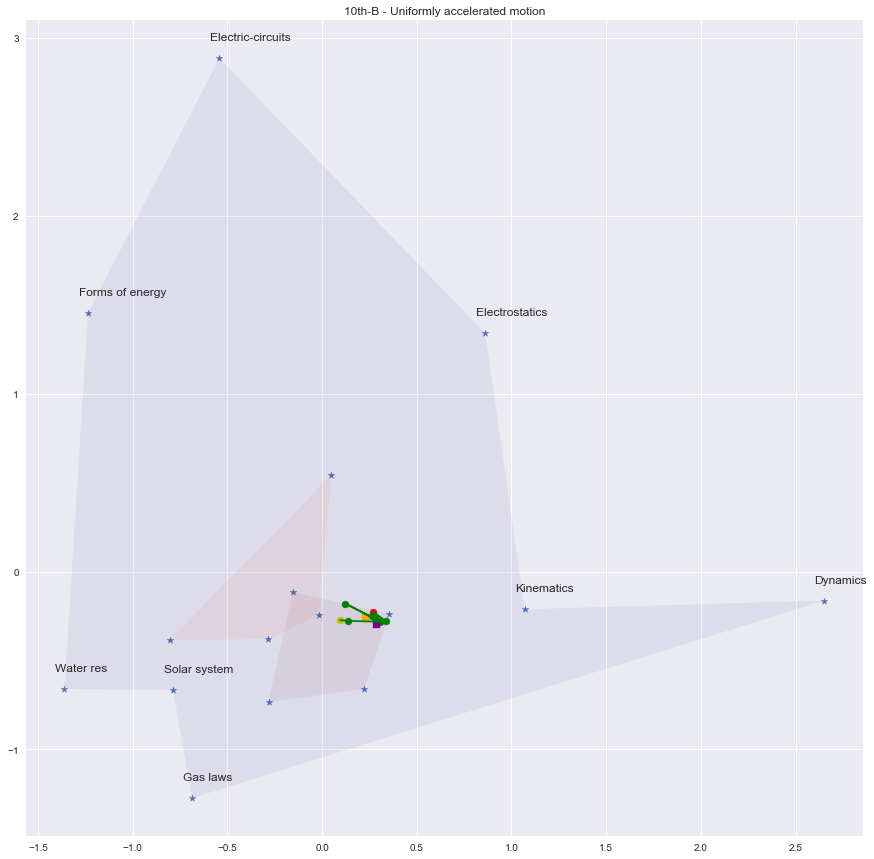

In [110]:
counter = 0
for doc in labels_by_session.keys()[0:1]:
    # draw polygons
    fig, ax = plt.subplots()
    scatt = plt.scatter(T_x,T_y,marker='*')
    tooltips_nodes = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
    mpld3.plugins.connect(plt.gcf(), tooltips_nodes)
    
    polygon_content = Polygon(zip(np.array(T_x)[content_topics],np.array(T_y)[content_topics]),True)
    polygon_skills = Polygon(zip(np.array(T_x)[science_skills_topics],np.array(T_y)[science_skills_topics]),True)
    polygon_arithmetic = Polygon(zip(np.array(T_x)[science_tools_topics],np.array(T_y)[science_tools_topics]),True)
    
    patches = [polygon_content,polygon_skills,polygon_arithmetic]
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.06)
    colors = [ 0.82012597,81.58657731,98.9247411 ]
    p.set_array(np.array(colors))
    ax.add_collection(p)
    for t in content_topics:
        s = selected_topics[t]
        if selected_topics[t].startswith('Water'):
            s = 'Water res'
        ax.annotate(s,xy=(T_x[t],T_y[t]),xytext=(T_x[t]-0.05,T_y[t]+0.1))
    
    # draw xvalues yvalues using labels_array_matrices
    x_by_session = []
    y_by_session = []
    a_tooltips = []
    a_label = ""
    
    for i in range(len(labels_by_session[doc].keys())):
        # construir label_i
        label_i = doc+'_period_'+str(i)
        #value_i = labels_array_matrices.index(label_i)
        a_label = labels_by_session[doc][label_i]
        x_by_session.append(x_values[label_i])
        y_by_session.append(y_values[label_i])
        if i == 0:
            a_color = 'r'
        elif a_label.startswith('end'):
            a_color = 'y'
        else:
            a_color = 'g'
        scatt_ = plt.scatter(x_values[label_i],y_values[label_i],c=a_color)
        a_tooltips.append(mpld3.plugins.PointLabelTooltip(scatt_, labels=[a_label]))

    plt.plot(x_by_session,y_by_session,'g')
    
    for j in range(len(a_tooltips)):
        mpld3.plugins.connect(plt.gcf(), a_tooltips[j])

    # original session
    plt.scatter([session_x[doc]],[session_y[doc]],c='purple',marker='s')
    plt.scatter([session_x_check[doc]],[session_y_check[doc]],c='orange',marker='s')
    

    plt.title(a_label[4:])

    open(os.path.join('output','html2',str(PERIOD_LENGTH)+'m','trajectory_session_'+str(doc)+'_'+a_label[4:]+'_10_minutes.html'), 'w').write(fig_to_d3(fig))
    fig.savefig(os.path.join('output','svg',str(PERIOD_LENGTH)+'m','trajectory_session_'+str(doc)+'_'+a_label[4:]+'_10_minutes.svg'))
    mpld3.fig_to_html(fig,'trajectory_seesion_'+str(i)+'.html')

C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\mpld3\utils.py:50: DeprecationWarning:

mpld3.fig_to_d3 is deprecated and will be removed.  Use mpld3.fig_to_html instead

C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\mpld3\utils.py:50: DeprecationWarning:

mpld3.fig_to_d3 is deprecated and will be removed.  Use mpld3.fig_to_html instead

C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\mpld3\utils.py:50: DeprecationWarning:

mpld3.fig_to_d3 is deprecated and will be removed.  Use mpld3.fig_to_html instead

C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\mpld3\utils.py:50: DeprecationWarning:

mpld3.fig_to_d3 is deprecated and will be removed.  Use mpld3.fig_to_html instead

C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\mpld3\utils.py:50: DeprecationWarning:

mpld3.fig_to_d3 is deprecated and will be removed.  Use mp

C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\mpld3\utils.py:50: DeprecationWarning:

mpld3.fig_to_d3 is deprecated and will be removed.  Use mpld3.fig_to_html instead

C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\mpld3\utils.py:50: DeprecationWarning:

mpld3.fig_to_d3 is deprecated and will be removed.  Use mpld3.fig_to_html instead

C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\mpld3\utils.py:50: DeprecationWarning:

mpld3.fig_to_d3 is deprecated and will be removed.  Use mpld3.fig_to_html instead

C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\mpld3\utils.py:50: DeprecationWarning:

mpld3.fig_to_d3 is deprecated and will be removed.  Use mpld3.fig_to_html instead

C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\mpld3\utils.py:50: DeprecationWarning:

mpld3.fig_to_d3 is deprecated and will be removed.  Use mp

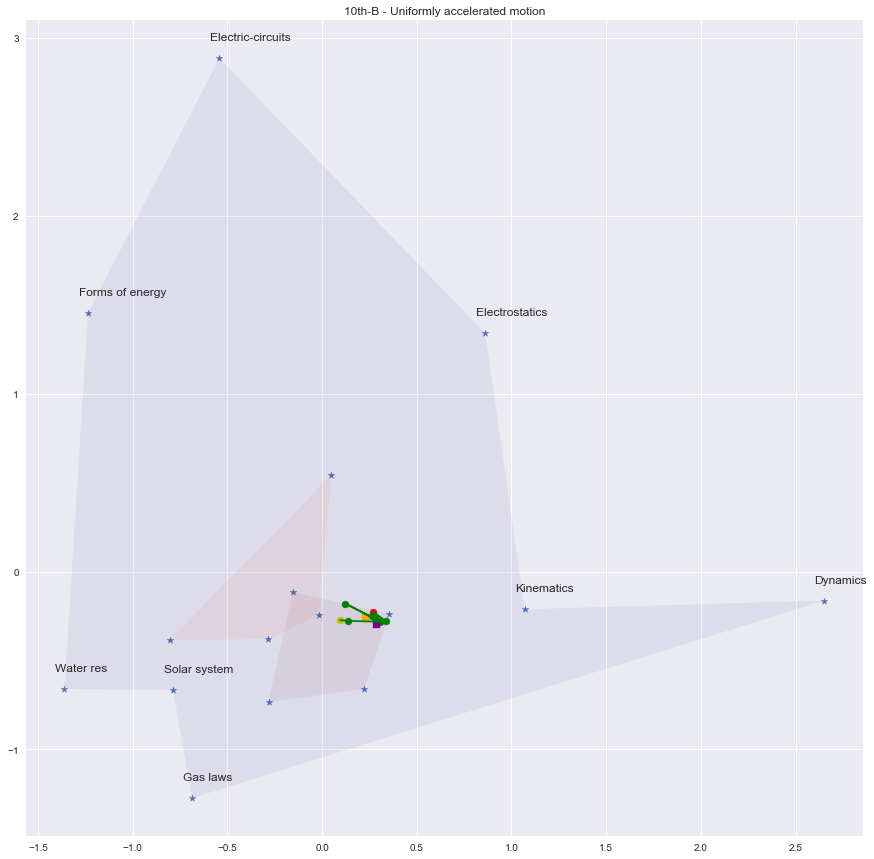

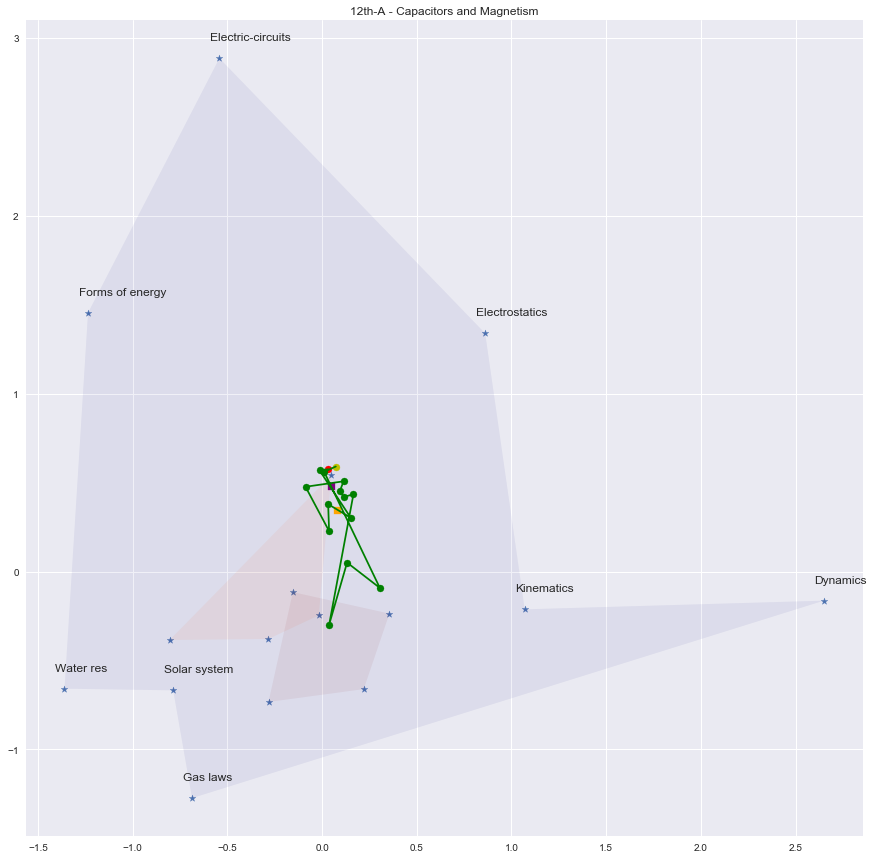

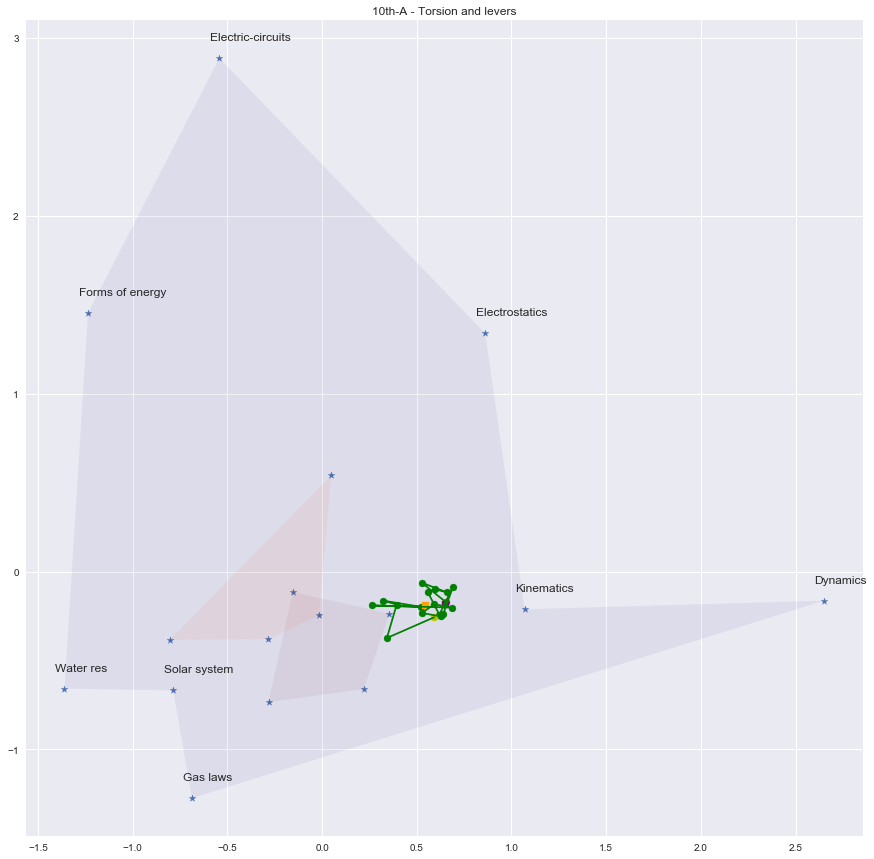

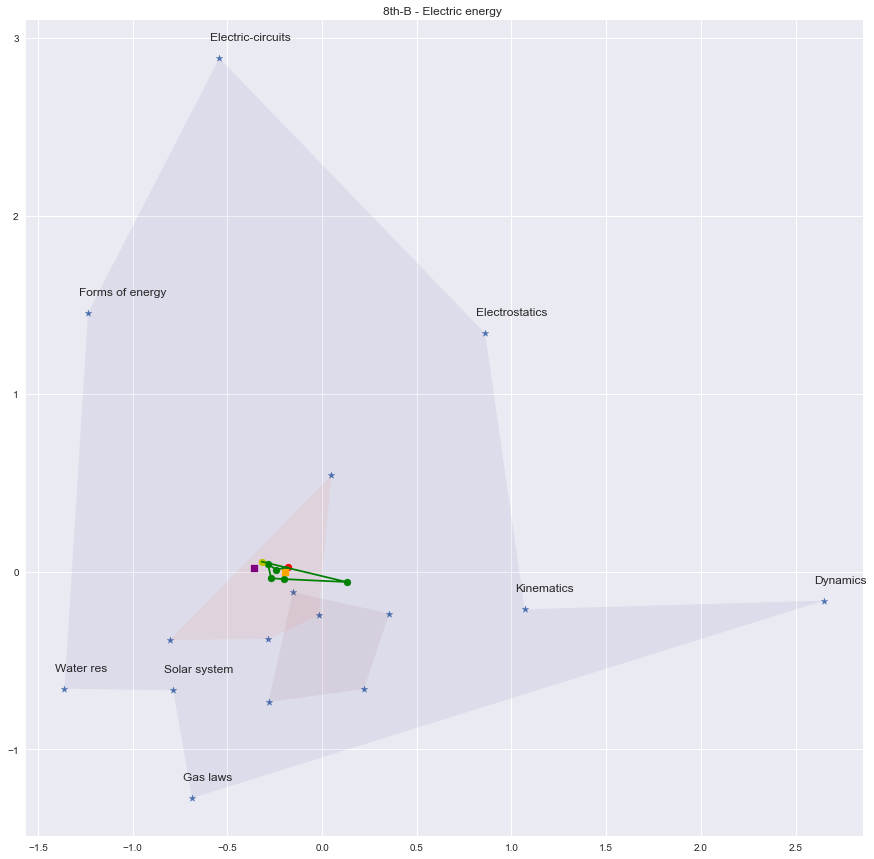

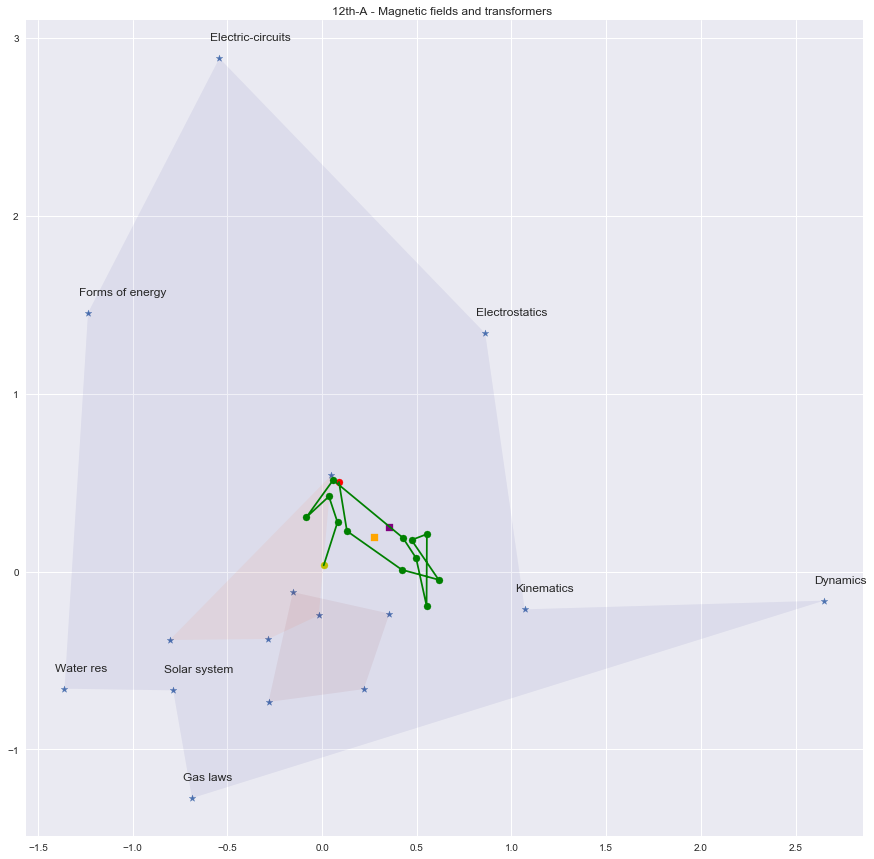

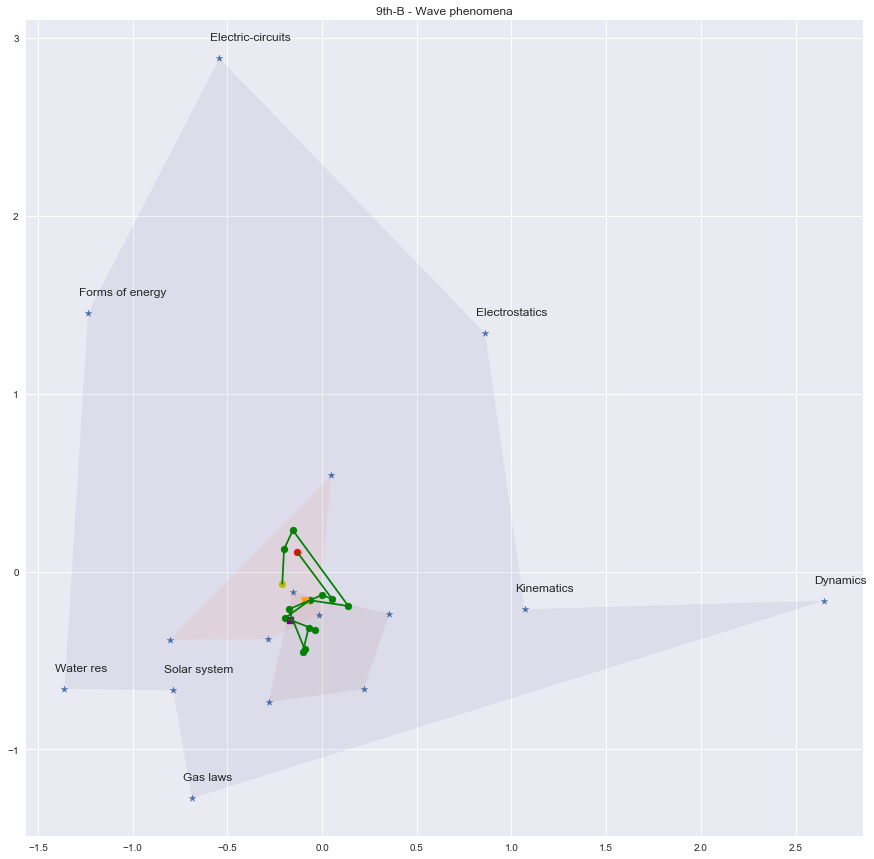

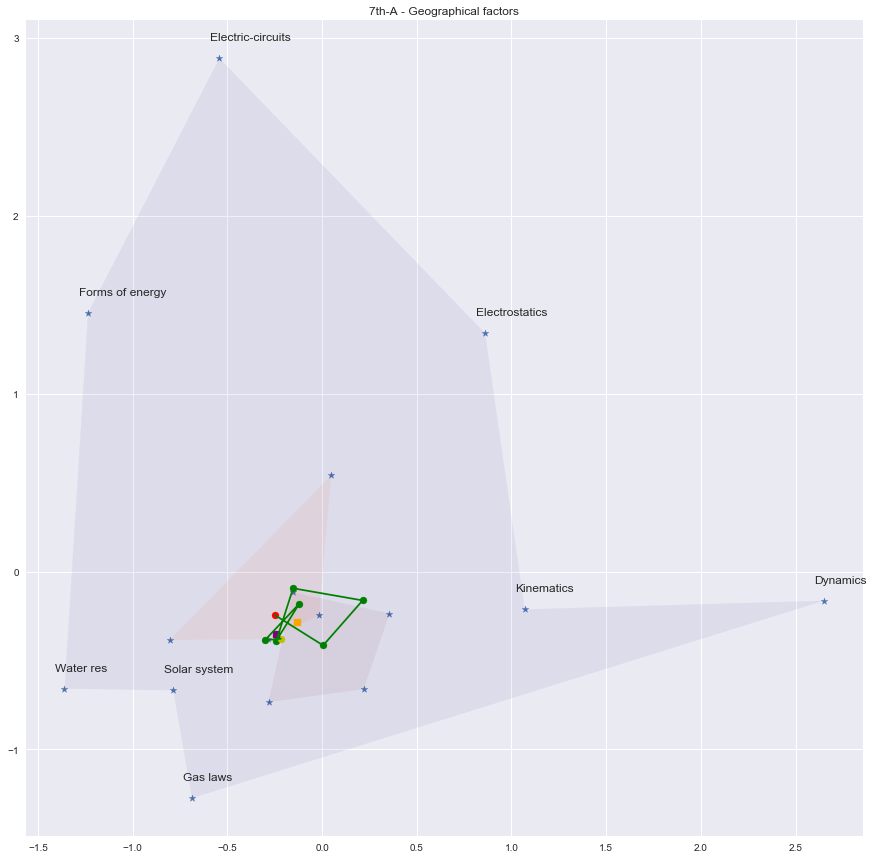

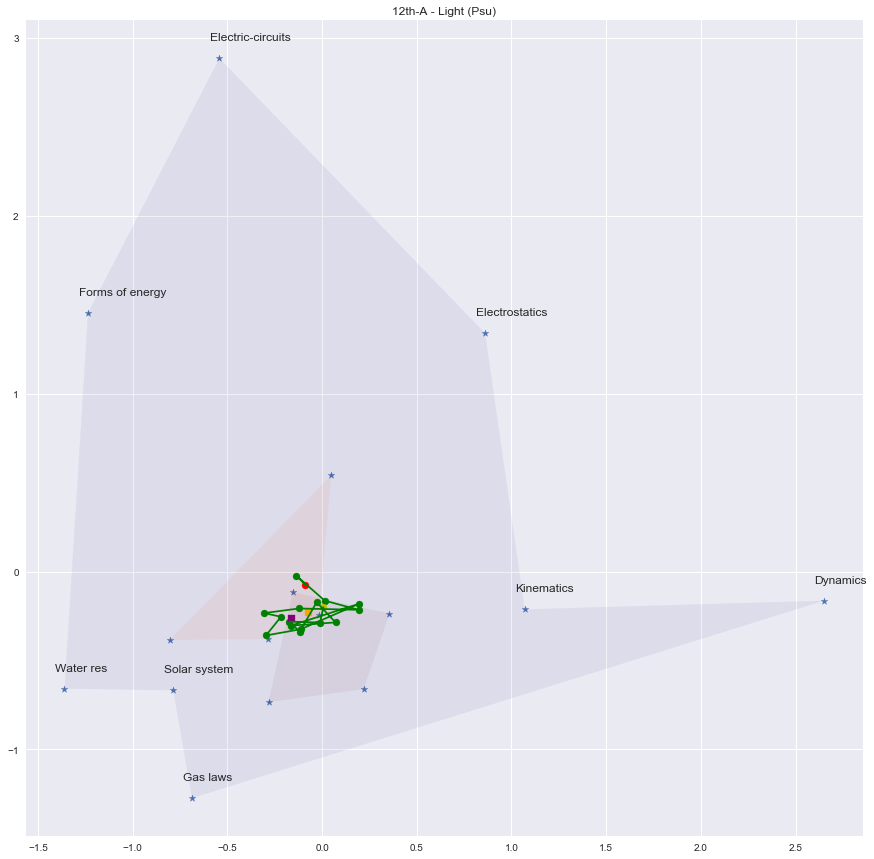

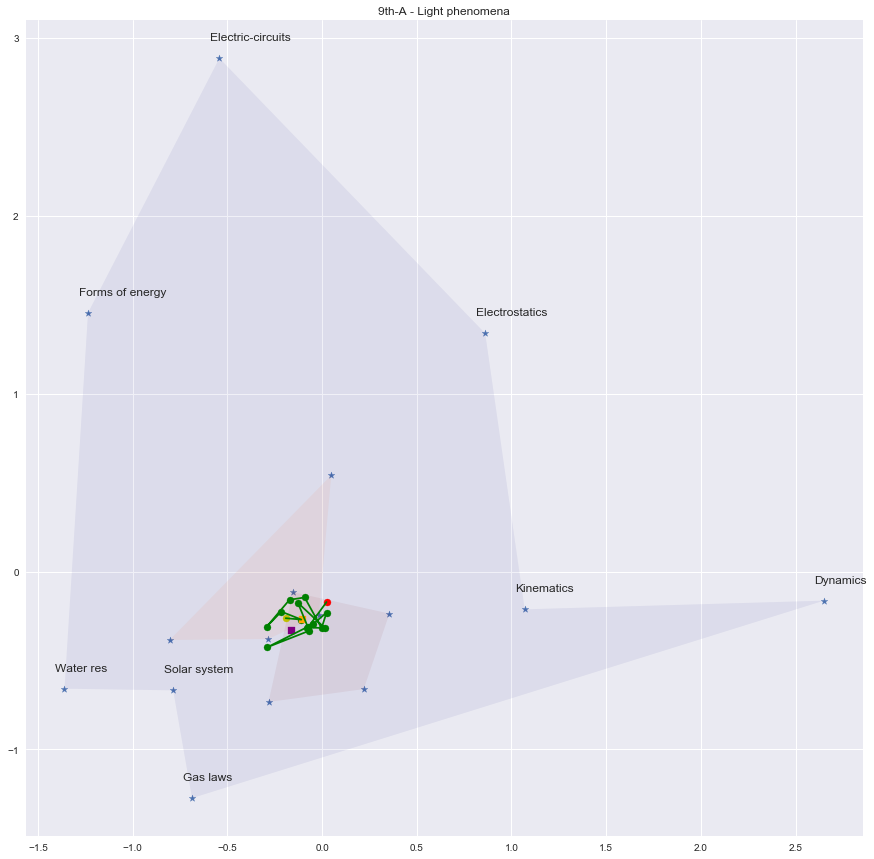

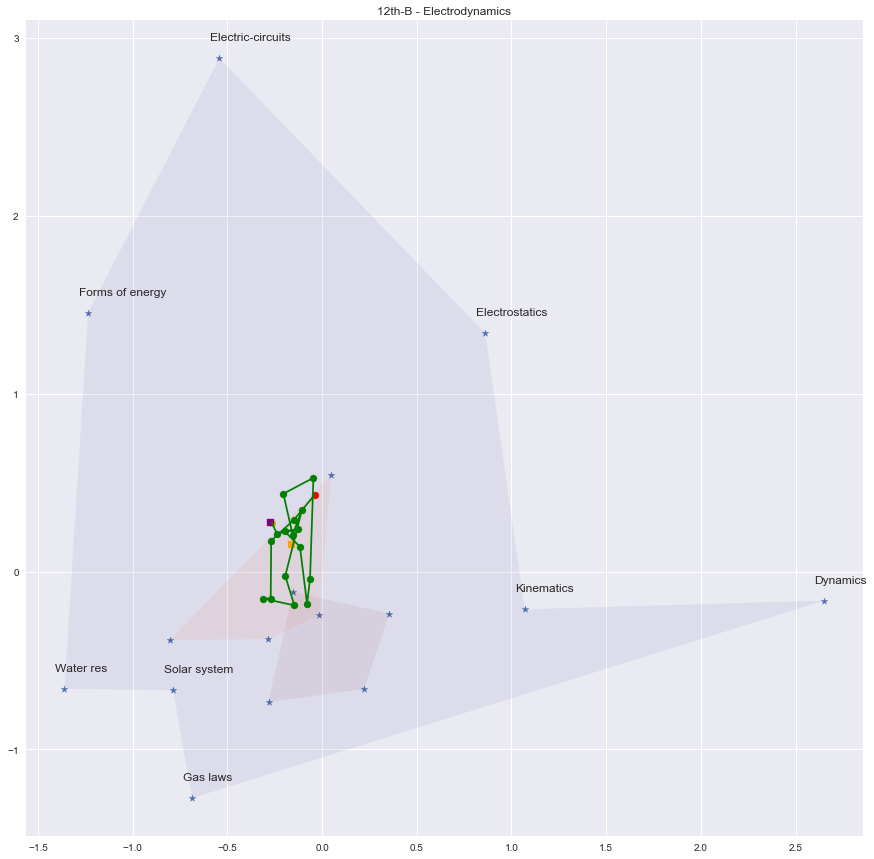

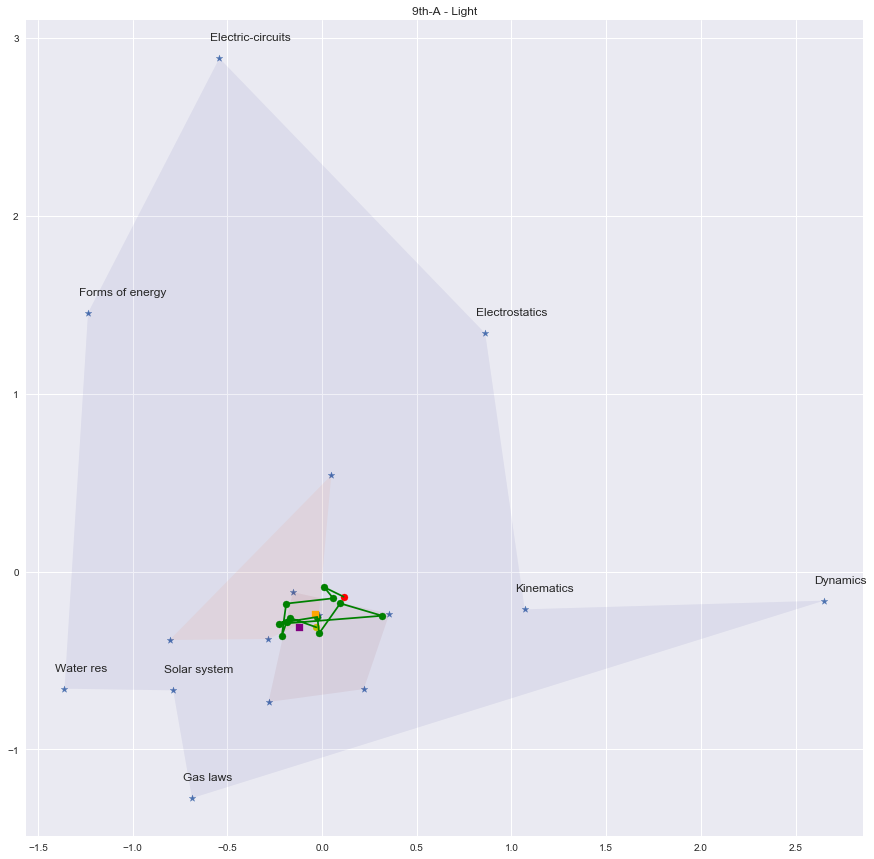

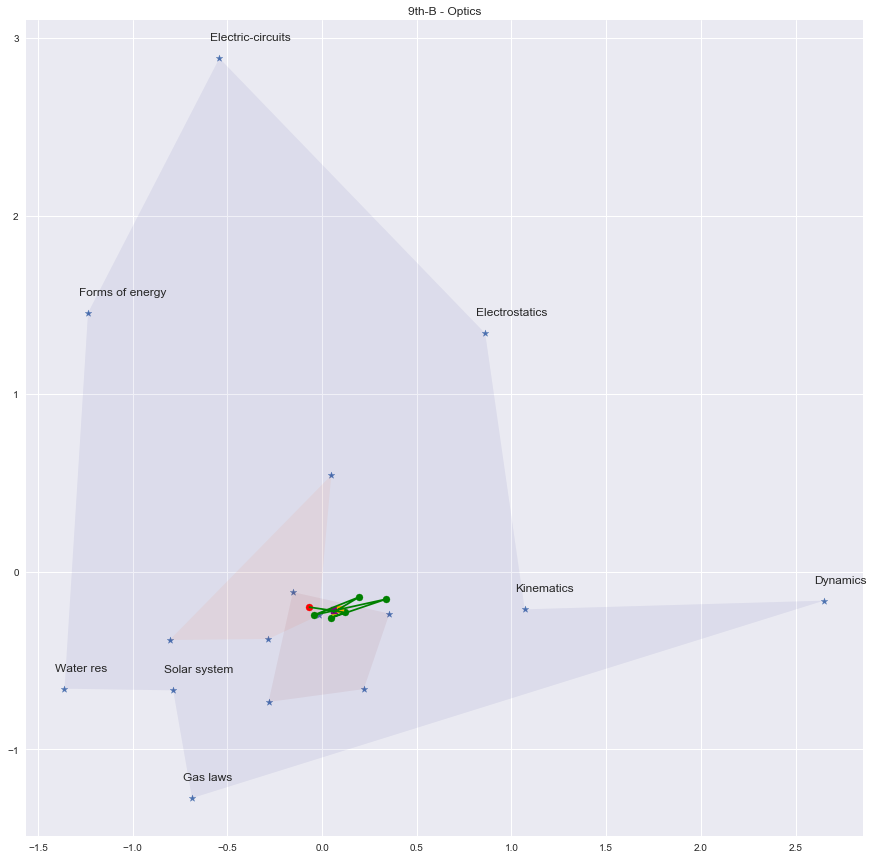

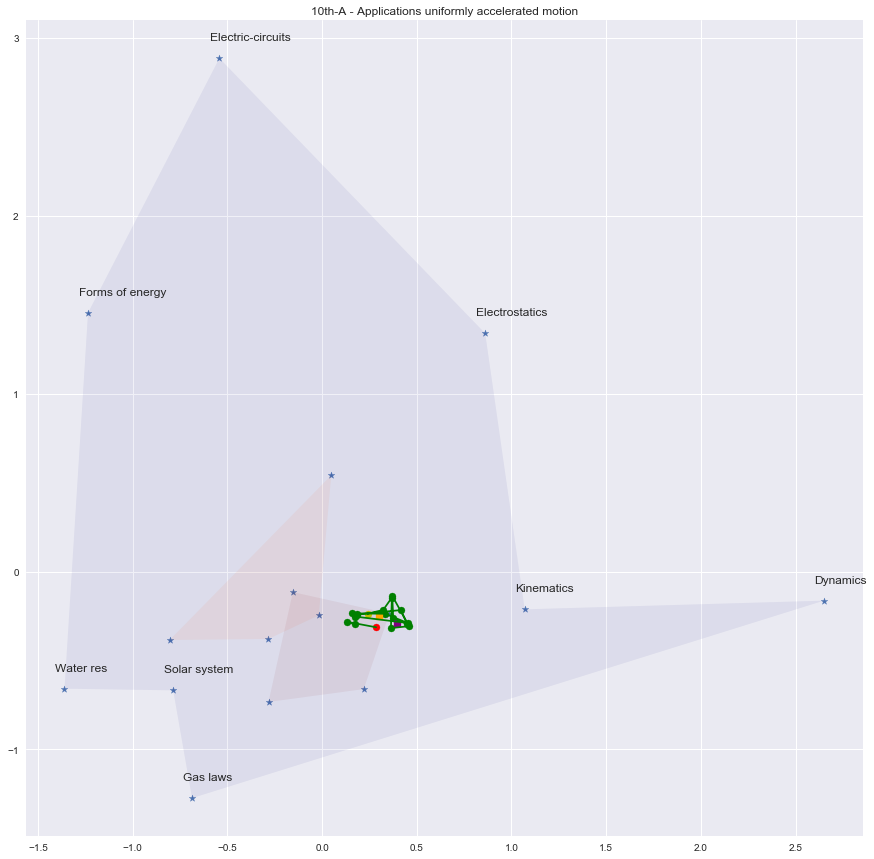

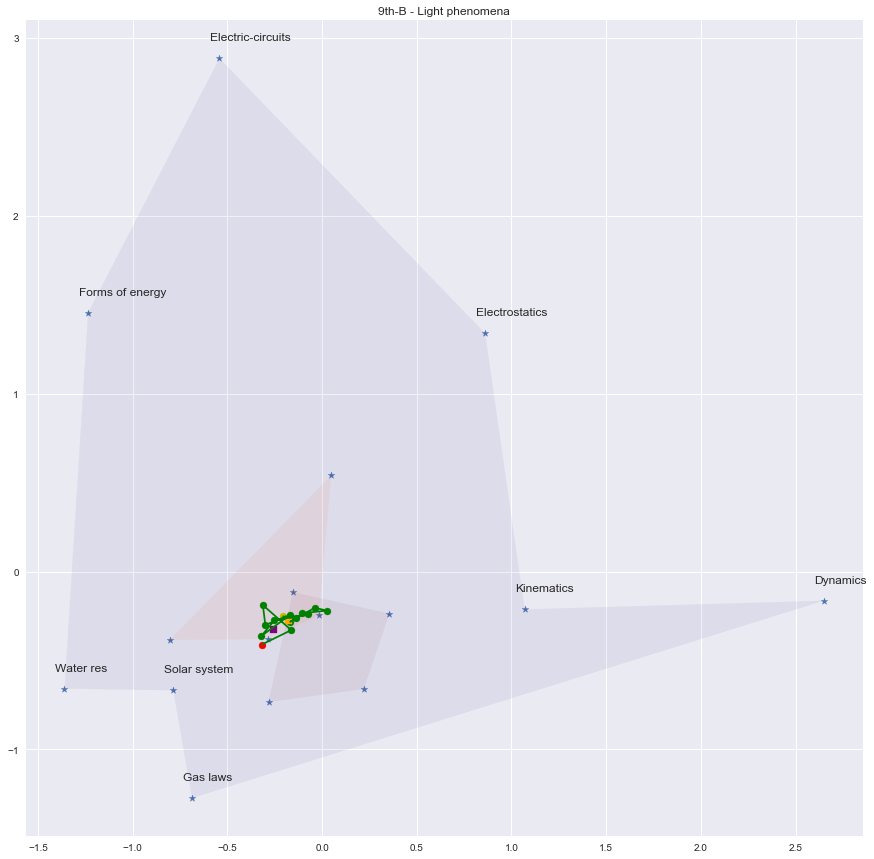

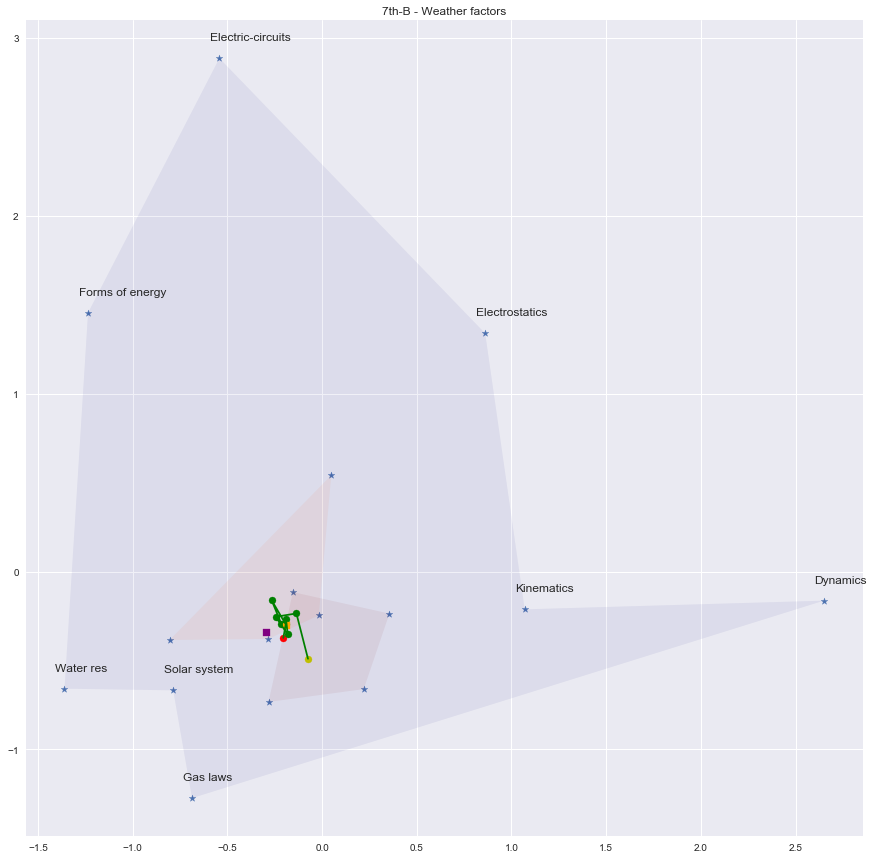

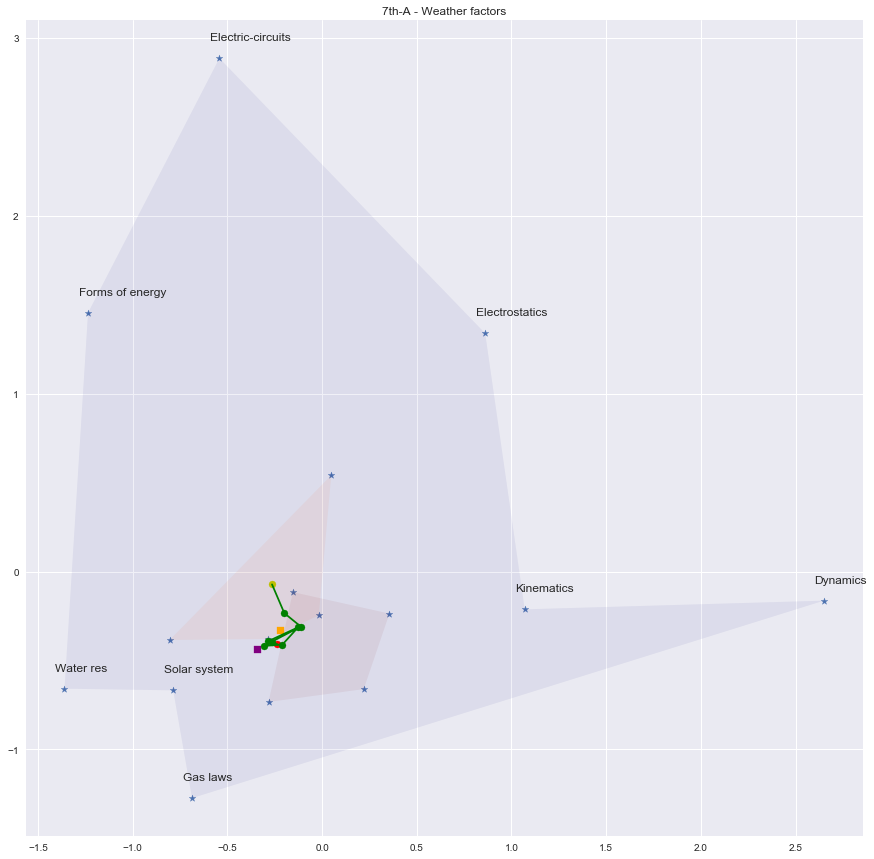

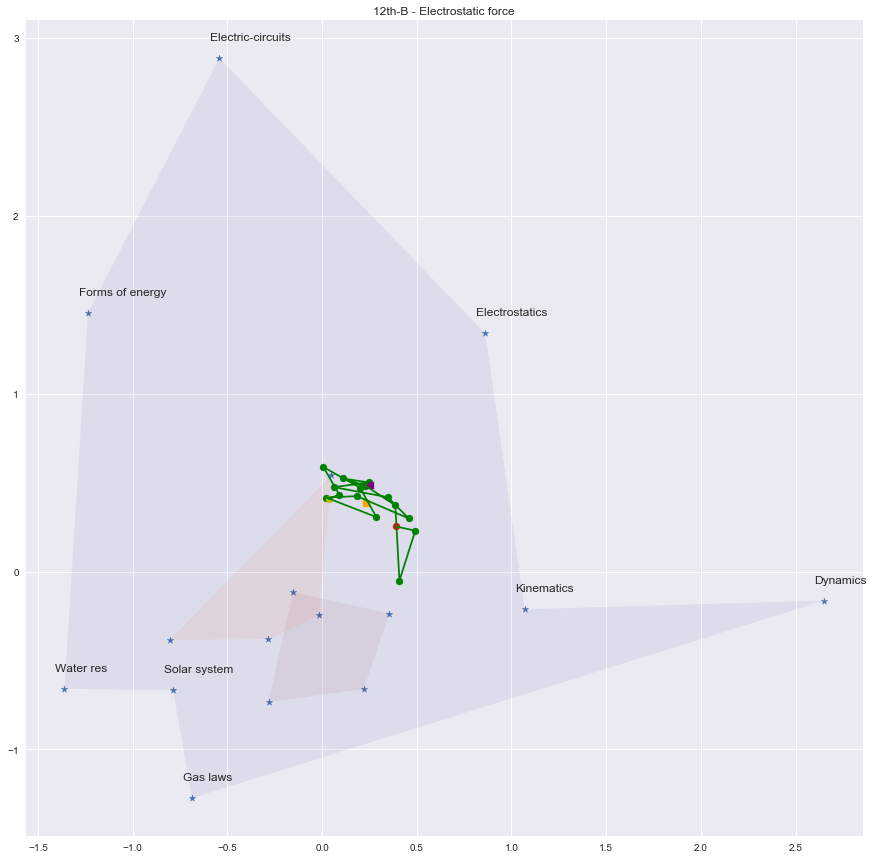

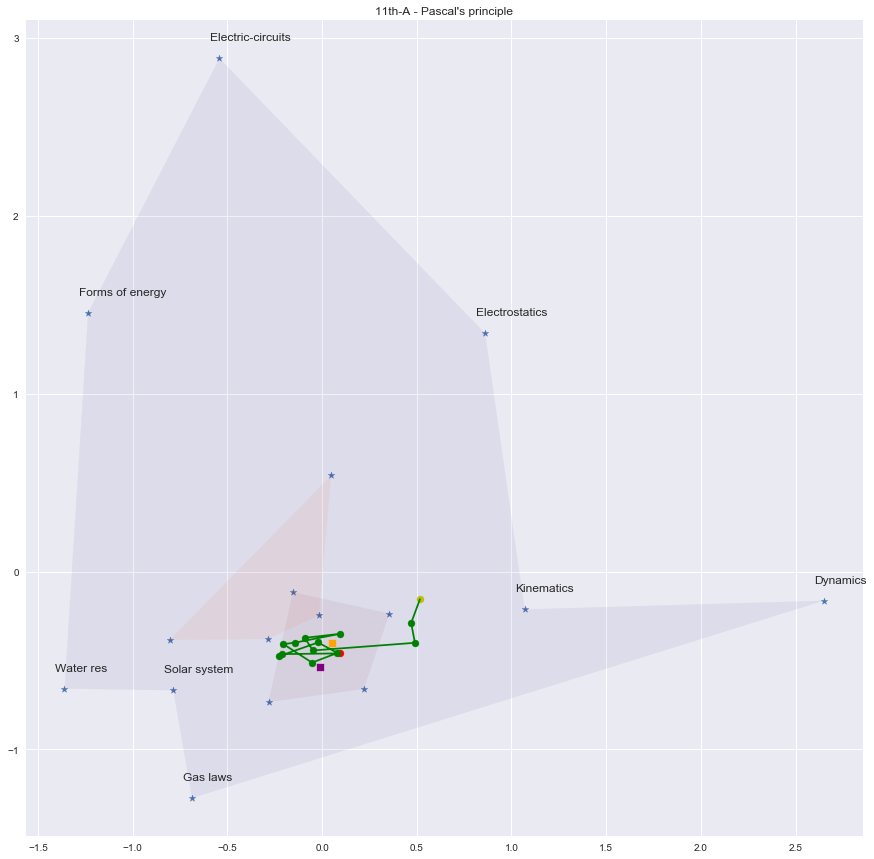

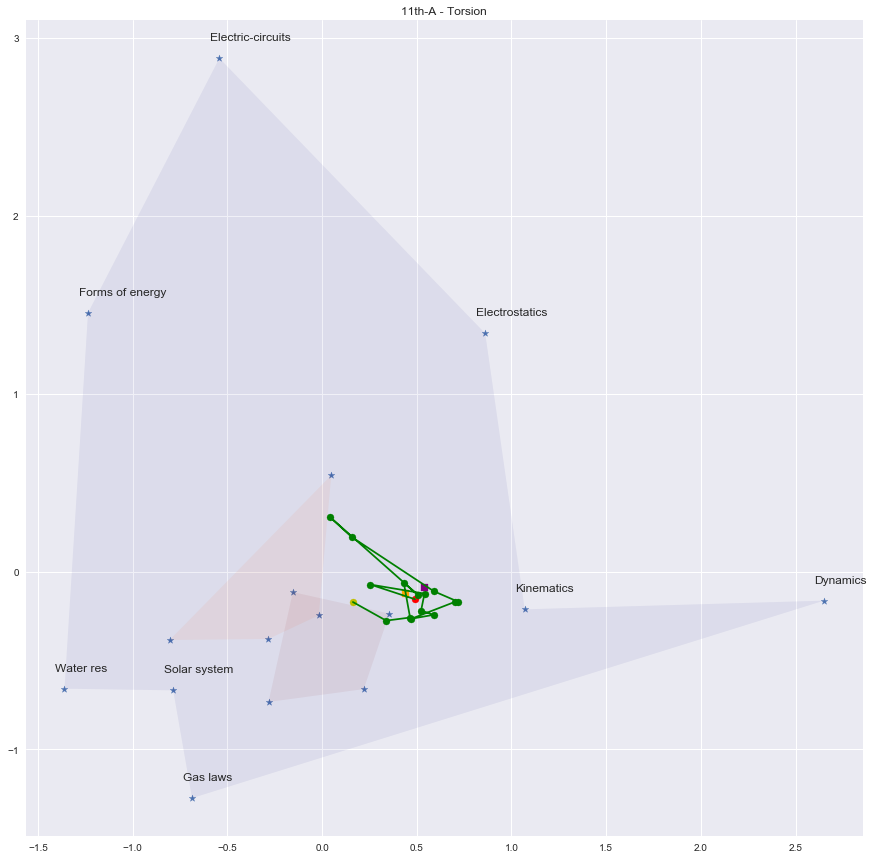

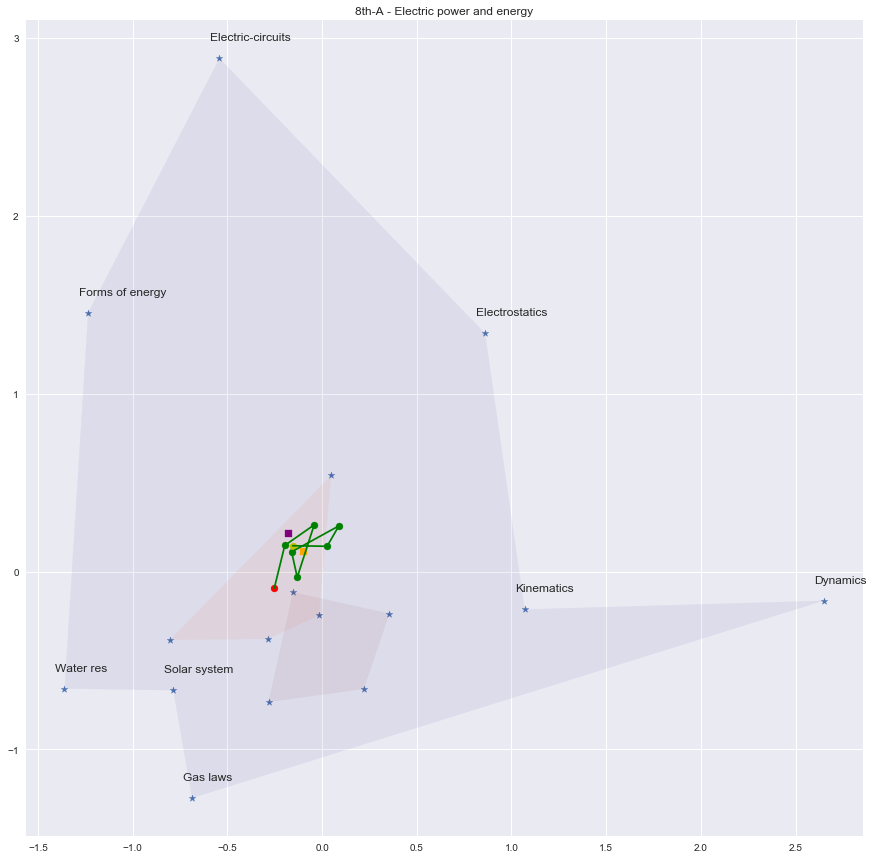

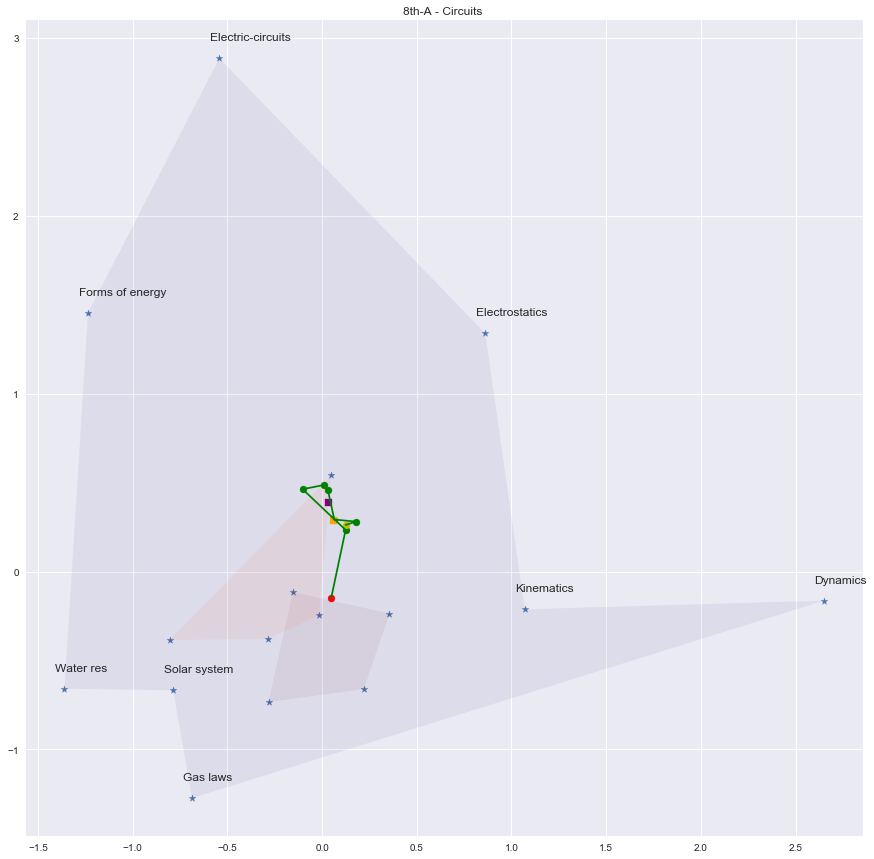

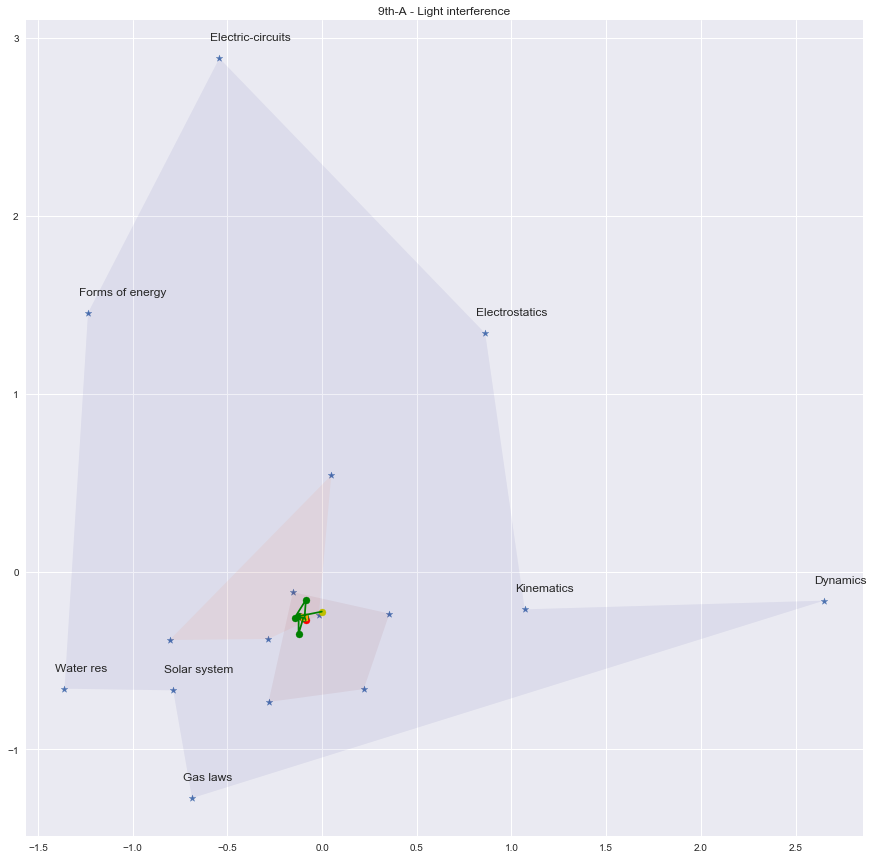

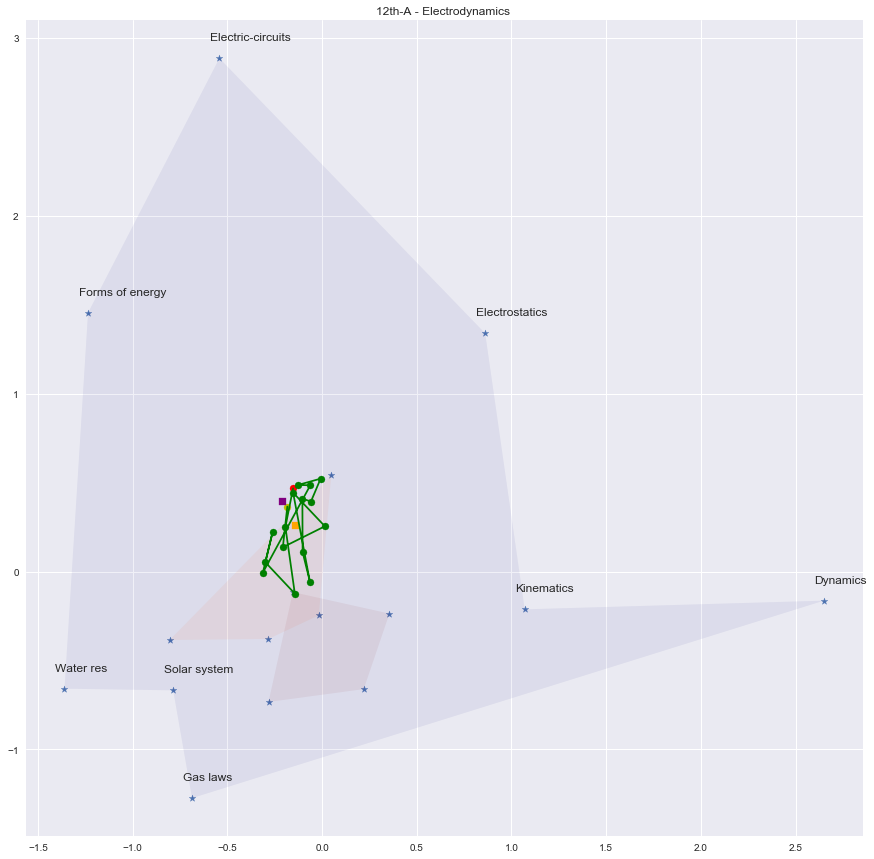

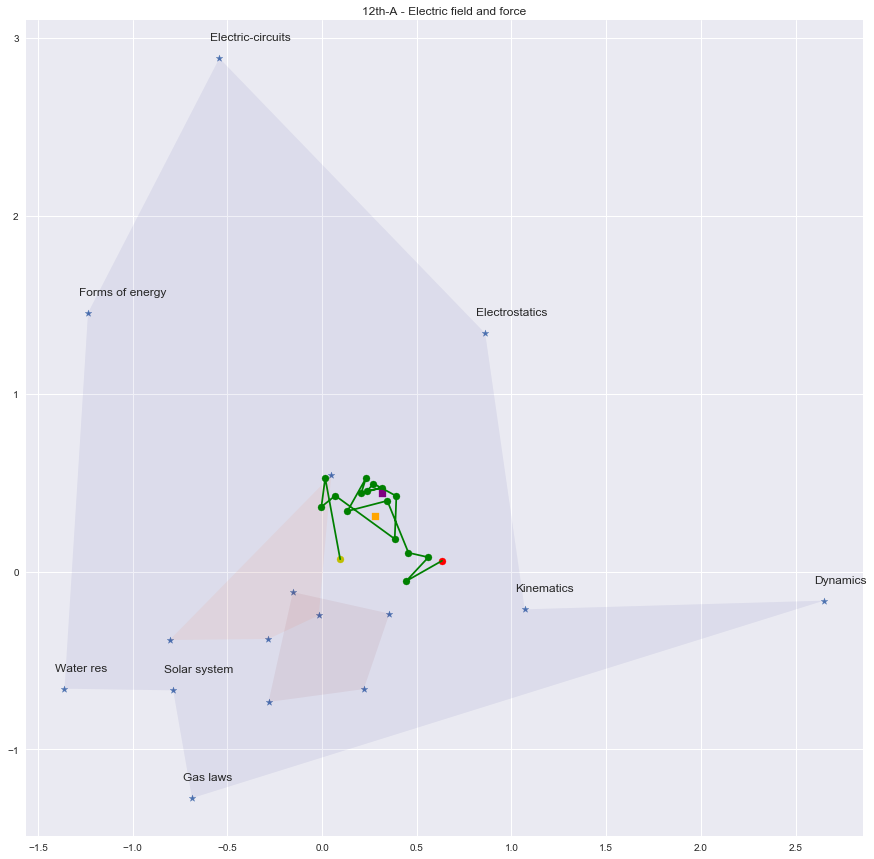

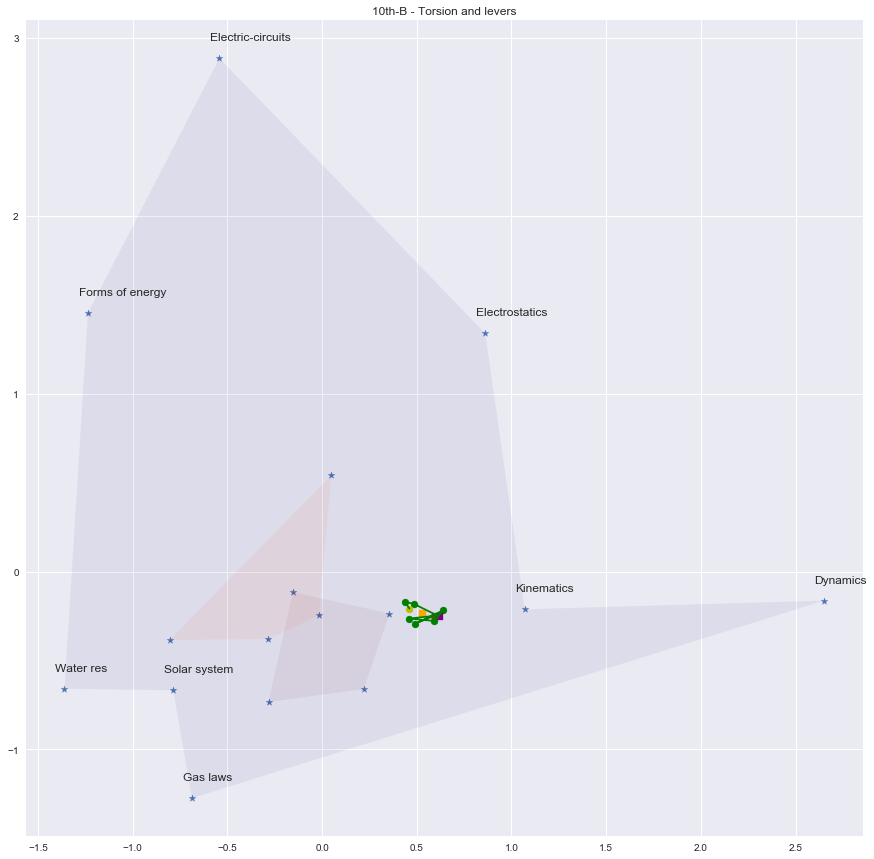

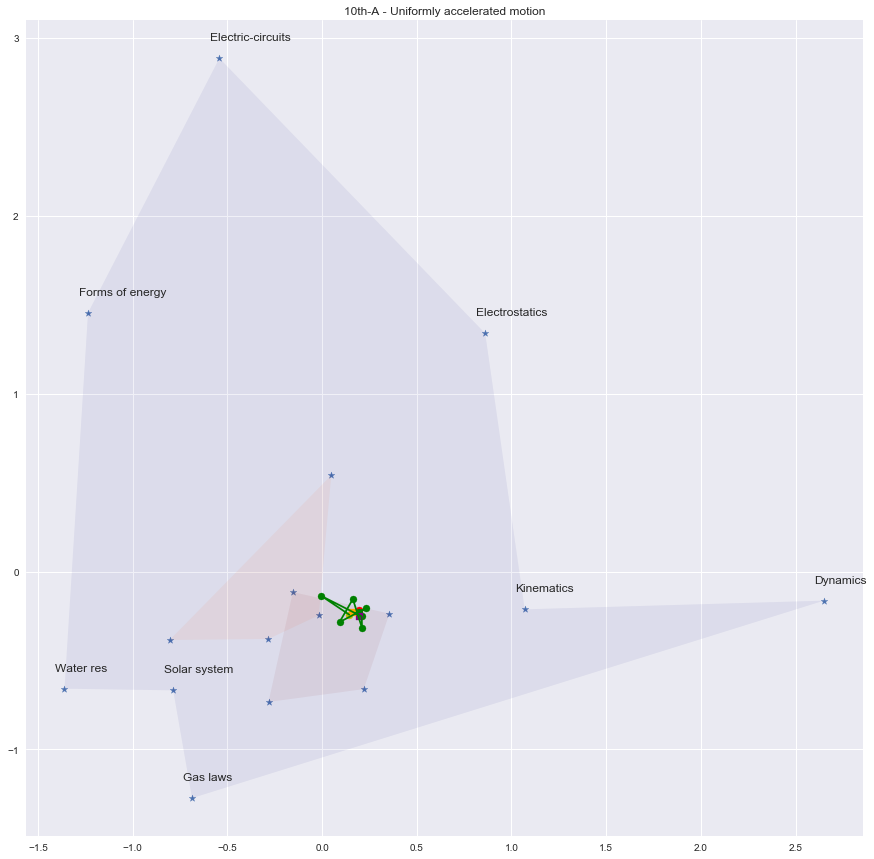

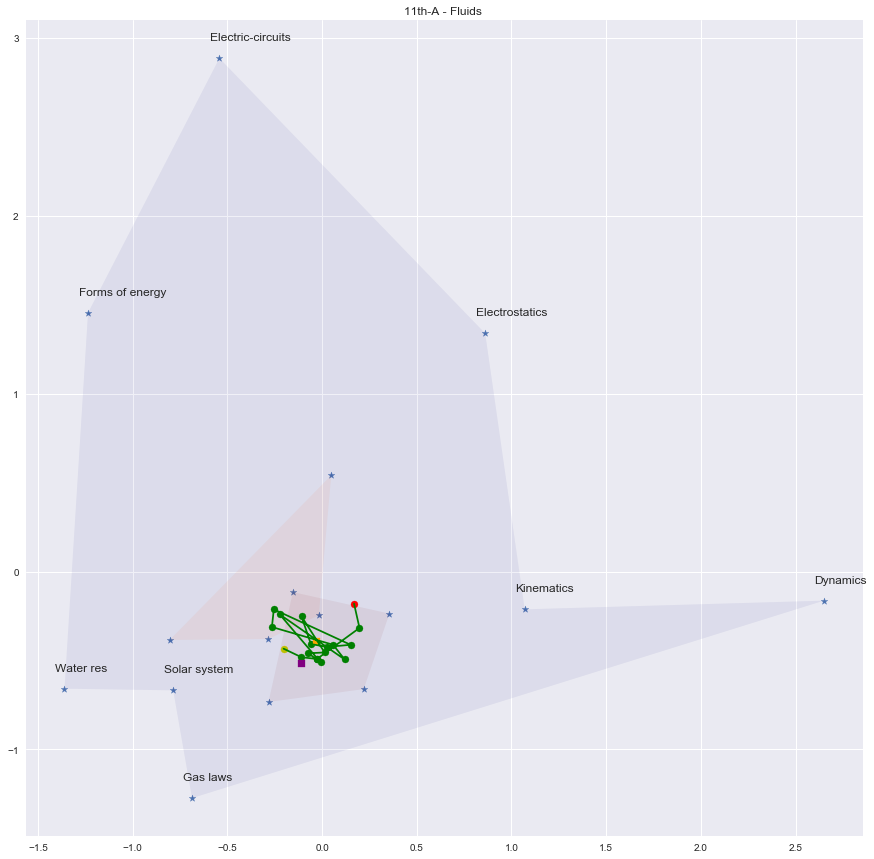

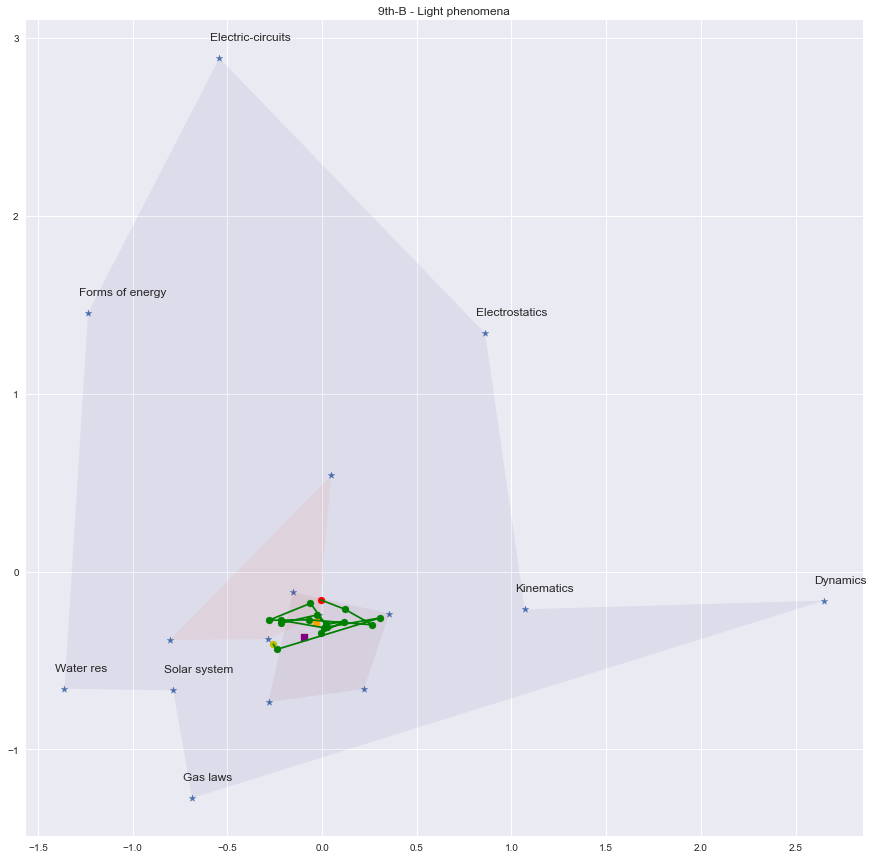

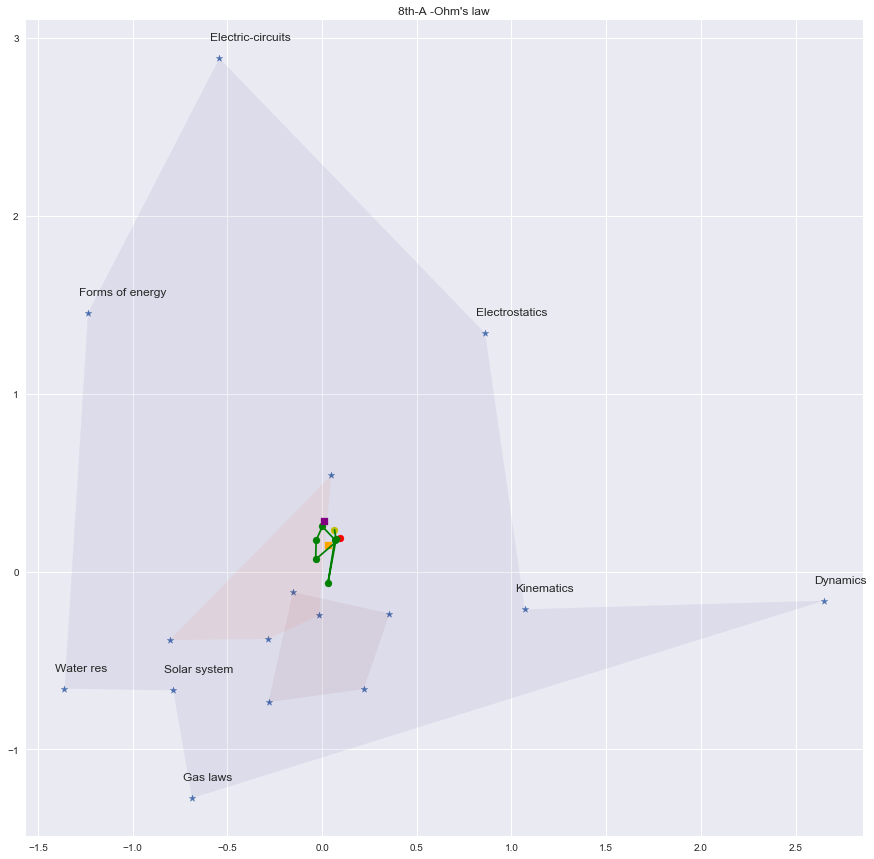

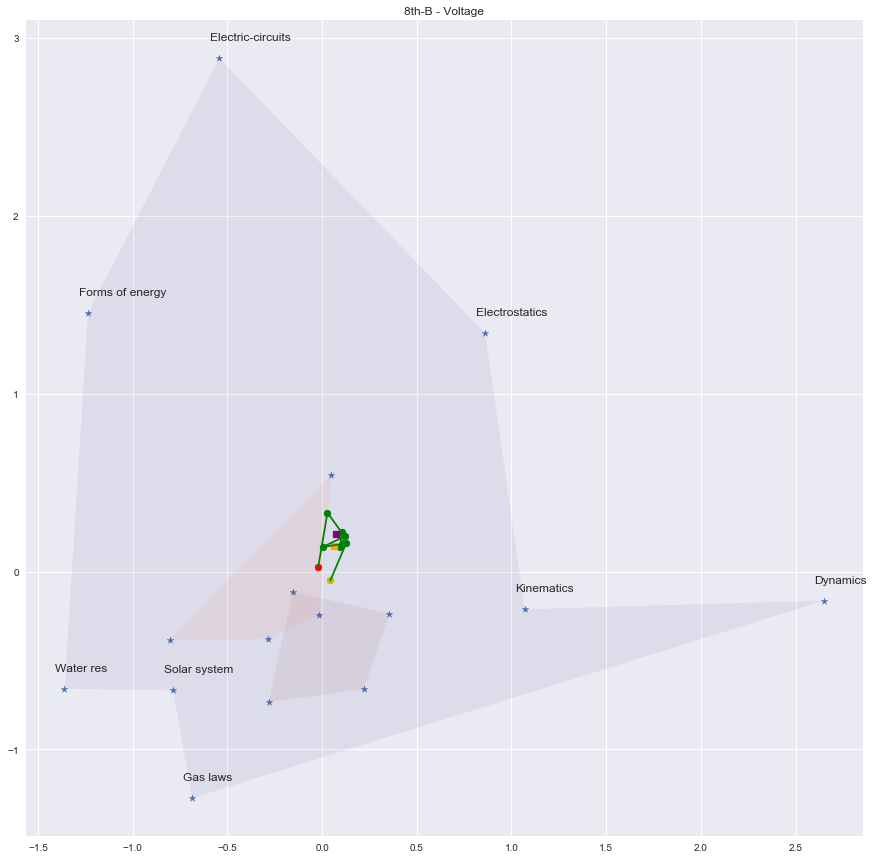

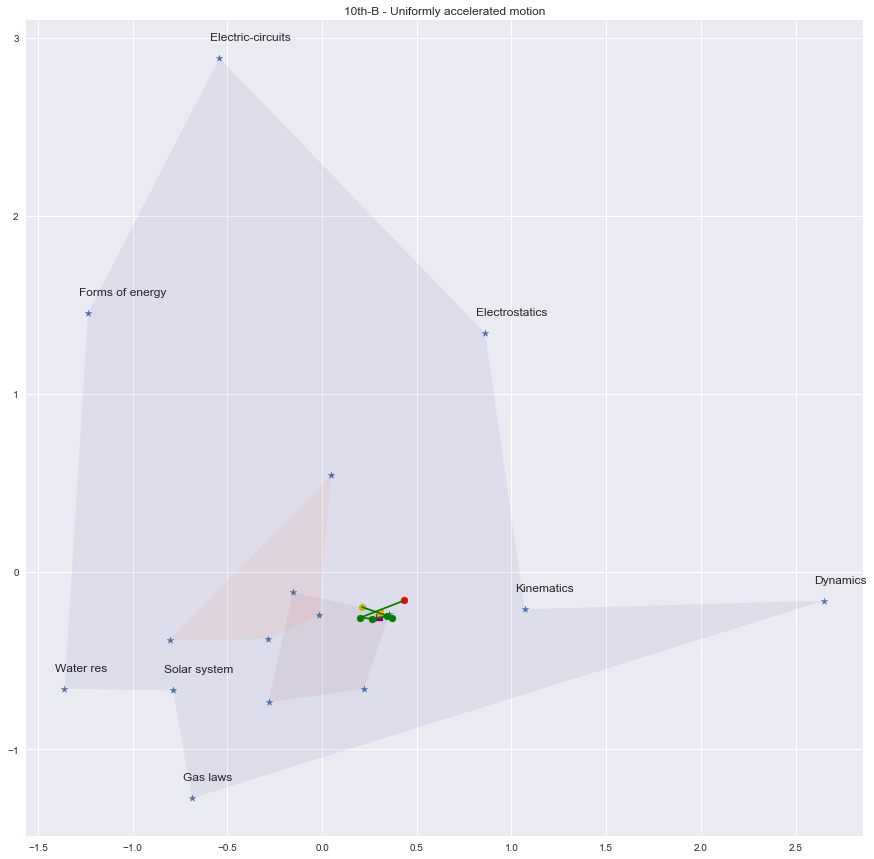

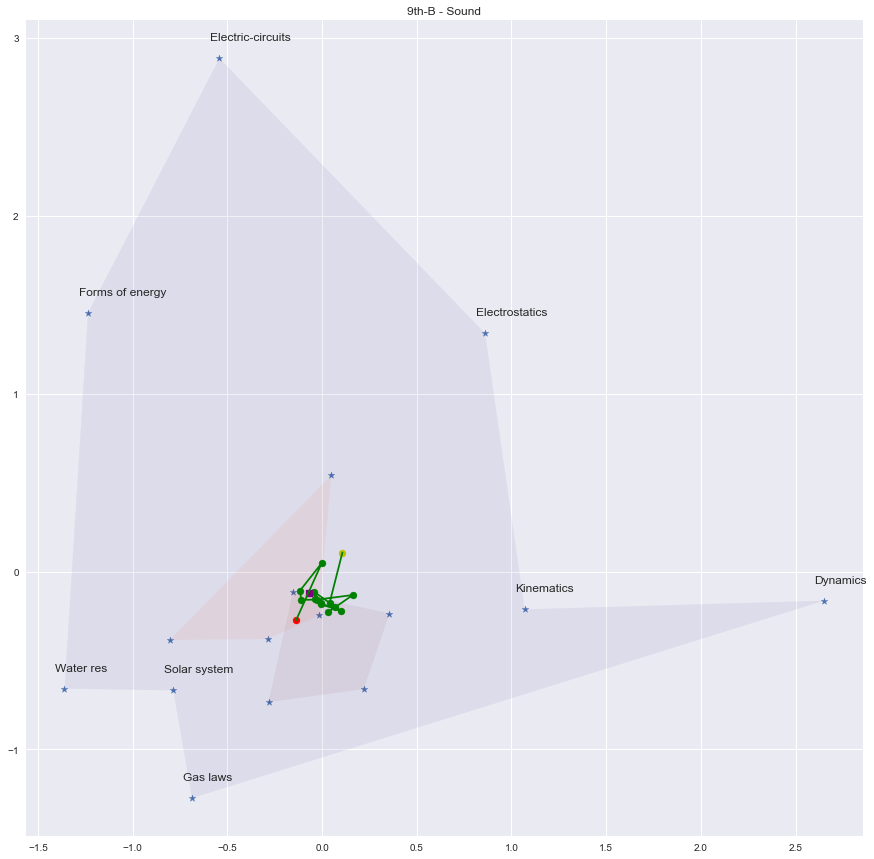

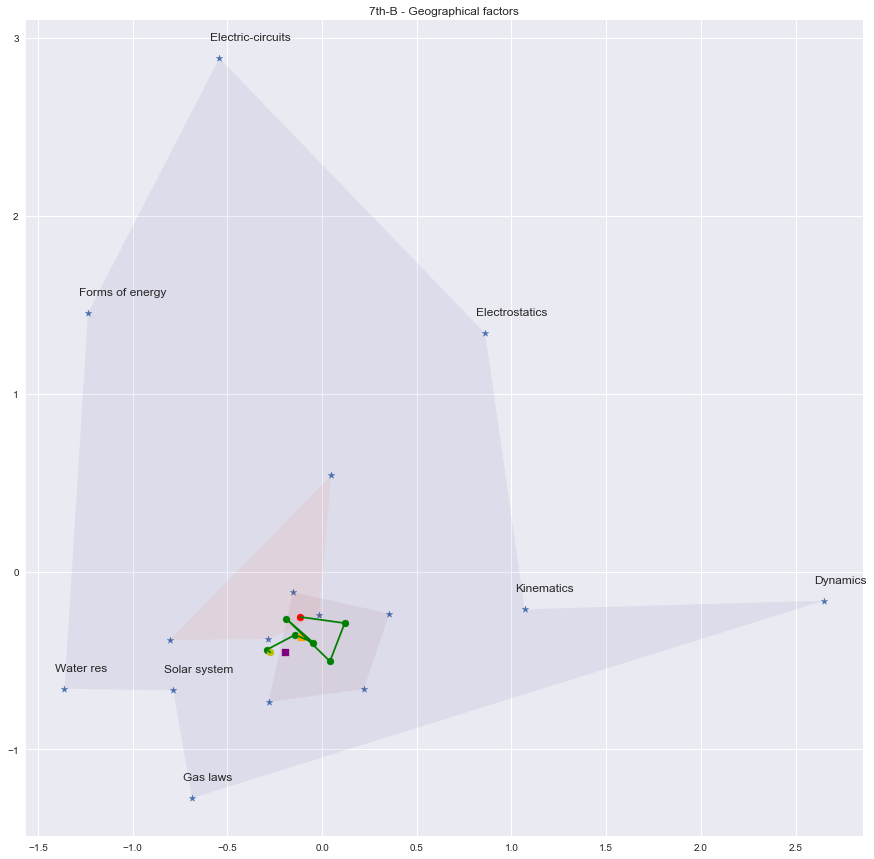

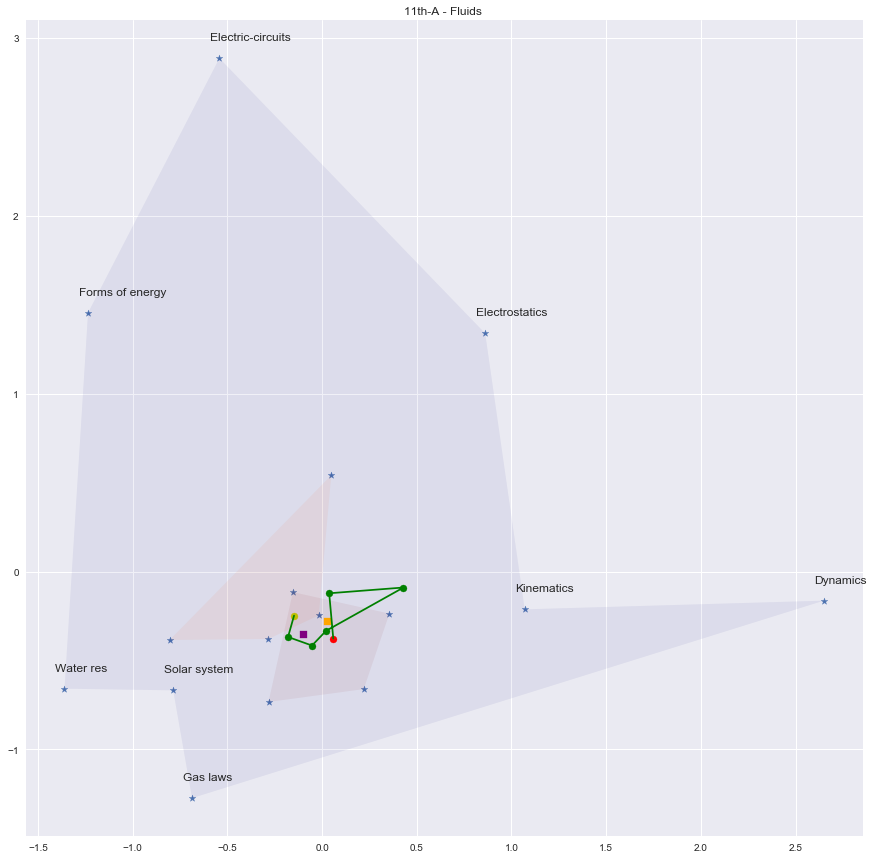

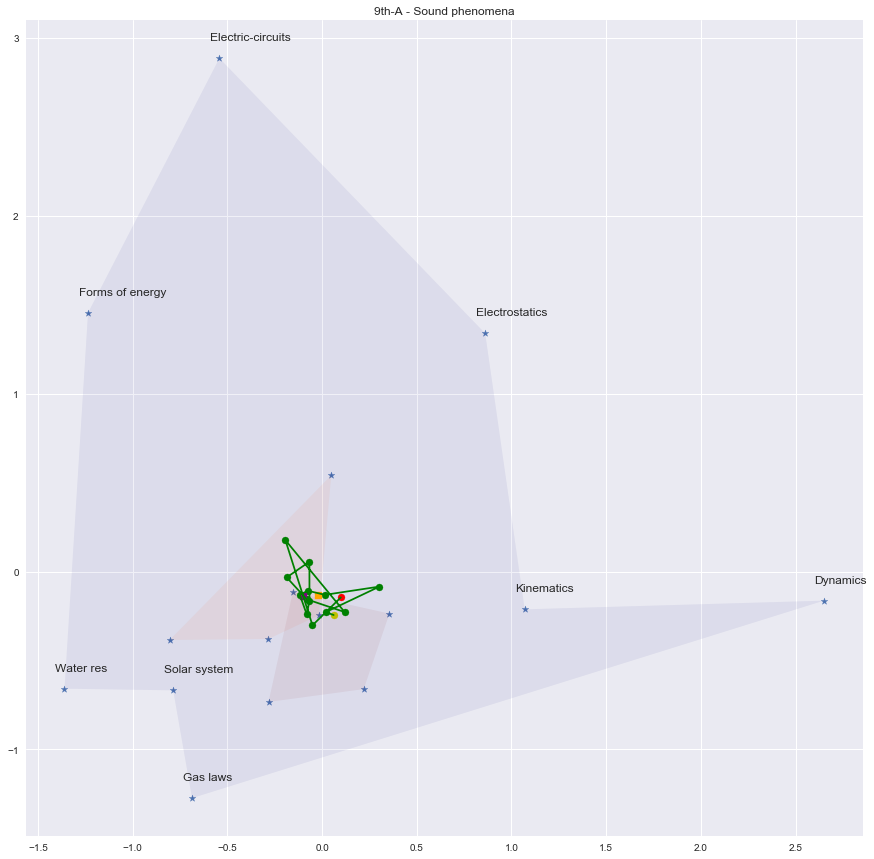

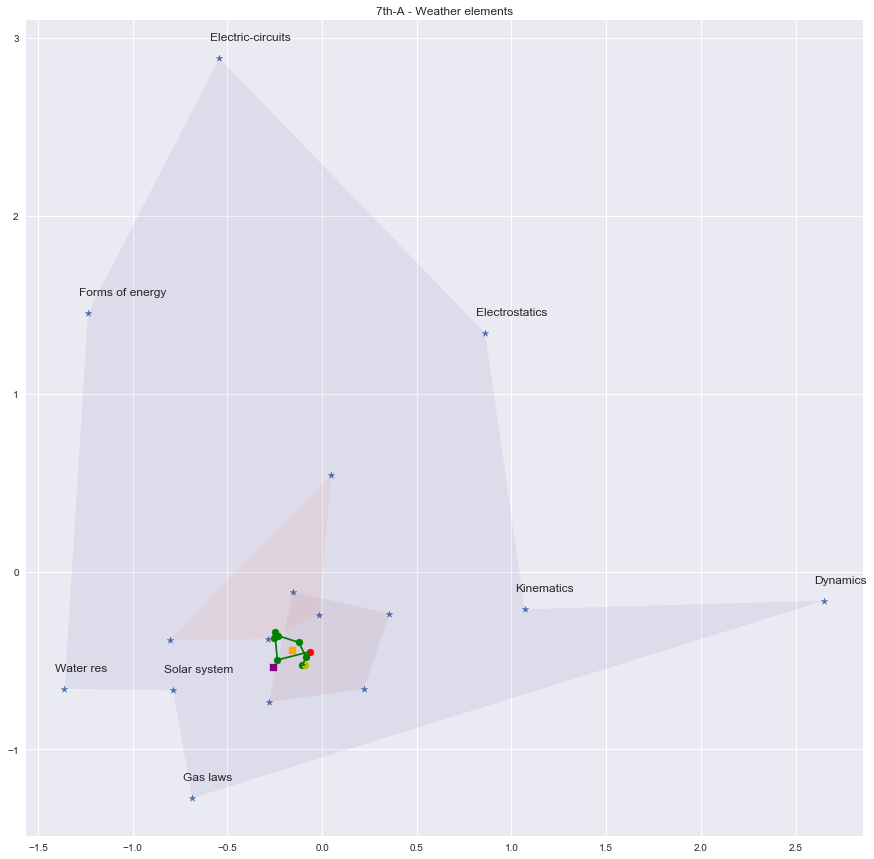

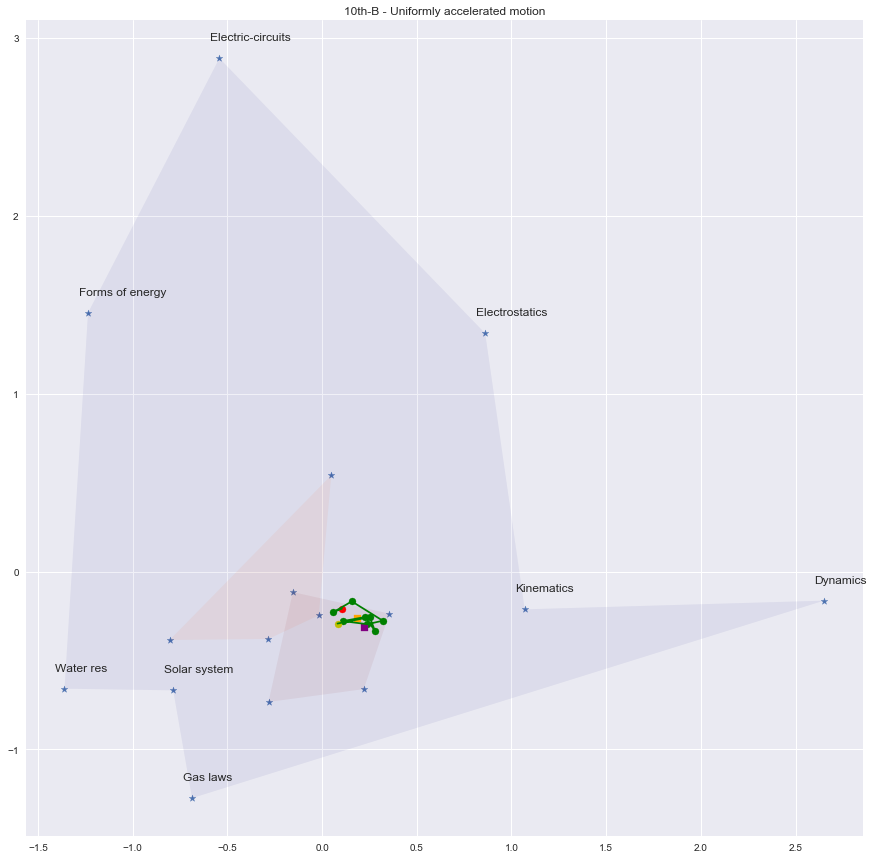

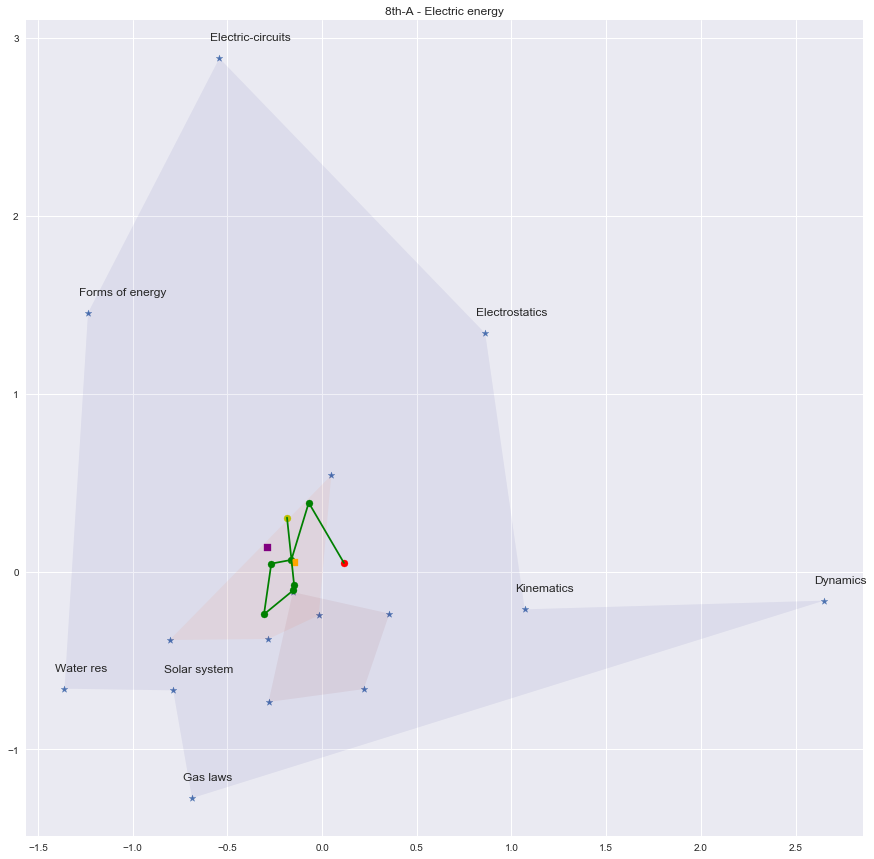

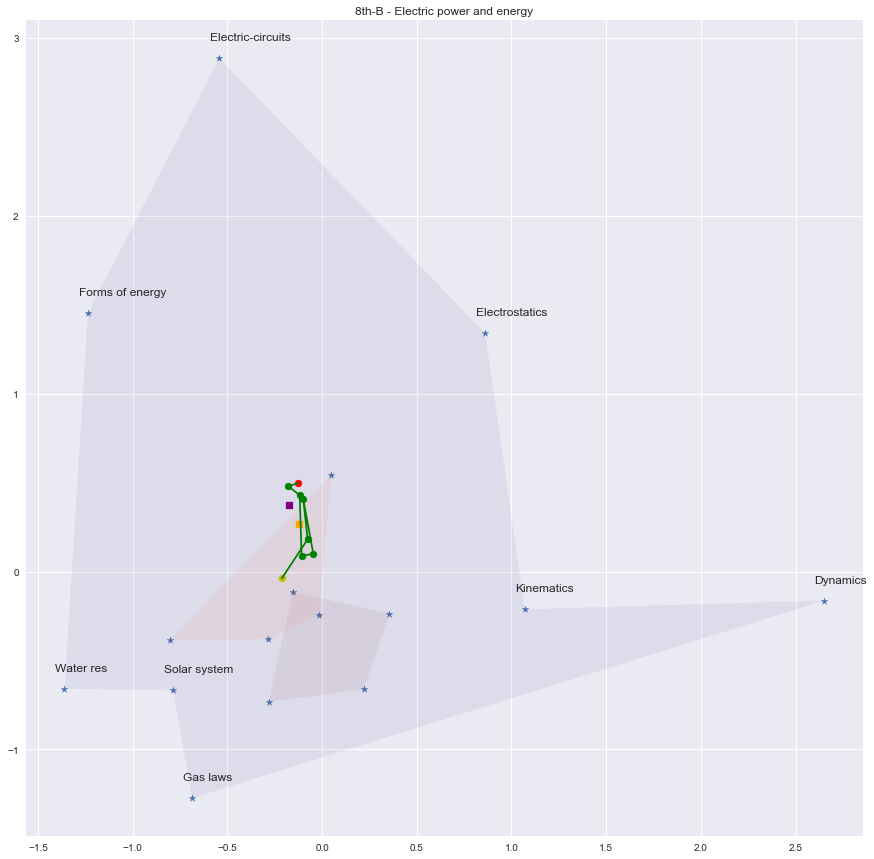

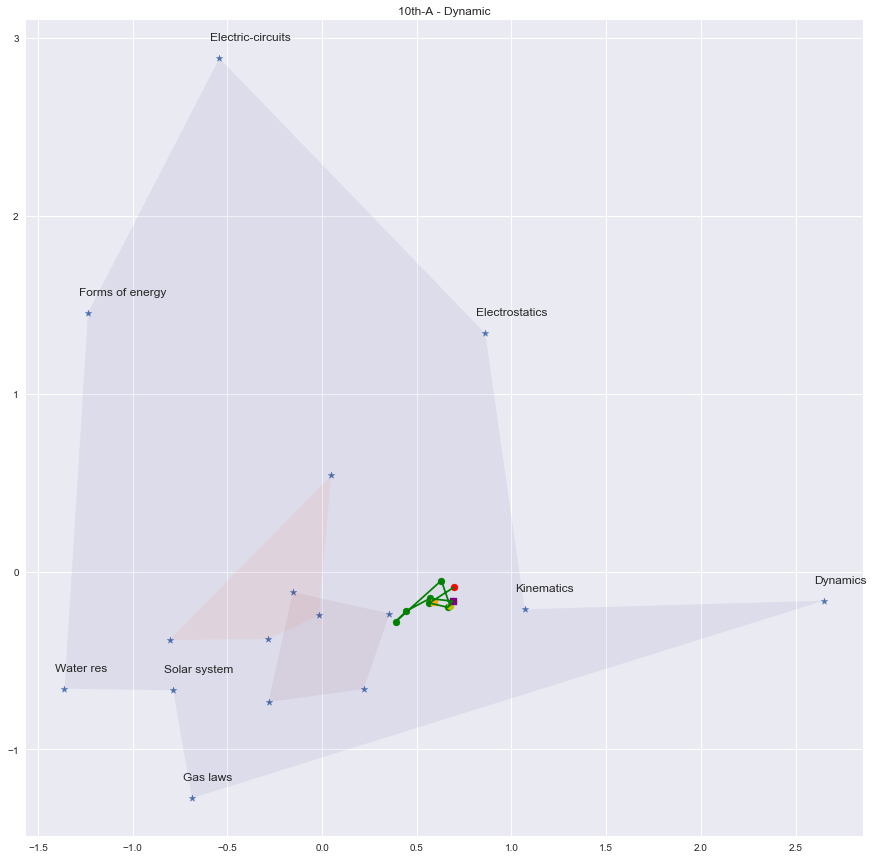

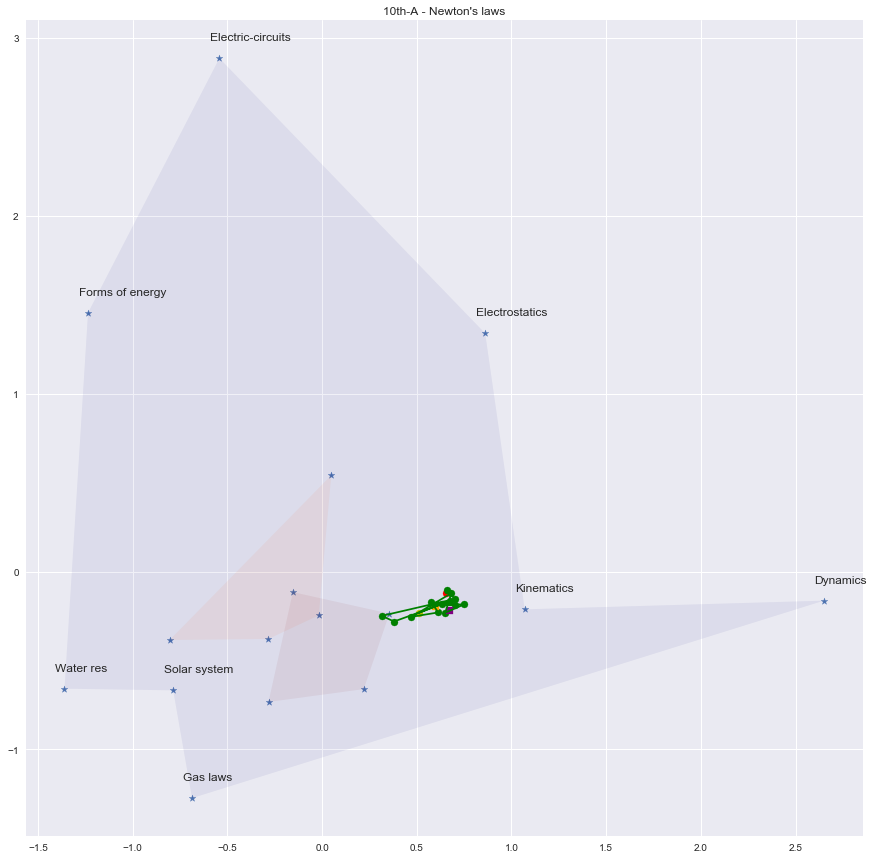

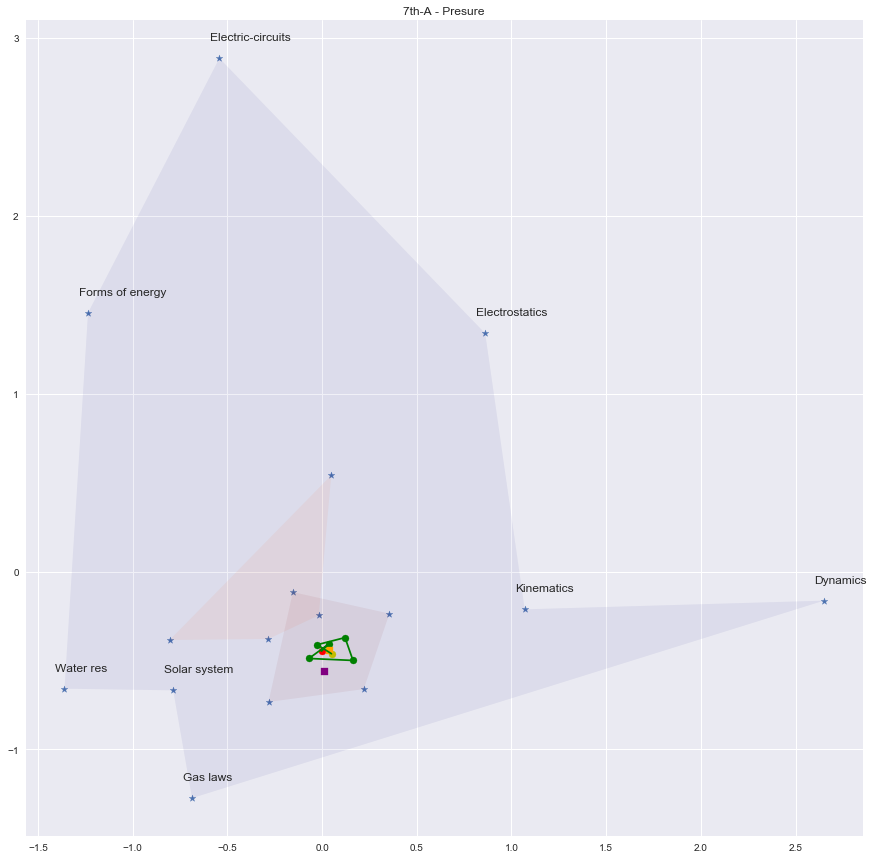

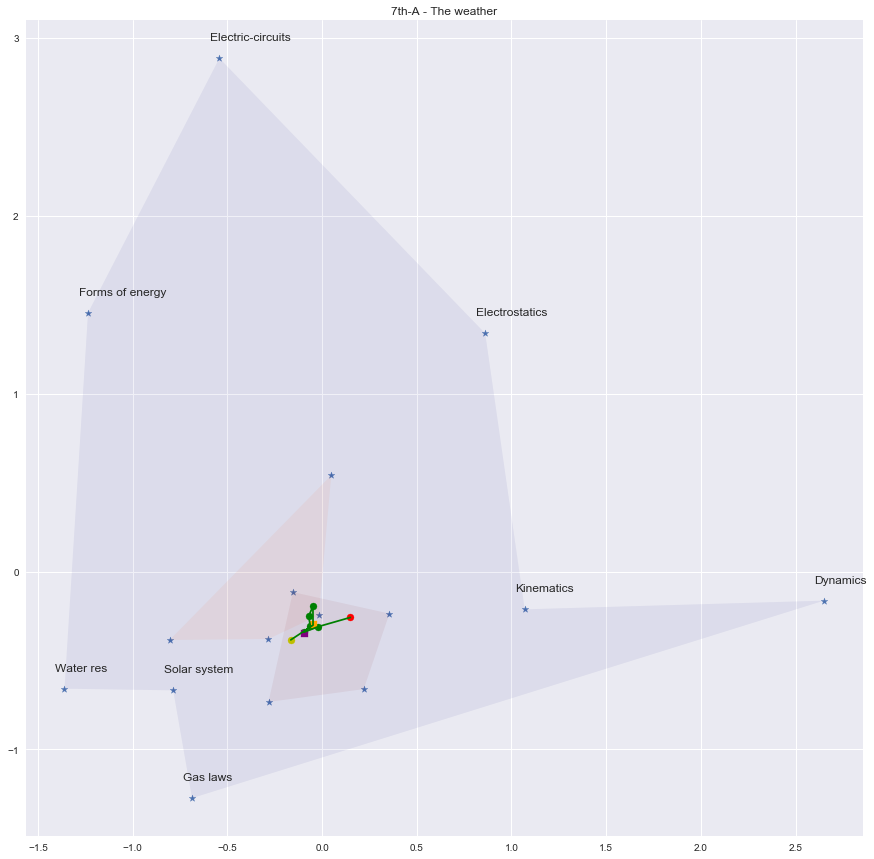

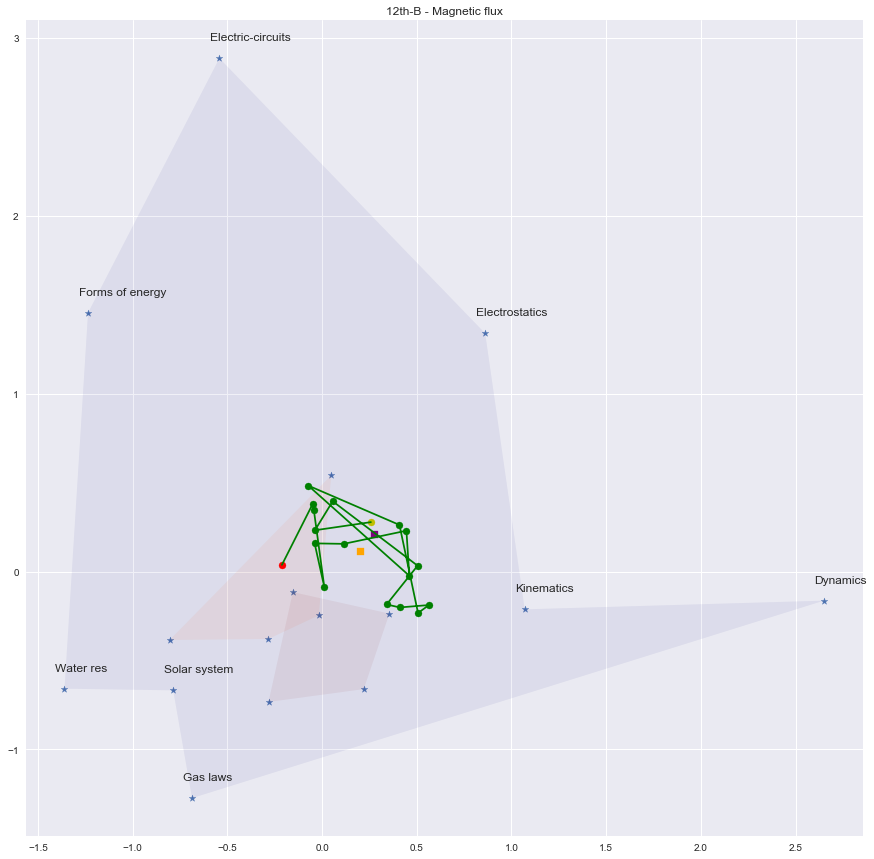

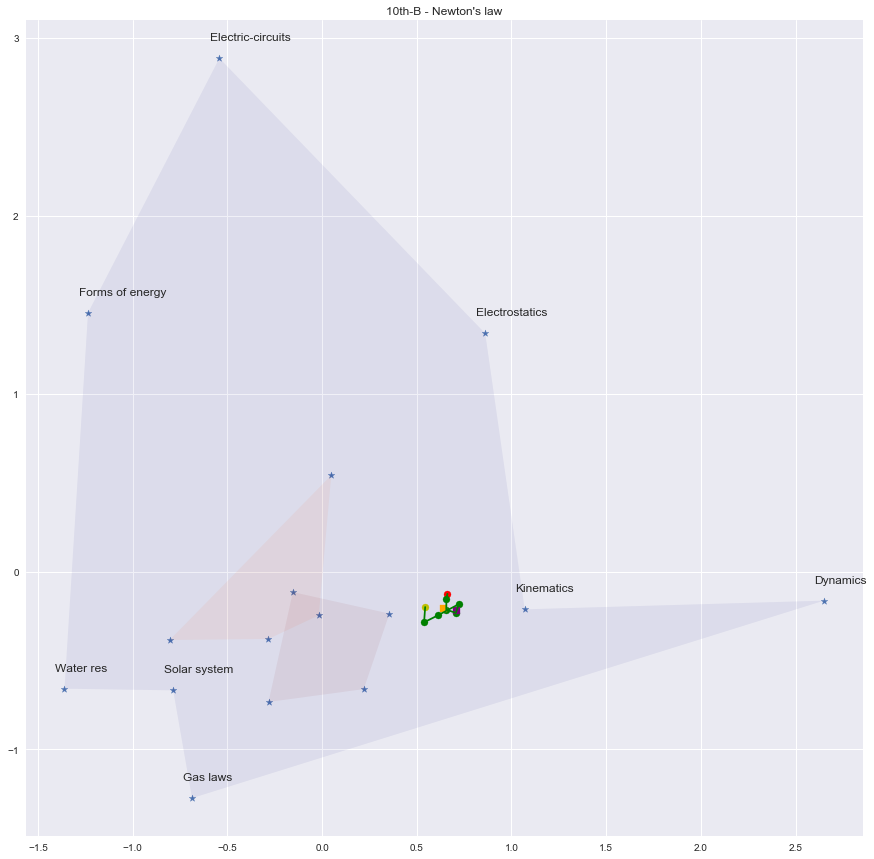

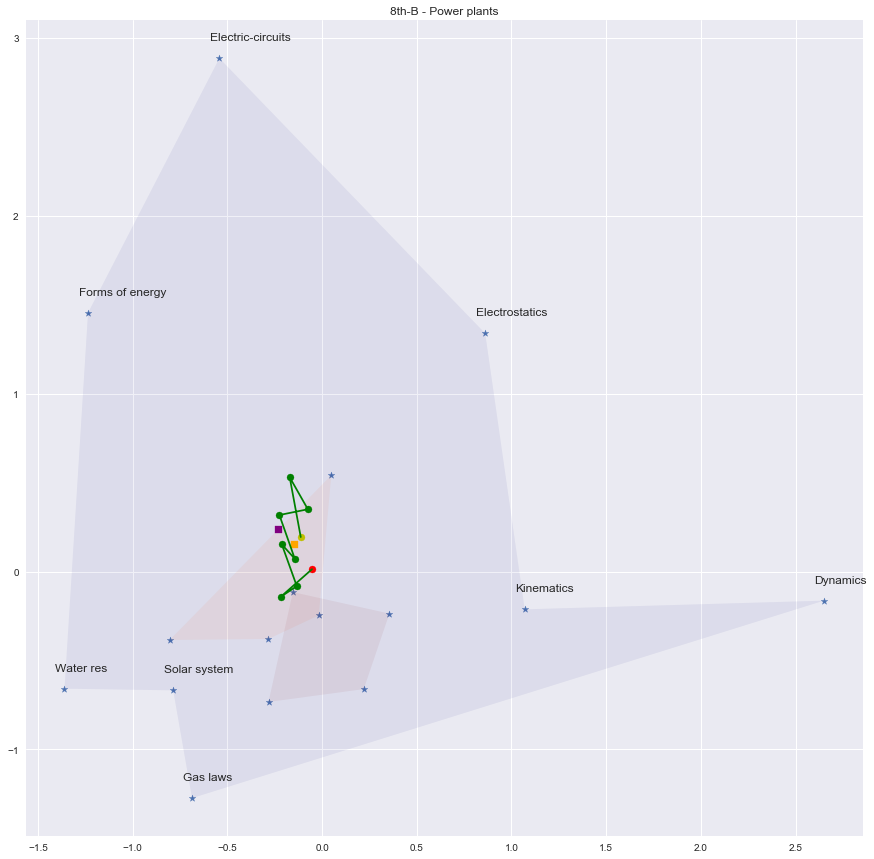

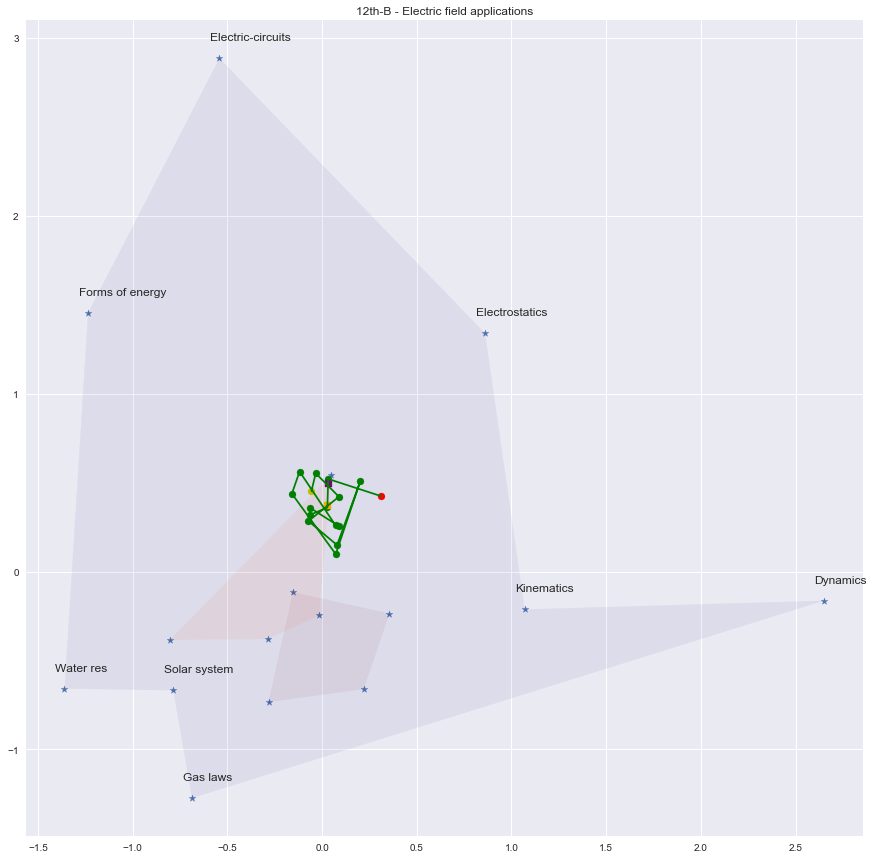

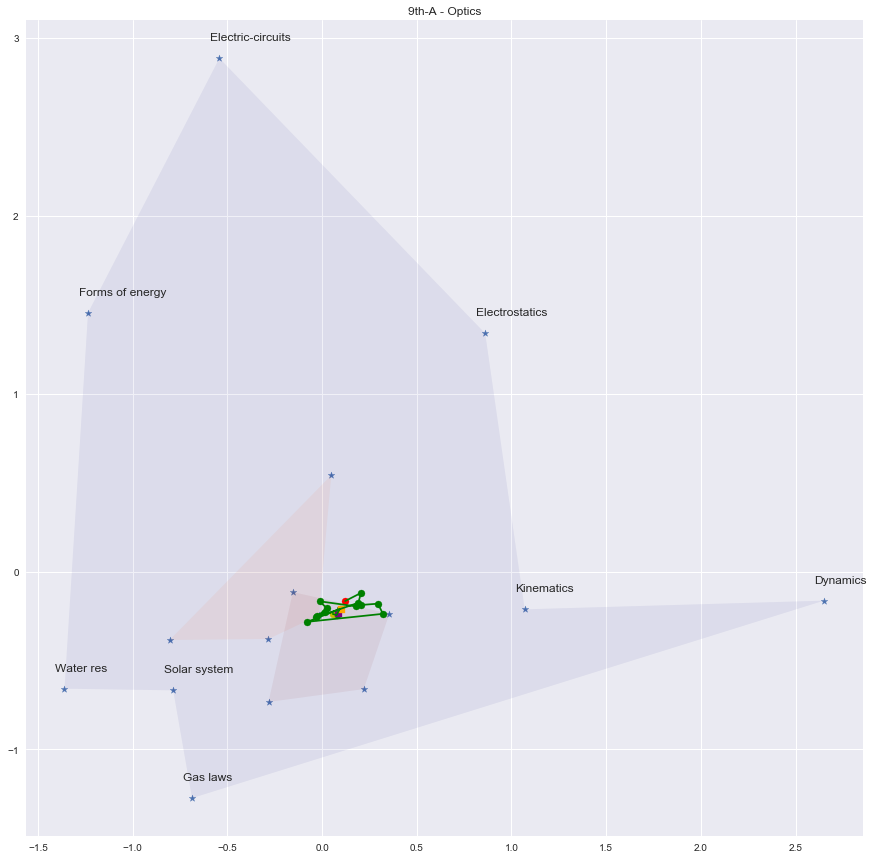

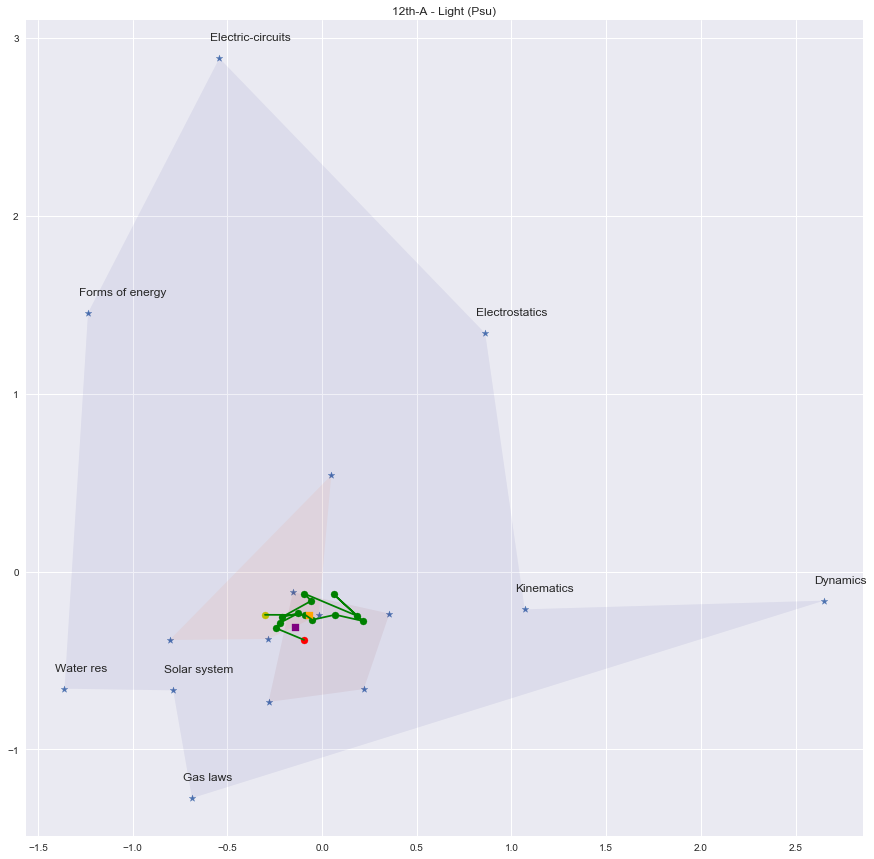

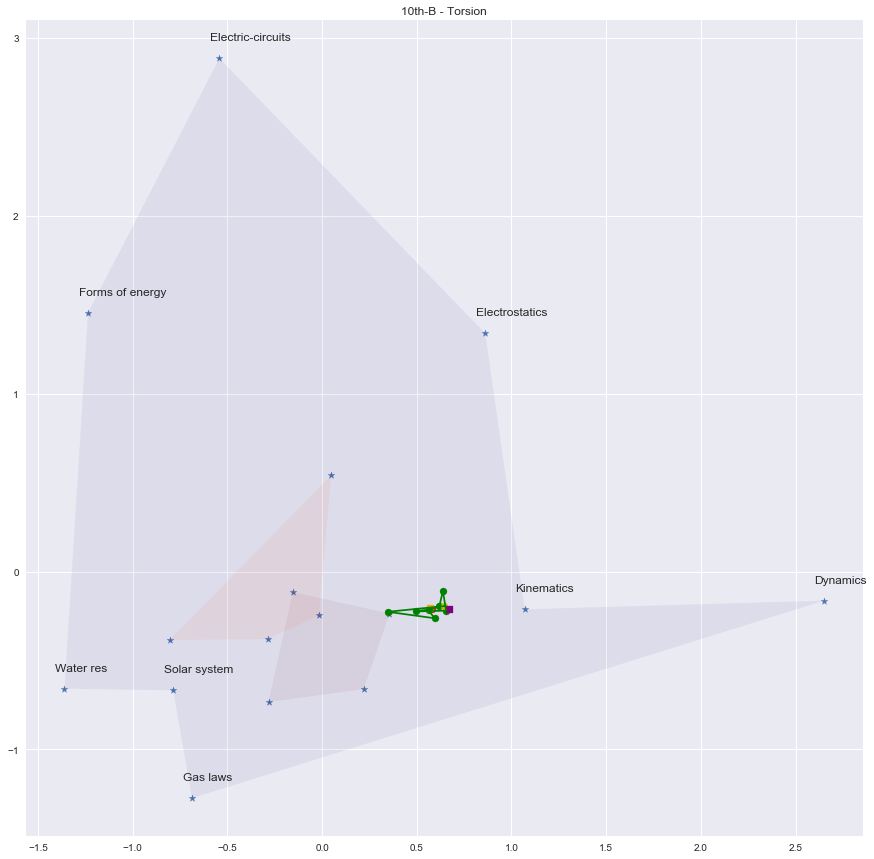

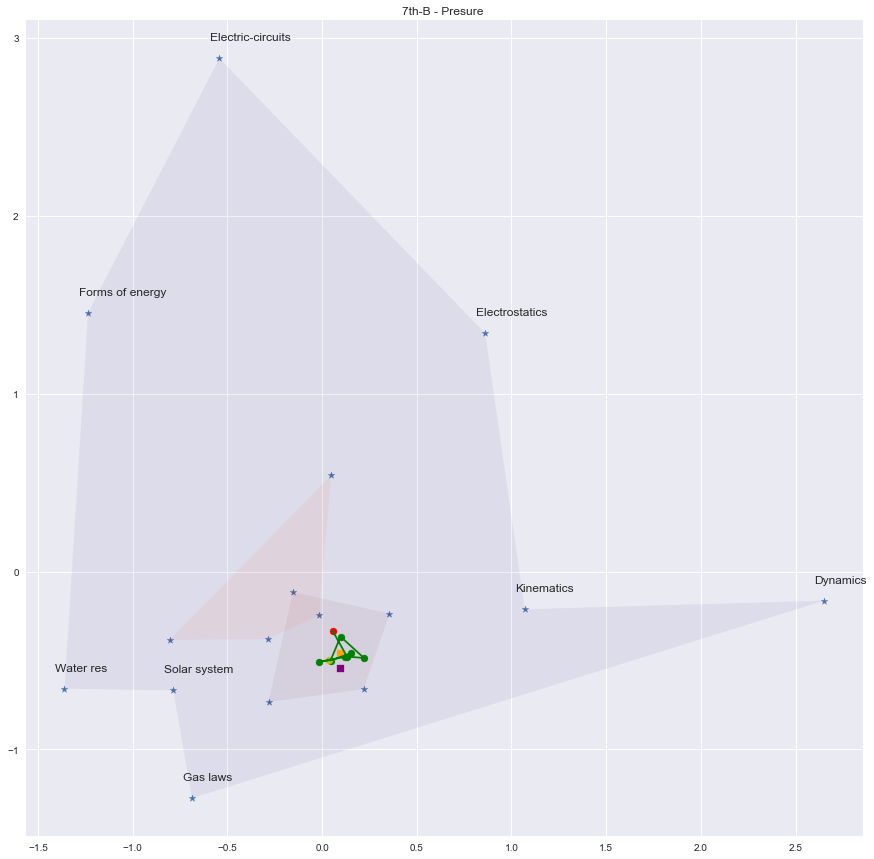

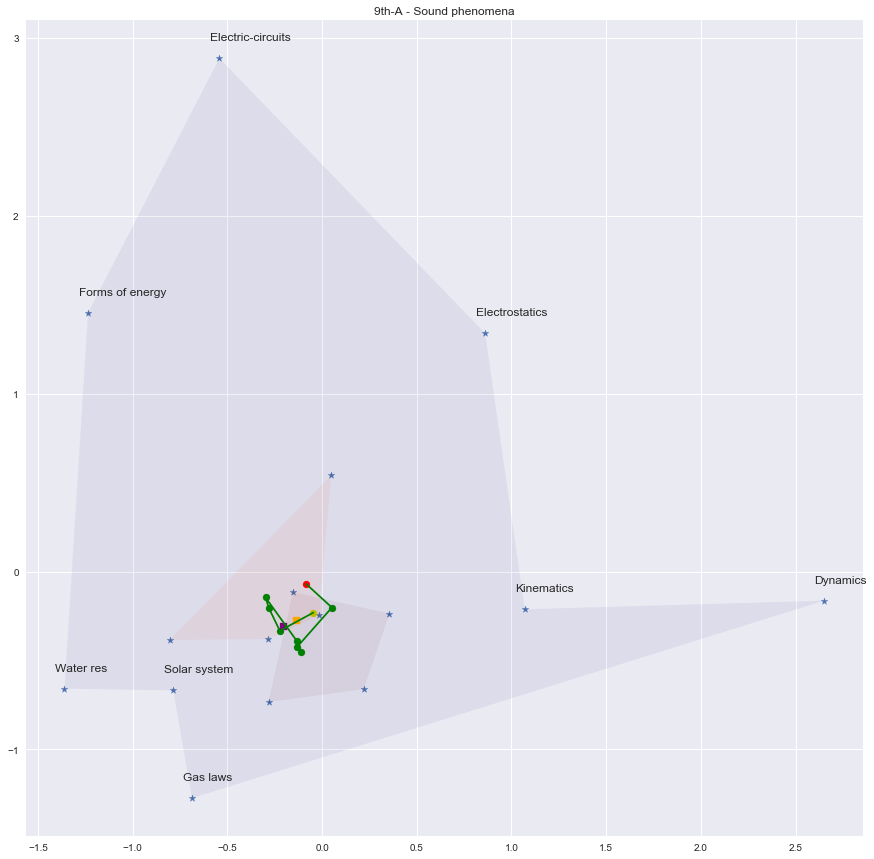

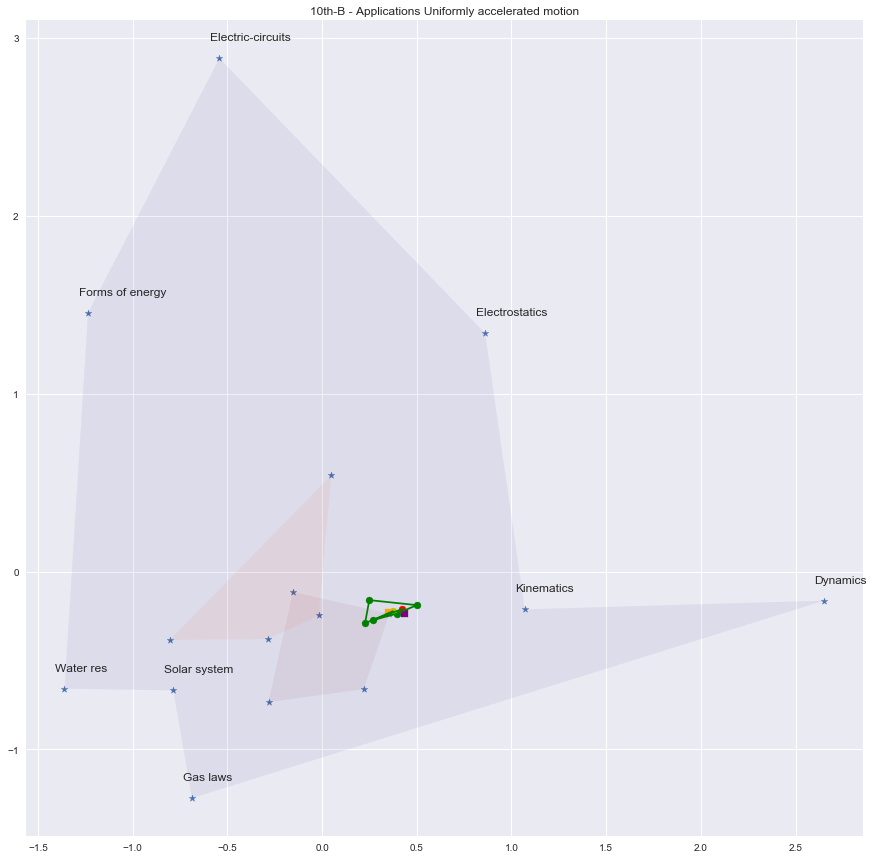

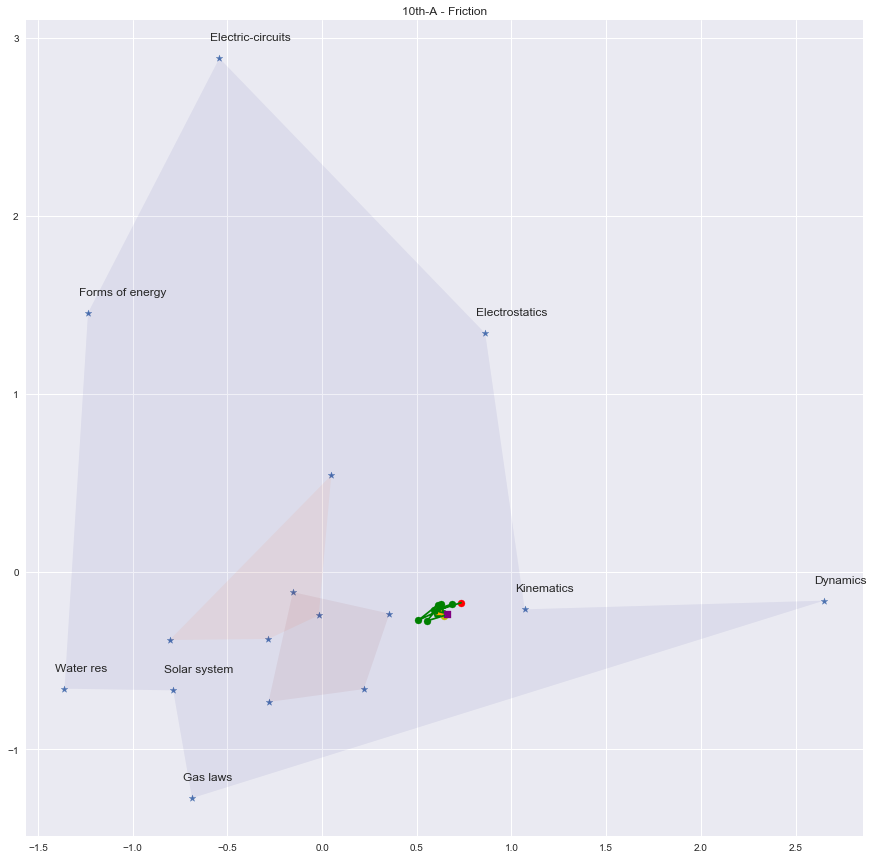

In [111]:
counter = 0
for doc in labels_by_session.keys():
    # draw polygons
    fig, ax = plt.subplots()
    scatt = plt.scatter(T_x,T_y,marker='*')
    tooltips_nodes = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
    mpld3.plugins.connect(plt.gcf(), tooltips_nodes)
    
    polygon_content = Polygon(zip(np.array(T_x)[content_topics],np.array(T_y)[content_topics]),True)
    polygon_skills = Polygon(zip(np.array(T_x)[science_skills_topics],np.array(T_y)[science_skills_topics]),True)
    polygon_arithmetic = Polygon(zip(np.array(T_x)[science_tools_topics],np.array(T_y)[science_tools_topics]),True)
    
    patches = [polygon_content,polygon_skills,polygon_arithmetic]
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.06)
    colors = [ 0.82012597,81.58657731,98.9247411 ]
    p.set_array(np.array(colors))
    ax.add_collection(p)
    for t in content_topics:
        s = selected_topics[t]
        if selected_topics[t].startswith('Water'):
            s = 'Water res'
        ax.annotate(s,xy=(T_x[t],T_y[t]),xytext=(T_x[t]-0.05,T_y[t]+0.1))
    
    # draw xvalues yvalues using labels_array_matrices
    x_by_session = []
    y_by_session = []
    a_tooltips = []
    a_label = ""
    
    for i in range(len(labels_by_session[doc].keys())):
        # construir label_i
        label_i = doc+'_period_'+str(i)
        #value_i = labels_array_matrices.index(label_i)
        a_label = labels_by_session[doc][label_i]
        x_by_session.append(x_values[label_i])
        y_by_session.append(y_values[label_i])
        if i == 0:
            a_color = 'r'
        elif a_label.startswith('end'):
            a_color = 'y'
        else:
            a_color = 'g'
        scatt_ = plt.scatter(x_values[label_i],y_values[label_i],c=a_color)
        a_tooltips.append(mpld3.plugins.PointLabelTooltip(scatt_, labels=[a_label]))

    plt.plot(x_by_session,y_by_session,'g')
    
    for j in range(len(a_tooltips)):
        mpld3.plugins.connect(plt.gcf(), a_tooltips[j])

    # original session
    plt.scatter([session_x[doc]],[session_y[doc]],c='purple',marker='s')
    plt.scatter([session_x_check[doc]],[session_y_check[doc]],c='orange',marker='s')
    

    plt.title(a_label[4:])

    open(os.path.join('output','html2',str(PERIOD_LENGTH)+'m','trajectory_session_'+str(doc)+'_'+a_label[4:]+'_10_minutes.html'), 'w').write(fig_to_d3(fig))
    #fig.savefig(os.path.join('output','svg',str(PERIOD_LENGTH)+'m','trajectory_session_'+str(doc)+'_'+a_label[4:]+'_10_minutes.svg'))
    #mpld3.fig_to_html(fig,'trajectory_seesion_'+str(i)+'.html')

In [112]:
labels_by_session[doc]

{'1496768957735_period_0': 'period_0_10th-A - Friction',
 '1496768957735_period_1': 'period_1_10th-A - Friction',
 '1496768957735_period_10': 'end_10th-A - Friction',
 '1496768957735_period_2': 'period_2_10th-A - Friction',
 '1496768957735_period_3': 'period_3_10th-A - Friction',
 '1496768957735_period_4': 'period_4_10th-A - Friction',
 '1496768957735_period_5': 'period_5_10th-A - Friction',
 '1496768957735_period_6': 'period_6_10th-A - Friction',
 '1496768957735_period_7': 'period_7_10th-A - Friction',
 '1496768957735_period_8': 'period_8_10th-A - Friction',
 '1496768957735_period_9': 'period_9_10th-A - Friction'}

In [609]:
%pylab inline
pylab.rcParams['figure.figsize'] = (6, 6)

Populating the interactive namespace from numpy and matplotlib


C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['title', 'grid']
`%matplotlib` prevents importing * from pylab and numpy



In [ ]:
10th-B - mrua y mrur

In [129]:
co_ocurrence_vectors['1493128754967']

NameError: name 'co_ocurrence_vectors' is not defined

In [299]:
labels_by_session[doc]

{'1496173972733_period_0': u'period_0_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_1': u'period_1_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_10': u'period_10_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_11': u'period_11_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_12': u'period_12_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_13': u'period_13_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_14': u'period_14_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_15': u'period_15_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_16': u'period_16_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_17': u'period_17_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_18': u'period_18_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_19': u'period_19_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_2': u'period_2_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_20': u'p

In [147]:
un_label = '1493128754967_period_3'
df = pd.DataFrame(co_ocurrence_matrices[un_label])
df.columns = selected_topics
df.index = selected_topics
df.to_csv('co_occurrence_matrix_'+un_label+'.csv')
df

Kinematics   Observe  Time units  Gas laws  \
Kinematics           3.187700  2.138214    2.702745       0.0   
Observe              2.138214  2.907200    1.940966       0.0   
Time units           2.702745  1.940966    3.490600       0.0   
Gas laws             0.000000  0.000000    0.000000       0.0   
Electric-circuits    0.000000  0.000000    0.000000       0.0   
Explain              0.824670  0.287376    1.268753       0.0   
Solar system         0.736001  0.381653    0.655110       0.0   
Electrostatics       0.223620  0.106117    0.281008       0.0   
Compute              1.121253  0.787882    1.113898       0.0   
Excercise            0.585201  0.271983    0.578070       0.0   
Forms of energy      0.482411  0.312326    0.386709       0.0   
Numbers              1.941274  0.806488    2.323222       0.0   
Enquire              1.703398  1.302462    2.243985       0.0   
Water resources      0.000000  0.000000    0.000000       0.0   
Order                0.111999  0.204516    0.113492       0.0   
Dynamics             0.203510  0.147148    0.119879       0.0   

                   Electric-circuits   Explain  Solar system  Electrostatics  \
Kinematics                       0.0  0.824670      0.736001        0.223620   
Observe                          0.0  0.287376      0.381653        0.106117   
Time units                       0.0  1.268753      0.655110        0.281008   
Gas laws                         0.0  0.000000      0.000000        0.000000   
Electric-circuits                0.0  0.000000      0.000000        0.000000   
Explain                          0.0  1.827700      0.396935        0.165519   
Solar system                     0.0  0.396935      1.020000        0.000000   
Electrostatics                   0.0  0.165519      0.000000        0.550500   
Compute                          0.0  0.616420      0.285601        0.095692   
Excercise                        0.0  0.674245      0.060150        0.000000   
Forms of energy                  0.0  0.257159      0.402909        0.026181   
Numbers                          0.0  1.784436      0.524159        1.102377   
Enquire                          0.0  1.518775      0.590908        0.375573   
Water resources                  0.0  0.000000      0.000000        0.000000   
Order                            0.0  0.000000      0.000000        0.000000   
Dynamics                         0.0  0.144936      0.000000        0.071493   

                    Compute  Excercise  Forms of energy   Numbers   Enquire  \
Kinematics         1.121253   0.585201         0.482411  1.941274  1.703398   
Observe            0.787882   0.271983         0.312326  0.806488  1.302462   
Time units         1.113898   0.578070         0.386709  2.323222  2.243985   
Gas laws           0.000000   0.000000         0.000000  0.000000  0.000000   
Electric-circuits  0.000000   0.000000         0.000000  0.000000  0.000000   
Explain            0.616420   0.674245         0.257159  1.784436  1.518775   
Solar system       0.285601   0.060150         0.402909  0.524159  0.590908   
Electrostatics     0.095692   0.000000         0.026181  1.102377  0.375573   
Compute            0.908000   0.585315         0.268804  0.625785  1.184032   
Excercise          0.585315   1.053500         0.237930  0.695692  0.385931   
Forms of energy    0.268804   0.237930         0.314500  0.355487  0.352382   
Numbers            0.625785   0.695692         0.355487  5.050000  1.407738   
Enquire            1.184032   0.385931         0.352382  1.407738  4.227300   
Water resources    0.000000   0.000000         0.000000  0.000000  0.000000   
Order              0.022983   0.000000         0.000000  0.044256  0.126710   
Dynamics           0.209078   0.350197         0.270323  0.351069  0.132019   

                   Water resources     Order  Dynamics  
Kinematics                     0.0  0.111999  0.203510  
Observe                        0.0  0.204516  0.147148  
Time units                     0.0  0

In [148]:
df = pd.DataFrame(co_ocurrence_matrices_all_corpus['1493128754967'])
df.columns = selected_topics
df.index = selected_topics
df.to_csv('co_occurrence_matrix_1493128754967.csv')
df

Kinematics   Observe  Time units  Gas laws  \
Kinematics          14.083200  6.322482   11.645365  0.174691   
Observe              6.322482  8.629500    7.081923  0.302429   
Time units          11.645365  7.081923   14.463800  0.258679   
Gas laws             0.174691  0.302429    0.258679  0.087500   
Electric-circuits    0.000000  0.000000    0.000000  0.000000   
Explain              3.173345  2.001614    4.034899  0.045176   
Solar system         1.682414  0.803278    1.257000  0.000000   
Electrostatics       2.118574  1.304071    1.812037  0.000000   
Compute              5.204041  2.124000    4.599431  0.053979   
Excercise            2.195762  0.478711    1.806929  0.032485   
Forms of energy      2.439078  0.945017    1.902269  0.044272   
Numbers              8.495665  3.293461    7.768874  0.027368   
Enquire              4.968614  3.064267    5.182581  0.000000   
Water resources      0.079300  0.000000    0.069902  0.000000   
Order                4.357474  2.146680    4.215290  0.020706   
Dynamics             3.671093  1.605647    3.050544  0.120897   

                   Electric-circuits   Explain  Solar system  Electrostatics  \
Kinematics                       0.0  3.173345      1.682414        2.118574   
Observe                          0.0  2.001614      0.803278        1.304071   
Time units                       0.0  4.034899      1.257000        1.812037   
Gas laws                         0.0  0.045176      0.000000        0.000000   
Electric-circuits                0.0  0.000000      0.000000        0.000000   
Explain                          0.0  3.940400      0.608173        0.885916   
Solar system                     0.0  0.608173      2.525000        0.246042   
Electrostatics                   0.0  0.885916      0.246042        3.084500   
Compute                          0.0  2.154513      0.919223        1.236717   
Excercise                        0.0  1.611977      0.421951        0.601443   
Forms of energy                  0.0  0.880040      1.062731        0.400402   
Numbers                          0.0  4.045277      1.460559        3.141765   
Enquire                          0.0  3.273775      1.149803        1.005471   
Water resources                  0.0  0.000000      0.000000        0.000000   
Order                            0.0  1.298042      0.000000        0.699165   
Dynamics                         0.0  1.261106      0.082271        1.134989   

                    Compute  Excercise  Forms of energy    Numbers   Enquire  \
Kinematics         5.204041   2.195762         2.439078   8.495665  4.968614   
Observe            2.124000   0.478711         0.945017   3.293461  3.064267   
Time units         4.599431   1.806929         1.902269   7.768874  5.182581   
Gas laws           0.053979   0.032485         0.044272   0.027368  0.000000   
Electric-circuits  0.000000   0.000000         0.000000   0.000000  0.000000   
Explain            2.154513   1.611977         0.880040   4.045277  3.273775   
Solar system       0.919223   0.421951         1.062731   1.460559  1.149803   
Electrostatics     1.236717   0.601443         0.400402   3.141765  1.005471   
Compute            5.761800   2.247224         1.435950   4.605164  3.307715   
Excercise          2.247224   3.130500         1.009148   2.413864  1.147283   
Forms of energy    1.435950   1.009148         1.513200   1.534297  1.224435   
Numbers            4.605164   2.413864         1.534297  15.098000  3.313610   
Enquire            3.307715   1.147283         1.224435   3.313610  9.432300   
Water resources    0.099947   0.063357         0.044800   0.000000  0.000000   
Order              2.933056   1.314554         0.825664   3.033855  1.842006   
Dynamics           1.662393   1.116796         2.020585   1.982099  1.350866   

                   Water resources     Order  Dynamics  
Kinematics                0.079300  4.357474  3.671093  
Observe                   0.000000  2.146680  1.605647  
Time units          

In [85]:
mpld3.fig_to_html?

In [ ]:
GET THE CORRECT LABELS FOR FILTERED SESSIONS
energy_CHECKTHIS = [20,14,15,54,26,42,41,46]
kinematics = [27,38,44,2,32,12,52]
electrodinamics = []
circuits = [31,30,22,0,48]
electrostatic = [45,3,25,17]
optics = [29,8,13,4,18,10,23,6,29]
sound = [51,36,33]
fluids = [28,53,43,50]

In [ ]:
## just init cinematica

In [ ]:
## just end cinematica

In [ ]:
## graph comparison

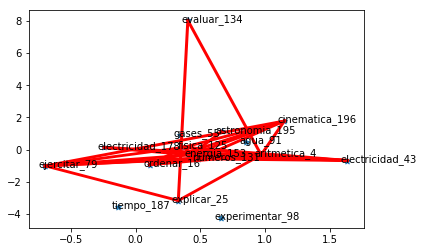

In [315]:
#viz.scatter_plot_by_grade_by_cluster(x_values,y_values,labels_clusters,'X','Y',names_docs,document_labels)
scatt = plt.scatter(T_x,T_y,marker='*')
tooltips = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
for i in range(n_topics):
    plt.annotate(selected_topics[i],xy=(T_x[i],T_y[i]),xytext=(T_x[i]-0.05,T_y[i]-0.05))
    for j in range(n_topics):
        if i>j:
            if co_occurrence_matrix[i,j] > 250:
                plt.plot([T_x[i],T_x[j]],[T_y[i],T_y[j]],c='r',linewidth=np.log(co_occurrence_matrix[i,j])/2)
scatt_cm = plt.scatter(CM_sesion_x,CM_sesion_y,marker='o')
scatt_session = plt.scatter(x_values,y_values,marker='v')
#scatt = plt.scatter(T_x,T_y,marker='*',c='b')

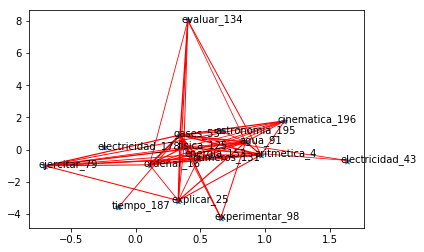

In [316]:
#viz.scatter_plot_by_grade_by_cluster(x_values,y_values,labels_clusters,'X','Y',names_docs,document_labels)
scatt = plt.scatter(T_x,T_y,marker='*')
tooltips = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
for i in range(n_topics):
    plt.annotate(selected_topics[i],xy=(T_x[i],T_y[i]),xytext=(T_x[i]-0.05,T_y[i]-0.05))
    for j in range(n_topics):
        if i>j:
            if co_ocurrence_matrices[27][i,j] > 4:
                plt.plot([T_x[i],T_x[j]],[T_y[i],T_y[j]],c='r',linewidth=np.log(co_ocurrence_matrices[27][i,j])/2)

#scatt = plt.scatter(T_x,T_y,marker='*',c='b')

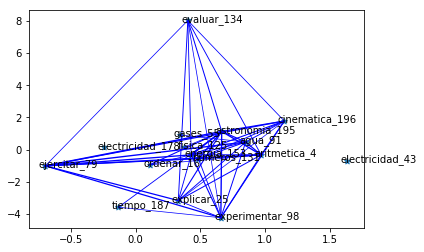

In [317]:
#viz.scatter_plot_by_grade_by_cluster(x_values,y_values,labels_clusters,'X','Y',names_docs,document_labels)
scatt = plt.scatter(T_x,T_y,marker='*')
tooltips = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
for i in range(n_topics):
    plt.annotate(selected_topics[i],xy=(T_x[i],T_y[i]),xytext=(T_x[i]-0.05,T_y[i]-0.05))
    for j in range(n_topics):
        if i>j:
            if co_ocurrence_matrices[46][i,j] > 4:
                plt.plot([T_x[i],T_x[j]],[T_y[i],T_y[j]],c='b',linewidth=np.log(co_ocurrence_matrices[46][i,j])/2)

#scatt = plt.scatter(T_x,T_y,marker='*',c='b')

In [318]:
diff_matrix = co_ocurrence_matrices[46] - co_ocurrence_matrices[27]
pd.DataFrame(diff_matrix).describe()

0          1          2           3          4          5   \
count  16.000000  16.000000  16.000000   16.000000  16.000000  16.000000   
mean    0.911970   2.737317   0.204001  -19.721827  -1.342183  -1.079709   
std     4.414147   5.848099   2.172467   26.200110   1.034071   4.436474   
min   -11.198753 -11.544080  -5.137447 -113.676000  -3.293912 -12.821427   
25%    -0.431411  -0.344215  -0.541153  -19.359550  -2.004321  -3.358755   
50%     1.617591   2.189089   0.376863  -12.182753  -1.027723  -0.923553   
75%     2.861723   5.880618   1.082742   -8.063881  -0.765450   1.154174   
max     9.207846  12.882174   4.500117   -3.250265   0.367299   7.100348   

              6          7          8          9          10         11  \
count  16.000000  16.000000  16.000000  16.000000  16.000000  16.000000   
mean    8.910126  -1.040295  -0.609295   2.906697   3.009790  -0.918839   
std    10.210418   1.796604   7.139505   6.328366   6.115800   6.017742   
min    -7.409398  -5.236463 -20.029762  -9.228281  -8.282042 -19.136146   
25%     3.830693  -1.776948  -1.918260  -0.588632  -0.880892  -1.832095   
50%     6.746860  -0.669633  -0.182301   2.658804   2.337485  -0.644507   
75%    12.561995  -0.058834   2.747988   6.098625   5.720307   1.788478   
max    37.911500   1.822420  12.455269  17.029566  19.651912   9.306402   

              12         13         14         15  
count  16.000000  16.000000  16.000000  16.000000  
mean   -1.505255  -3.161621  -5.736219  -5.357670  
std     4.961075   5.492968   8.654714   6.531994  
min   -16.180056 -16.545901 -32.278894 -23.594317  
25%    -2.309887  -3.581277  -6.344618  -5.517096  
50%    -1.048282  -1.781500  -3.387946  -3.040088  
75%     1.137620  -0.653786  -1.735177  -1.795318  
max     5.648184   6.393372   5.089899   0.605103

In [82]:
np.log(1)

0.0

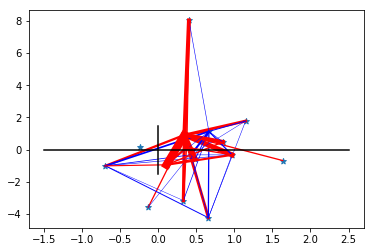

In [319]:
#viz.scatter_plot_by_grade_by_cluster(x_values,y_values,labels_clusters,'X','Y',names_docs,document_labels)
scatt = plt.scatter(T_x,T_y,marker='*')
tooltips = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
plot_label = True
for i in range(n_topics):
    for j in range(n_topics):
        if i>j:
            if np.abs(diff_matrix[i,j]) > 4:
                if plot_label:
                    #plt.annotate(selected_topics[i],xy=(T_x[i],T_y[i]),xytext=(T_x[i]-0.05,T_y[i]-0.05))
                    plot_label = False
                if diff_matrix[i,j] > 0:
                    plt.plot([T_x[i],T_x[j]],[T_y[i],T_y[j]],c='b',linewidth=diff_matrix[i,j]/10)
                else:
                    plt.plot([T_x[i],T_x[j]],[T_y[i],T_y[j]],c='r',linewidth=np.abs(diff_matrix[i,j])/4)
    plot_label = True
plt.plot([0,0],[1.5,-1.5],c='black')
plt.plot([2.5,-1.5],[0,0],c='black')
tooltips = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
mpld3.plugins.connect(plt.gcf(), tooltips)